# **Index**
1. [Imports](#Imports)
2. [Data Understanding](#Data-Understanding)
3. [Data Exploration](#Data-Exploration)
   - [Visualization](#Visualization)

# Imports

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np 
import os
import missingno as msno
from scipy import stats

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

#To get plots with better resolution 
%config InlineBackend.figure_format = 'retina'

import sqlite3

from sklearn import datasets
import math
from itertools import product
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from datetime import datetime

#KNN Imputer
from sklearn.impute import KNNImputer

#Data Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
sns.set()


from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold


#Matplotlib functions to create MiniSOM visualizations
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.lines import Line2D
from matplotlib import __version__ as mplver

#Outlier and noise filtering
from collections import Counter

In [4]:
#import the csv file to the notebook
df = pd.read_csv('train_data.csv')

In [6]:
#maybe 'Claim Identifier' cold be the index?
df = df.set_index('Claim Identifier')
df = df.sort_index()

In [970]:
#it's necessary to identify our targets?
target1 = df['Claim Injury Type']
target2 = df['WCB Decision']
target3 = df['Agreement Reached']

In [111]:
df.head(5)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393066             2019-09-17           64.0                              N   
5393091             2019-08-30           46.0                              N   
5393667             2019-12-23           54.0                              N   
5393769             2019-11-14           56.0                              N   
5393770             2019-12-31           26.0                              N   
5393772             2019-12-13           59.0                              N   
5393773             2019-12-27           35.0                              N   
5393774             2019-11-22           28.0                              N   
5393776             2019-12-19           45.0                              N   
5393777             2019-12-31           60.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393066             2020-01-01                       N              1345.97   
5393091             2020-01-01                       Y              1745.93   
5393667             2020-01-01                       N                 0.00   
5393769             2020-01-02                       N                 0.00   
5393770             2020-01-02                       N                 0.00   
5393772             2020-01-02                       N                 0.00   
5393773             2020-01-02                       N                 0.00   
5393774             2020-01-02                       Y              1381.65   
5393776             2020-01-02                       N                 0.00   
5393777             2020-01-02                       N                 0.00   

                  Birth Year           C-2 Date           C-3 Date  \
Claim Identifier                                                     
5393066               1954.0         2020-01-01  Awaiting Response   
5393091               1973.0         2020-01-01         2020-01-14   
5393667               1965.0         2020-01-01  Awaiting Response   
5393769                  0.0  Awaiting Response  Awaiting Response   
5393770               1993.0         2020-01-02         2019-12-31   
5393772               1960.0         2020-01-02         2020-05-12   
5393773                  0.0  Awaiting Response         2019-12-30   
5393774               1991.0         2020-01-06         2019-12-20   
5393776               1974.0         2020-01-02  Awaiting Response   
5393777               1959.0         2020-01-02  Awaiting Response   

                                   Carrier Name  ... Medical Fee Region  \
Claim Identifier                                 ...                      
5393066              HARTFORD FIRE INSURANCE CO  ...                  I   
5393091            ZURICH AMERICAN INSURANCE CO  ...                  I   
5393667                   DELHAIZE AMERICA, LLC  ...                  I   
5393769           SAFETY NATIONAL CASUALTY CORP  ...                 UK   
5393770                    STATE INSURANCE FUND  ...                 II   
5393772                       TOWN OF LANCASTER  ...                  I   
5393773             SELECTIVE INSURANCE COMPANY  ...                  I   
5393774                    STATE INSURANCE FUND  ...                  I   
5393776            AMTRUST INS CO OF KANSAS INC  ...                  I   
5393777             TECHNOLOGY INSURANCE CO INC  ...                  I   

                 WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                              
5393066                               97.0                REPETITIVE MOTION   
5393091                               97.0                REPETITIVE MOTION   
5393667                               30.0      S

# Data Understanding

### Key Observations:

1. **Accident Date**:
   - **Count**: 570,337 entries.
   - **Unique Values**: 5,539 different accident dates, with the most frequent being March 1, 2020.
   - **Relevance**: Dates are well-represented with many unique values, indicating a broad range of accidents over time.

2. **Age at Injury**:
   - **Mean Age**: 42.1 years, with a standard deviation of 14.26, showing variability in the age of injured workers.
   - **Min/Max Age**: 0 years (likely erroneous) to 117 years, indicating potential data quality issues.
   - **Relevance**: Age distribution seems reasonable, but some data cleaning (e.g., unrealistic ages) might be needed.

3. **Alternative Dispute Resolution**:
   - **Most Common Value**: "No" (N), representing 571,412 cases, showing that ADR is rarely used.
   - **Relevance**: This suggests that most cases do not involve alternative resolution mechanisms.

4. **Attorney/Representative**:
   - **Most Common Value**: "No" (N), with 392,291 cases, indicating that most workers do not have legal representation.
   - **Relevance**: This may reflect the accessibility of legal resources for workers or the nature of claims.

5. **Average Weekly Wage**:
   - **Mean**: $491.09, with a very high standard deviation ($6,092), indicating outliers and wage variability.
   - **Relevance**: The wide range, from $0 to over $2.8 million, suggests outliers or extreme cases that may need further investigation.

6. **Birth Year**:
   - **Mean**: 1886 (clearly an error), with a large standard deviation.
   - **Relevance**: This column has significant data quality issues and should be cleaned (many birth years are unrealistic).

7. **Carrier Name**:
   - **Most Common Carrier**: "State Insurance Fund" with 111,144 entries.
   - **Relevance**: This suggests that this insurance carrier is prominent, possibly reflecting government-backed insurance.

8. **COVID-19 Indicator**:
   - **Most Common Value**: "No" (N), indicating that most cases are not related to COVID-19.
   - **Relevance**: This dataset covers a broad time range, with few cases related to the pandemic.

9. **Gender**:
   - **Most Common Value**: Male (335,218 entries), showing a gender imbalance in the dataset.
   - **Relevance**: Gender differences could be relevant for understanding the demographic distribution of injuries.

10. **Industry Code Description**:
    - **Most Common Industry**: "Health Care and Social Assistance" with 114,339 entries.
    - **Relevance**: This suggests that this industry is heavily represented, which could be significant for occupational health studies.

11. **Zip Code**:
    - **Mean Zip Code**: 12,500, but with a wide range (min = 0, max = 99,999), suggesting some invalid data.
    - **Relevance**: Location data could be useful, but some zip codes may need to be cleaned (e.g., zero or very high values).

12. **WCB Decision**:
    - **Most Common Value**: "Not Work Related" for all 574,026 entries.
    - **Relevance**: This indicates that this dataset is filtered for non-work-related cases, which is an important context for any analysis.

13. **Number of Dependents**:
    - **Mean**: 3 dependents, with a max of 6.
    - **Relevance**: Understanding the family context of injured workers can be important for claims analysis.

### Final Notes:
- **Data Quality**: Some columns, such as "Birth Year" and "Average Weekly Wage," show extreme or incorrect values, indicating the need for data cleaning before further analysis.
- **Wage Variability**: The wide range in wages (from $0 to over $2.8 million) suggests significant disparities, possibly due to outliers or varying types of claims.
- **Demographic Insights**: The dataset covers a broad demographic, but there is a gender imbalance (more males), and certain industries (e.g., health care) are heavily represented.
- **Filtered Data**: The "WCB Decision" column shows that all cases are "Not Work Related," meaning the dataset is focused on non-occupational claims.



# Data Exploration

In [7]:
#check the dimensions of dataframe
df.shape

(593471, 33)

In [32]:
#check the columns in dataframe
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [509]:
#check the data type of each column and evidence of missing values among many variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393066 to 999891667
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Finding on the DataFrame Information:**
* Dates are objects (strings)
* Floats can be changed integers (expect maybe for "Average Weekly Wage")
* Check to see, if "Average Weekly Wage" needs to be a float -> can be turned into an integer
* "Agreement Reached" = according to metadata is boolean
* Explore ways to simplify "Carrier Type", "Claim Injury Type" and "Medical Fee Region", for better handling? -> change into integers
* Description features can be dropped: OIICS Nature of Injury Description (no data), WCIO Cause of Injury Description, WCIO Nature of Injury Description, WCIO Part Of Body Description (-> Decription only needed for interpretation, no different value than the codes) </br>
</br>
* Most columns have object values (strings)
* There are missing values in most of the columns
* "OIICS Nature of Injury Description" can be droppped -> no values

In [431]:
#check the central tendency measures
df.describe(include="all").T

count unique  \
Accident Date                         570337   5539   
Age at Injury                       574026.0    NaN   
Alternative Dispute Resolution        574026      3   
Assembly Date                         593471   1096   
Attorney/Representative               574026      2   
Average Weekly Wage                 545375.0    NaN   
Birth Year                          544948.0    NaN   
C-2 Date                              559466   2475   
C-3 Date                              187245   1648   
Carrier Name                          574026   2046   
Carrier Type                          574026      8   
Claim Injury Type                     574026      8   
County of Injury                      574026     63   
COVID-19 Indicator                    574026      2   
District Name                         574026      8   
First Hearing Date                    150798   1094   
Gender                                574026      4   
IME-4 Count                         132803.0    NaN   
Industry Code                       564068.0    NaN   
Industry Code Description             564068     20   
Medical Fee Region                    574026      5   
OIICS Nature of Injury Description       0.0    NaN   
WCIO Cause of Injury Code           558386.0    NaN   
WCIO Cause of Injury Description      558386     74   
WCIO Nature of Injury Code          558369.0    NaN   
WCIO Nature of Injury Description     558369     56   
WCIO Part Of Body Code              556944.0    NaN   
WCIO Part Of Body Description         556944     54   
Zip Code                              545389  10060   
Agreement Reached                   574026.0    NaN   
WCB Decision                          574026      1   
Number of Dependents                574026.0    NaN   

                                                                  top    freq  \
Accident Date                                              2020-03-01    1245   
Age at Injury                                                     NaN     NaN   
Alternative Dispute Resolution                                      N  571412   
Assembly Date                                              2020-03-06    1422   
Attorney/Representative                                             N  392291   
Average Weekly Wage                                               NaN     NaN   
Birth Year                                                        NaN     NaN   
C-2 Date                                                   2021-05-11    1847   
C-3 Date                                                   2021-04-21     350   
Carrier Name                                     STATE INSURANCE FUND  111144   
Carrier Type                                              1A. PRIVATE  285368   
Claim Injury Type                                         2. NON-COMP  291078   
County of Injury                                              SUFFOLK   60430   
COVID-19 Indicator                                                  N  546505   
District Name                                                     NYC  270779   
First Hearing Date                                         2022-04-15     440   
Gender                                                              M  335218   
IME-4 Count                                                       NaN     NaN   
Industry Code                                                     NaN     NaN   
Industry Code Description           HEALTH CARE AND SOCIAL ASSISTANCE  114339   
Medical Fee Region                                                 IV  265981   
OIICS Nature of Injury Description                                NaN     NaN   
WCIO Cause of Injury Code                                         NaN     NaN   
WCIO Cause of Injury Description                              LIFTING   46610   
WCIO Nature of Injury Code                                        NaN     NaN   
WCIO Nature of Injury Description                      STRAIN OR TEAR  153373   
WCIO Part Of Body Code              

**Descripitive Statistics for data:**
* Injury occure mostly for people older than 31 years, with the majority between 31 and 54 years. The minimum of 0 years implicates missing data, the maximum age of 117 years could be false data or and extreme outlier
* The minimum year in Birth Year it's 0 this is an error
* The maxium value in Average Weekly Wage it's very high could be a false data or an extreme outlier if we check the minimun and the other stastistics about this variable
* Wr don't have any information about OIICS Nature of Injury Description
* In WCIO Part Of Body Code the minimum value is negative could be false data or an input error

In [527]:
#check if all the values are between 2020 and 2022
df['Assembly Date'].value_counts()

Assembly Date
2020-03-06    1422
2021-05-11    1386
2022-04-01    1256
2022-02-04    1217
2022-08-15    1170
              ... 
2022-07-31      10
2021-12-19      10
2020-08-23      10
2020-07-04      10
2022-05-08      10
Name: count, Length: 1096, dtype: int64

In [710]:
#check if all the dates are correct
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['Age at Injury'] = pd.to_numeric(df['Age at Injury'], errors='coerce')
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')

df['Calculated Age at Injury'] = df['Accident Date'].dt.year - df['Birth Year']

filtered_df = df[~(
    (df['Age at Injury'].isna() | (df['Age at Injury'] == 0)) |
    (df['Birth Year'].isna() | (df['Birth Year'] == 0)) |
    (df['Accident Date'].isna())
)]

filtered_df_invalid = filtered_df[filtered_df.apply(
    lambda row: abs(row['Age at Injury'] - row['Calculated Age at Injury']) > 1, axis=1
)]

filtered_df_invalid.head()  


Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents, Accident Year, Expected Birth Year, Calculated Age at Injury]
Index: []

[0 rows x 35 columns]

In [740]:
df[df['Age at Injury'] == 0].head(30)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393794                    NaN            0.0                              N   
5393876             2019-12-20            0.0                              N   
5393971             2019-06-26            0.0                              N   
5393999                    NaN            0.0                              N   
5394023                    NaN            0.0                              N   
5394068                    NaN            0.0                              N   
5394093             2019-12-28            0.0                              N   
5394216             2008-12-22            0.0                              N   
5394616                    NaN            0.0                              N   
5394724             2019-12-20            0.0                              N   
5394824                    NaN            0.0                              N   
5394831             1995-03-11            0.0                              N   
5395723             2018-01-03            0.0                              N   
5395746                    NaN            0.0                              N   
5395754                    NaN            0.0                              N   
5395789                    NaN            0.0                              N   
5395792                    NaN            0.0                              N   
5395900                    NaN            0.0                              N   
5395914                    NaN            0.0                              N   
5395948                    NaN            0.0                              N   
5396078                    NaN            0.0                              N   
5396110             2019-11-05            0.0                              N   
5396278                    NaN            0.0                              N   
5396359             1999-09-29            0.0                              N   
5396556                    NaN            0.0                              N   
5396922                    NaN            0.0                              N   
5397594             2019-11-01            0.0                              N   
5397697                    NaN            0.0                              N   
5397748                    NaN            0.0                              N   
5397758                    NaN            0.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393794             2020-01-02                       Y                  0.0   
5393876             2020-01-02                       N                  0.0   
5393971             2020-01-02                       N                  0.0   
5393999             2020-01-02                       Y                  0.0   
5394023             2020-01-02                       Y                  0.0   
5394068             2020-01-02                       Y                  0.0   
5394093             2020-01-02                       N                  0.0   
5394216             2020-01-03                       Y                  0.0   
5394616             2020-01-03                       N                  0.0   
5394724             2020-01-03                       N                  0.0   
5394824             2020-01-03                       Y                  0.0   
5394831             2020-01-03                       N                  NaN   
5395723             2020-01-06                       N                  0.0   
5395746             2020-01-06                       Y                  0.0   
5395754             2020-01-06                       Y                  0.0   
5395789             2020-01-06                       Y                  0.0   
5395792             2020-01-06    

In [744]:
# check if the 'C-3 Date' it's before 'C-2 Date'
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], errors='coerce')
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], errors='coerce')

filtered_df = df[df['C-2 Date'] < df['C-3 Date']]

filtered_df.head()
#Maybe we should fill this missing values in 'C-2 Date'

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393091             2019-08-30           46.0                              N   
5393772             2019-12-13           59.0                              N   
5393782             2019-12-29           35.0                              N   
5393791             2019-12-23           38.0                              N   
5393811             2019-12-19           34.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393091             2020-01-01                       Y              1745.93   
5393772             2020-01-02                       N                 0.00   
5393782             2020-01-01                       Y              1241.04   
5393791             2020-01-01                       N                 0.00   
5393811             2020-01-01                       Y              1682.39   

                  Birth Year   C-2 Date   C-3 Date  \
Claim Identifier                                     
5393091               1973.0 2020-01-01 2020-01-14   
5393772               1960.0 2020-01-02 2020-05-12   
5393782               1984.0 2020-01-01 2020-01-17   
5393791                  NaN 2020-01-01 2020-01-17   
5393811               1985.0 2020-01-01 2020-01-07   

                                  Carrier Name  ... WCIO Cause of Injury Code  \
Claim Identifier                                ...                             
5393091           ZURICH AMERICAN INSURANCE CO  ...                      97.0   
5393772                      TOWN OF LANCASTER  ...                      56.0   
5393782             NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
5393791           AMERICAN ZURICH INSURANCE CO  ...                      87.0   
5393811                  NYC TRANSIT AUTHORITY  ...                      99.0   

                 WCIO Cause of Injury Description WCIO Nature of Injury Code  \
Claim Identifier                                                               
5393091                         REPETITIVE MOTION                       49.0   
5393772                                   LIFTING                       52.0   
5393782              FROM LIQUID OR GREASE SPILLS                       16.0   
5393791           FOREIGN MATTER (BODY) IN EYE(S)                       25.0   
5393811                OTHER - MISCELLANEOUS, NOC                       49.0   

                 WCIO Nature of Injury Description WCIO Part Of Body Code  \
Claim Identifier                                                            
5393091                             SPRAIN OR TEAR                   38.0   
5393772                             STRAIN OR TEAR                   38.0   
5393782                                DISLOCATION                   42.0   
5393791                               FOREIGN BODY                   14.0   
5393811                             SPRAIN OR TEAR                   54.0   

                 WCIO Part Of Body Description Zip Code  Agreement Reached  \
Claim Identifier                                                             
5393091                            SHOULDER(S)    14569                1.0   
5393772                            SHOULDER(S)    14086                0.0   
5393782                        LOWER BACK AREA    13669                1.0   
5393791                                 EYE(S)    13203                0.0   
5393811                              LOWER LEG    11788                0.0   

                      WCB Decision Number of Dependents  
Claim Identifier                                         
5393091           Not Work Related                  4.0  
5393772           Not Work Related                  3.0  
5393782           Not Work Related                  0.0  
5393791          

In [15]:
#Check the regions of Medical Fee
df["Medical Fee Region"].value_counts()

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33473
Name: count, dtype: int64

In [505]:
df["Agreement Reached"].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

In [19]:
#Check if we have only New York County
#Get unique counties as a list
county_list = df["County of Injury"].unique().tolist()

print(county_list)

['GENESEE', 'WYOMING', 'ALBANY', 'ORANGE', 'ONONDAGA', 'ERIE', 'SCHENECTADY', 'ONEIDA', 'TOMPKINS', 'CATTARAUGUS', 'LIVINGSTON', 'MONROE', 'SUFFOLK', 'MADISON', 'ST. LAWRENCE', 'CAYUGA', 'CHEMUNG', 'DUTCHESS', 'SENECA', 'CHAUTAUQUA', 'OTSEGO', 'NIAGARA', 'TIOGA', 'YATES', 'BROOME', 'PUTNAM', 'SCHUYLER', 'WARREN', 'NASSAU', 'QUEENS', 'BRONX', 'NEW YORK', 'WESTCHESTER', 'RICHMOND', 'KINGS', 'COLUMBIA', 'SARATOGA', 'RENSSELAER', 'WASHINGTON', 'ULSTER', 'GREENE', 'ROCKLAND', 'ONTARIO', 'SULLIVAN', 'ORLEANS', 'JEFFERSON', 'HERKIMER', 'STEUBEN', 'FULTON', 'UNKNOWN', 'CHENANGO', 'OSWEGO', 'CLINTON', 'DELAWARE', 'LEWIS', 'MONTGOMERY', 'CORTLAND', 'ALLEGANY', 'FRANKLIN', 'ESSEX', 'WAYNE', 'SCHOHARIE', 'HAMILTON', nan]


In [208]:
df["District Name"].value_counts()
#I think they don't have office in albany, hauppauge, statewide
#https://www.wcb.ny.gov/content/main/DistrictOffices/MainPage.jsp

District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [337]:
df["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [31]:
df["Gender"].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

In [1010]:
#Replace specific strings with np.nan in the entire DataFrame
df = df.replace('nan', np.nan)
df = df.replace('UK', np.nan)
df = df.replace('U', np.nan)
df = df.replace('UNKNOWN', np.nan)

df['WCIO Part Of Body Code']= df['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 99.0], np.nan)

In [975]:
#We decided to drop all rows that contain only the 'Assembly Date' and the index 'Claim Identifier', as these represent inputs rather than real data.
#columns_to_check = ['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
#                    'Attorney/Representative', 'Average Weekly Wage',
#                    'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
#                    'Claim Injury Type', 'County of Injury',
#                    'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
#                    'IME-4 Count', 'Industry Code', 'Industry Code Description',
#                    'Medical Fee Region', 'OIICS Nature of Injury Description',
#                    'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
#                    'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
#                    'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
#                    'Agreement Reached', 'WCB Decision', 'Number of Dependents']

# Condição para identificar linhas onde todas as colunas estão vazias
#condition = df[columns_to_check].isna().all(axis=1)

# Filtra o DataFrame para remover essas linhas
#df = df[~condition]


In [1011]:
#check the % of missing values of each variable
missing_values = df.isna().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
missing_data

Missing Values  Missing Percentage
Accident Date                                23134            3.898084
Age at Injury                                19445            3.276487
Alternative Dispute Resolution               19450            3.277329
Assembly Date                                    0            0.000000
Attorney/Representative                      19445            3.276487
Average Weekly Wage                          48096            8.104187
Birth Year                                   48523            8.176137
C-2 Date                                     34005            5.729850
C-3 Date                                    406226           68.449174
Carrier Name                                 19445            3.276487
Carrier Type                                 21219            3.575406
Claim Injury Type                            19445            3.276487
County of Injury                             20642            3.478182
COVID-19 Indicator                           19445            3.276487
District Name                                19445            3.276487
First Hearing Date                          442673           74.590502
Gender                                       24156            4.070292
IME-4 Count                                 460668           77.622664
Industry Code                                29403            4.954412
Industry Code Description                    29403            4.954412
Medical Fee Region                           52918            8.916695
OIICS Nature of Injury Description          593471          100.000000
WCIO Cause of Injury Code                    35085            5.911831
WCIO Cause of Injury Description             35085            5.911831
WCIO Nature of Injury Code                   35102            5.914695
WCIO Nature of Injury Description            35102            5.914695
WCIO Part Of Body Code                      113345           19.098659
WCIO Part Of Body Description                36527            6.154808
Zip Code                                     48082            8.101828
Agreement Reached                            19445            3.276487
WCB Decision                                 19445            3.276487
Number of Dependents                         19445            3.276487

**RULE** Many data science resources recommend thresholds around 30% to 50% missing values as a rule of thumb. Above this threshold, filling the values can introduce bias or noise, and removing the variable might be preferable.

### Critical Missing Data Analysis:

1. **C-3 Date**: 68.45% missing. 
- **Action**: With such a high percentage of missing data, this column is a candidate for removal unless there’s a specific reason to retain it. The data might not be available for most cases.
   

2. **First Hearing Date**: 74.59% missing.
- **Action**: This column has an even higher percentage of missing data. If it’s not essential for the analysis, it’s recommended to remove it.

3. **IME-4 Count**: 77.62% missing.
- **Action**: This column can likely be removed due to the high percentage of missing values, as it may not be relevant to most cases.

4. **OIICS Nature of Injury Description**: 100.00% missing.
- **Action**: Since all values are missing, this column should be removed from the dataset.

### Final Recommendation:
- **Columns to remove**: "C-3 Date", "First Hearing Date", "IME-4 Count", "OIICS Nature of Injury Description".
- These columns have high percentages of missing data and are unlikely to provide meaningful insights in their current state. It's best to drop them to improve data quality and reduce unnecessary noise in your analysis

# Visualization

### Split Numeric from non numeric

In [1014]:
# Separating numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Display numeric and non-numeric columns to the user
numeric_columns, non_numeric_columns


(Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
        'Industry Code', 'OIICS Nature of Injury Description',
        'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
        'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents'],
       dtype='object'),
 Index(['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date',
        'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name',
        'Carrier Type', 'Claim Injury Type', 'County of Injury',
        'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
        'Industry Code Description', 'Medical Fee Region',
        'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
        'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision'],
       dtype='object'))

### Numeric Columns

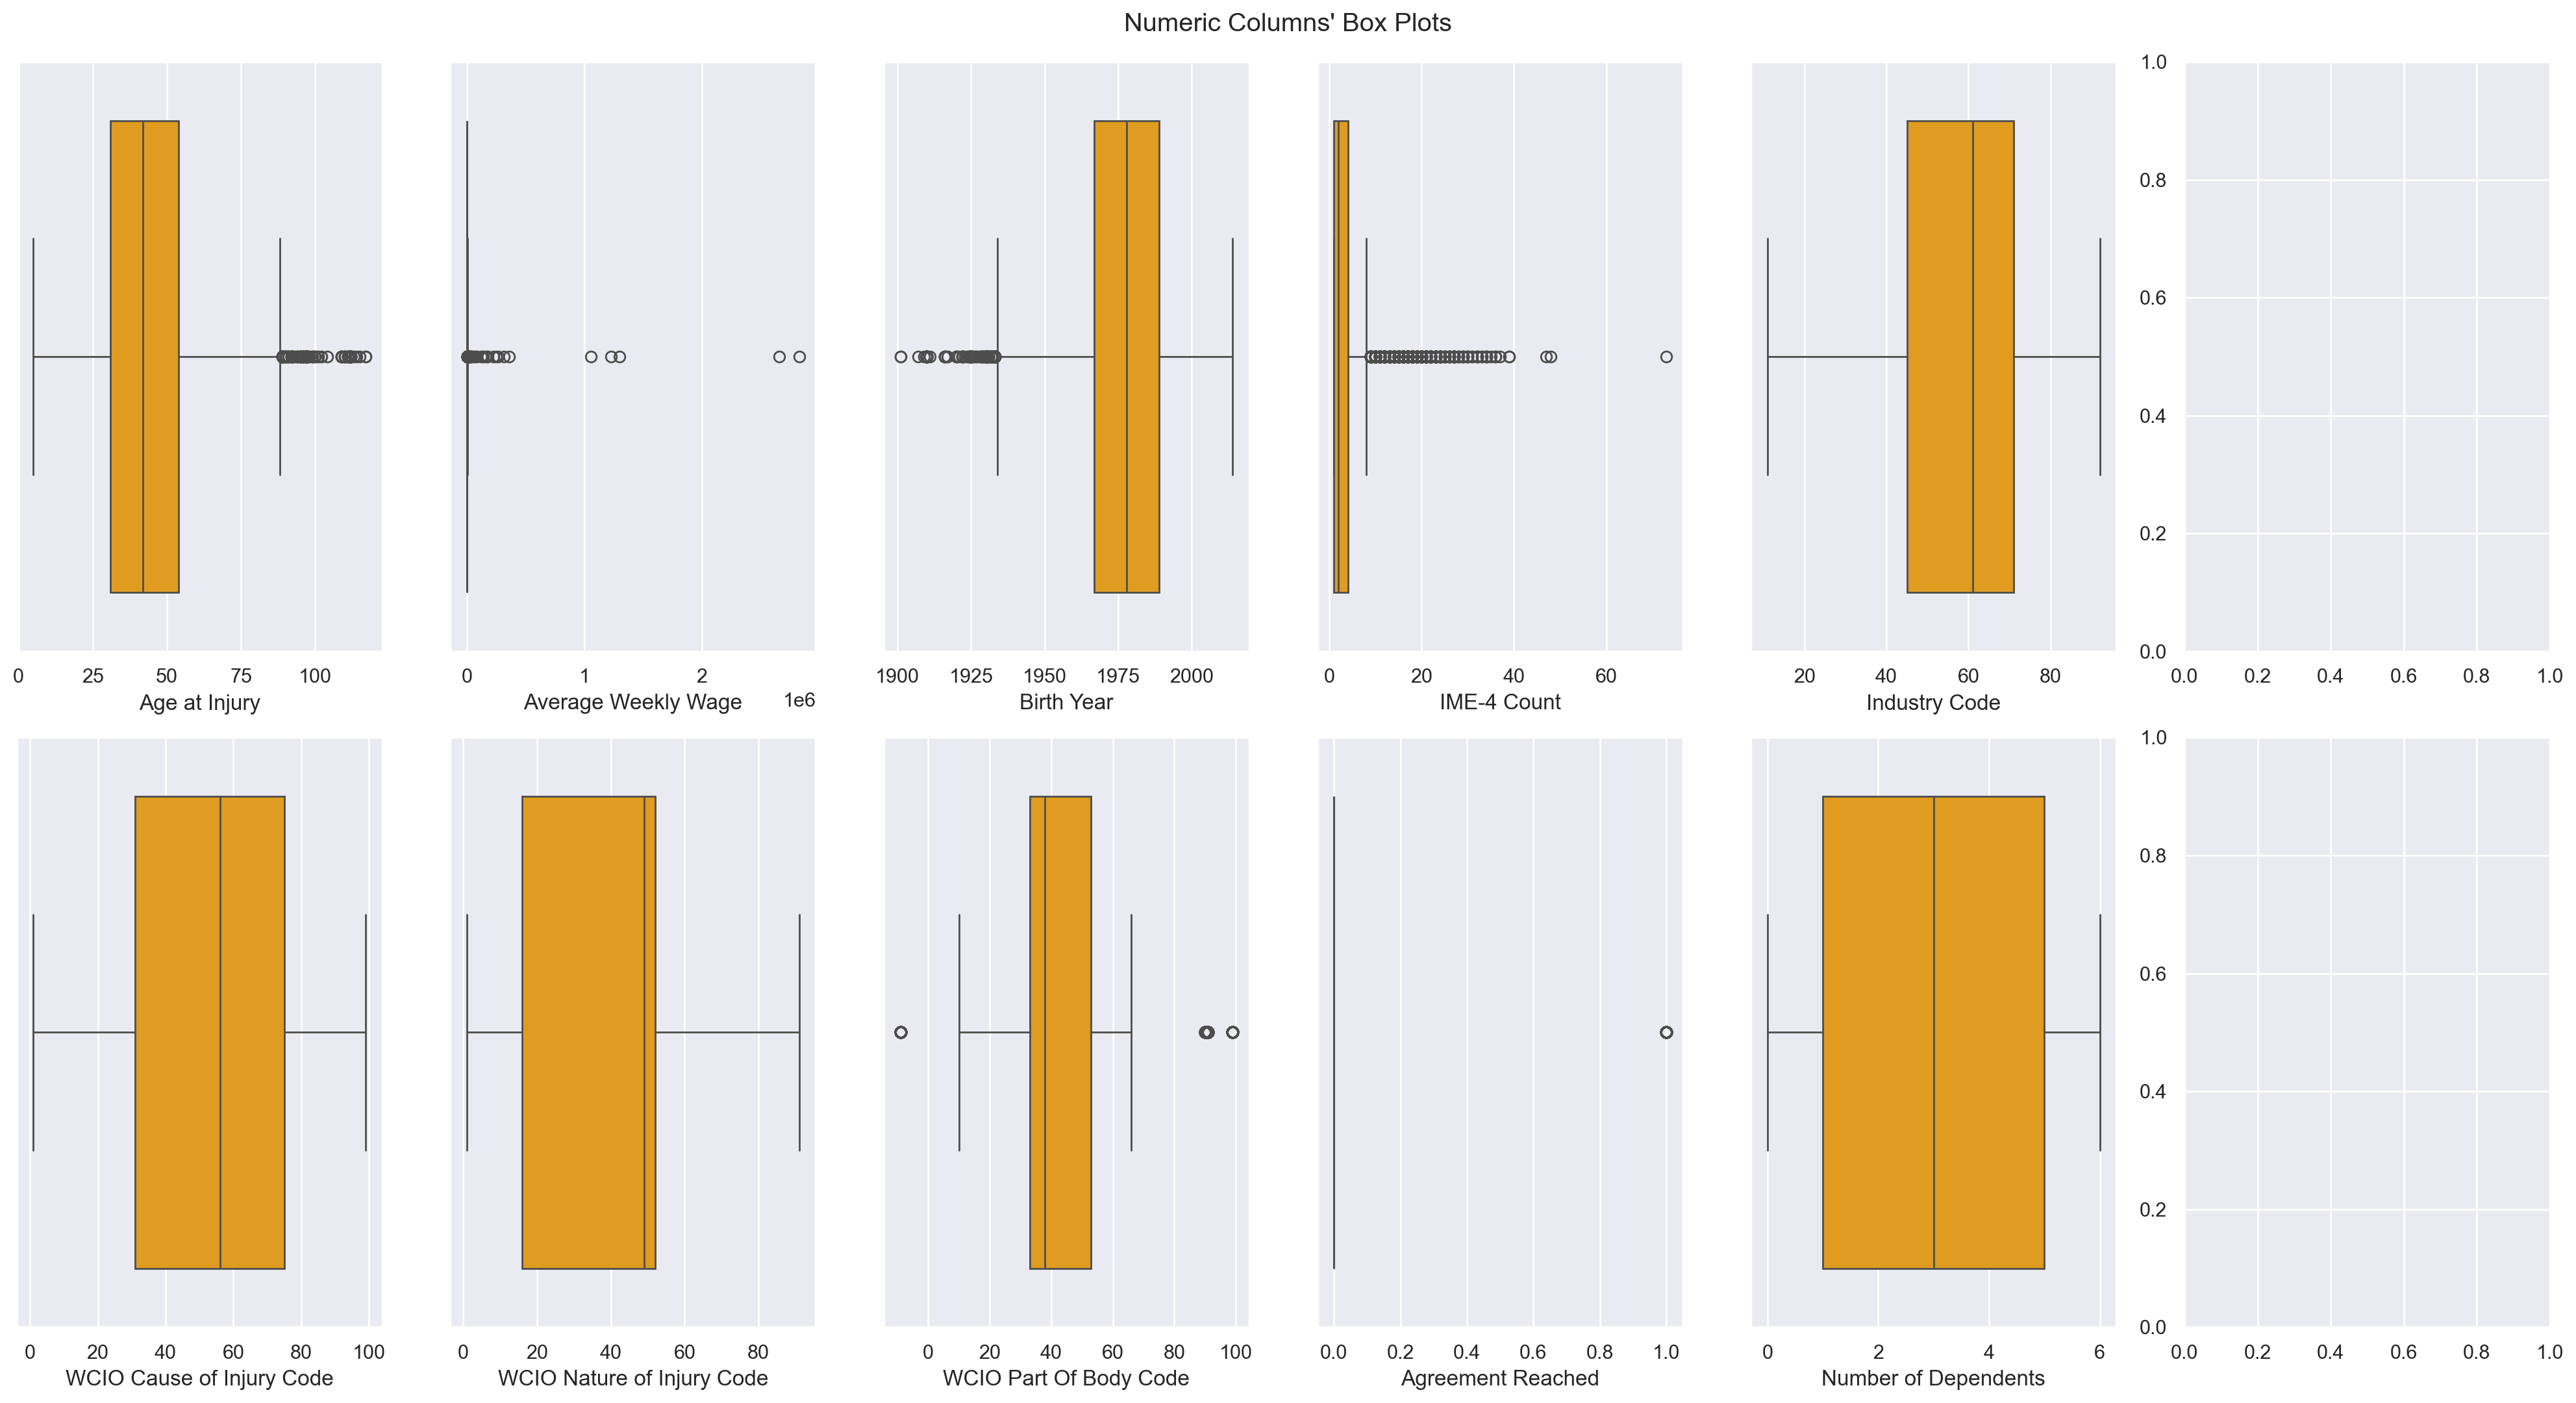

In [547]:
#I improved this one 

# Plot ALL Numeric Columns' Boxplots in one figure

sns.set() ## Reset to darkgrid

## What do these do?
sp_rows = 2
sp_cols = ceil(len(numeric_columns) / sp_rows)


# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each boxplot. Hint: don't forget to attach the boxplot to the current ax
for ax, feat in zip(axes.flatten(), numeric_columns): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat].dropna(), ax=ax, color='orange')
    
# Layout
# Add a centered title to the figure:
title = "Numeric Columns' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_columns_boxplots.png'), dpi=200)


plt.show()

1. **Age at Injury**:
- **Most Common Range**: Between 25 and 55 years old, with outliers above 100 years.
- **Relevance**: Outliers (ages above 100) likely indicate incorrect data entries. These should be handled during preprocessing, either by removing or correcting them, to avoid affecting model predictions.

2. **Average Weekly Wage**:
- **Most Common Range**: Below 1000, but with extreme outliers above 1 million.
- **Relevance**: The presence of extreme outliers in wages could distort the model’s accuracy. These should be reviewed, capped, or removed as part of data cleaning to ensure they don’t skew the analysis.

3. **Birth Year**:
- **Most Common Range**: Mostly valid, but some birth years are implausibly low (e.g., below 1900).
- **Relevance**: These implausible birth years suggest errors that need correction or removal to maintain data integrity during analysis.

4. **Claim Identifier**:
- **Most Common Range**: Spread across a wide range (no specific concentration).
- **Relevance**: This unique identifier does not have analytical relevance for modeling and can be treated as a reference feature.

5. **Industry Code**:
- **Most Common Range**: Between 40 and 70.
- **Relevance**: The distribution appears normal, with no significant outliers. This feature is important for categorizing the industry sector of injured workers and can be used as a key predictor.

6. **WCIO Cause of Injury Code**:
- **Most Common Range**: Between 30 and 75.
- **Relevance**: This feature shows a well-distributed set of injury causes, making it a useful predictor for classifying claim types.

7. **WCIO Nature of Injury Code**:
- **Most Common Range**: Between 20 and 60.
- **Relevance**: The nature of the injury is also well distributed, with no significant outliers, making it a key feature for predicting injury types.

8. **WCIO Part Of Body Code**:
- **Most Common Range**: Between 30 and 60, with some outliers.
- **Relevance**: This feature describes the body part affected by the injury. While there are some outliers, the majority falls within a reasonable range, making it a useful predictor.

9. **Zip Code**:
- **Most Common Range**: The plot shows a large number of entries around 0, with extreme outliers (e.g., values like 99999).
- **Relevance**: These extreme values likely represent errors or placeholder values that should be cleaned or flagged during preprocessing for accurate geographic analysis.

10. **Agreement Reached**:
- **Most Common Value**: Binary distribution, with a few outliers.
- **Relevance**: This binary variable is mostly well-distributed. The outliers may represent special cases and should be reviewed during data cleaning.

11. **Number of Dependents**:
- **Most Common Range**: Ranges between 0 and 6 dependents.
- **Relevance**: This variable has a reasonable distribution and can be used as-is for further analysis.

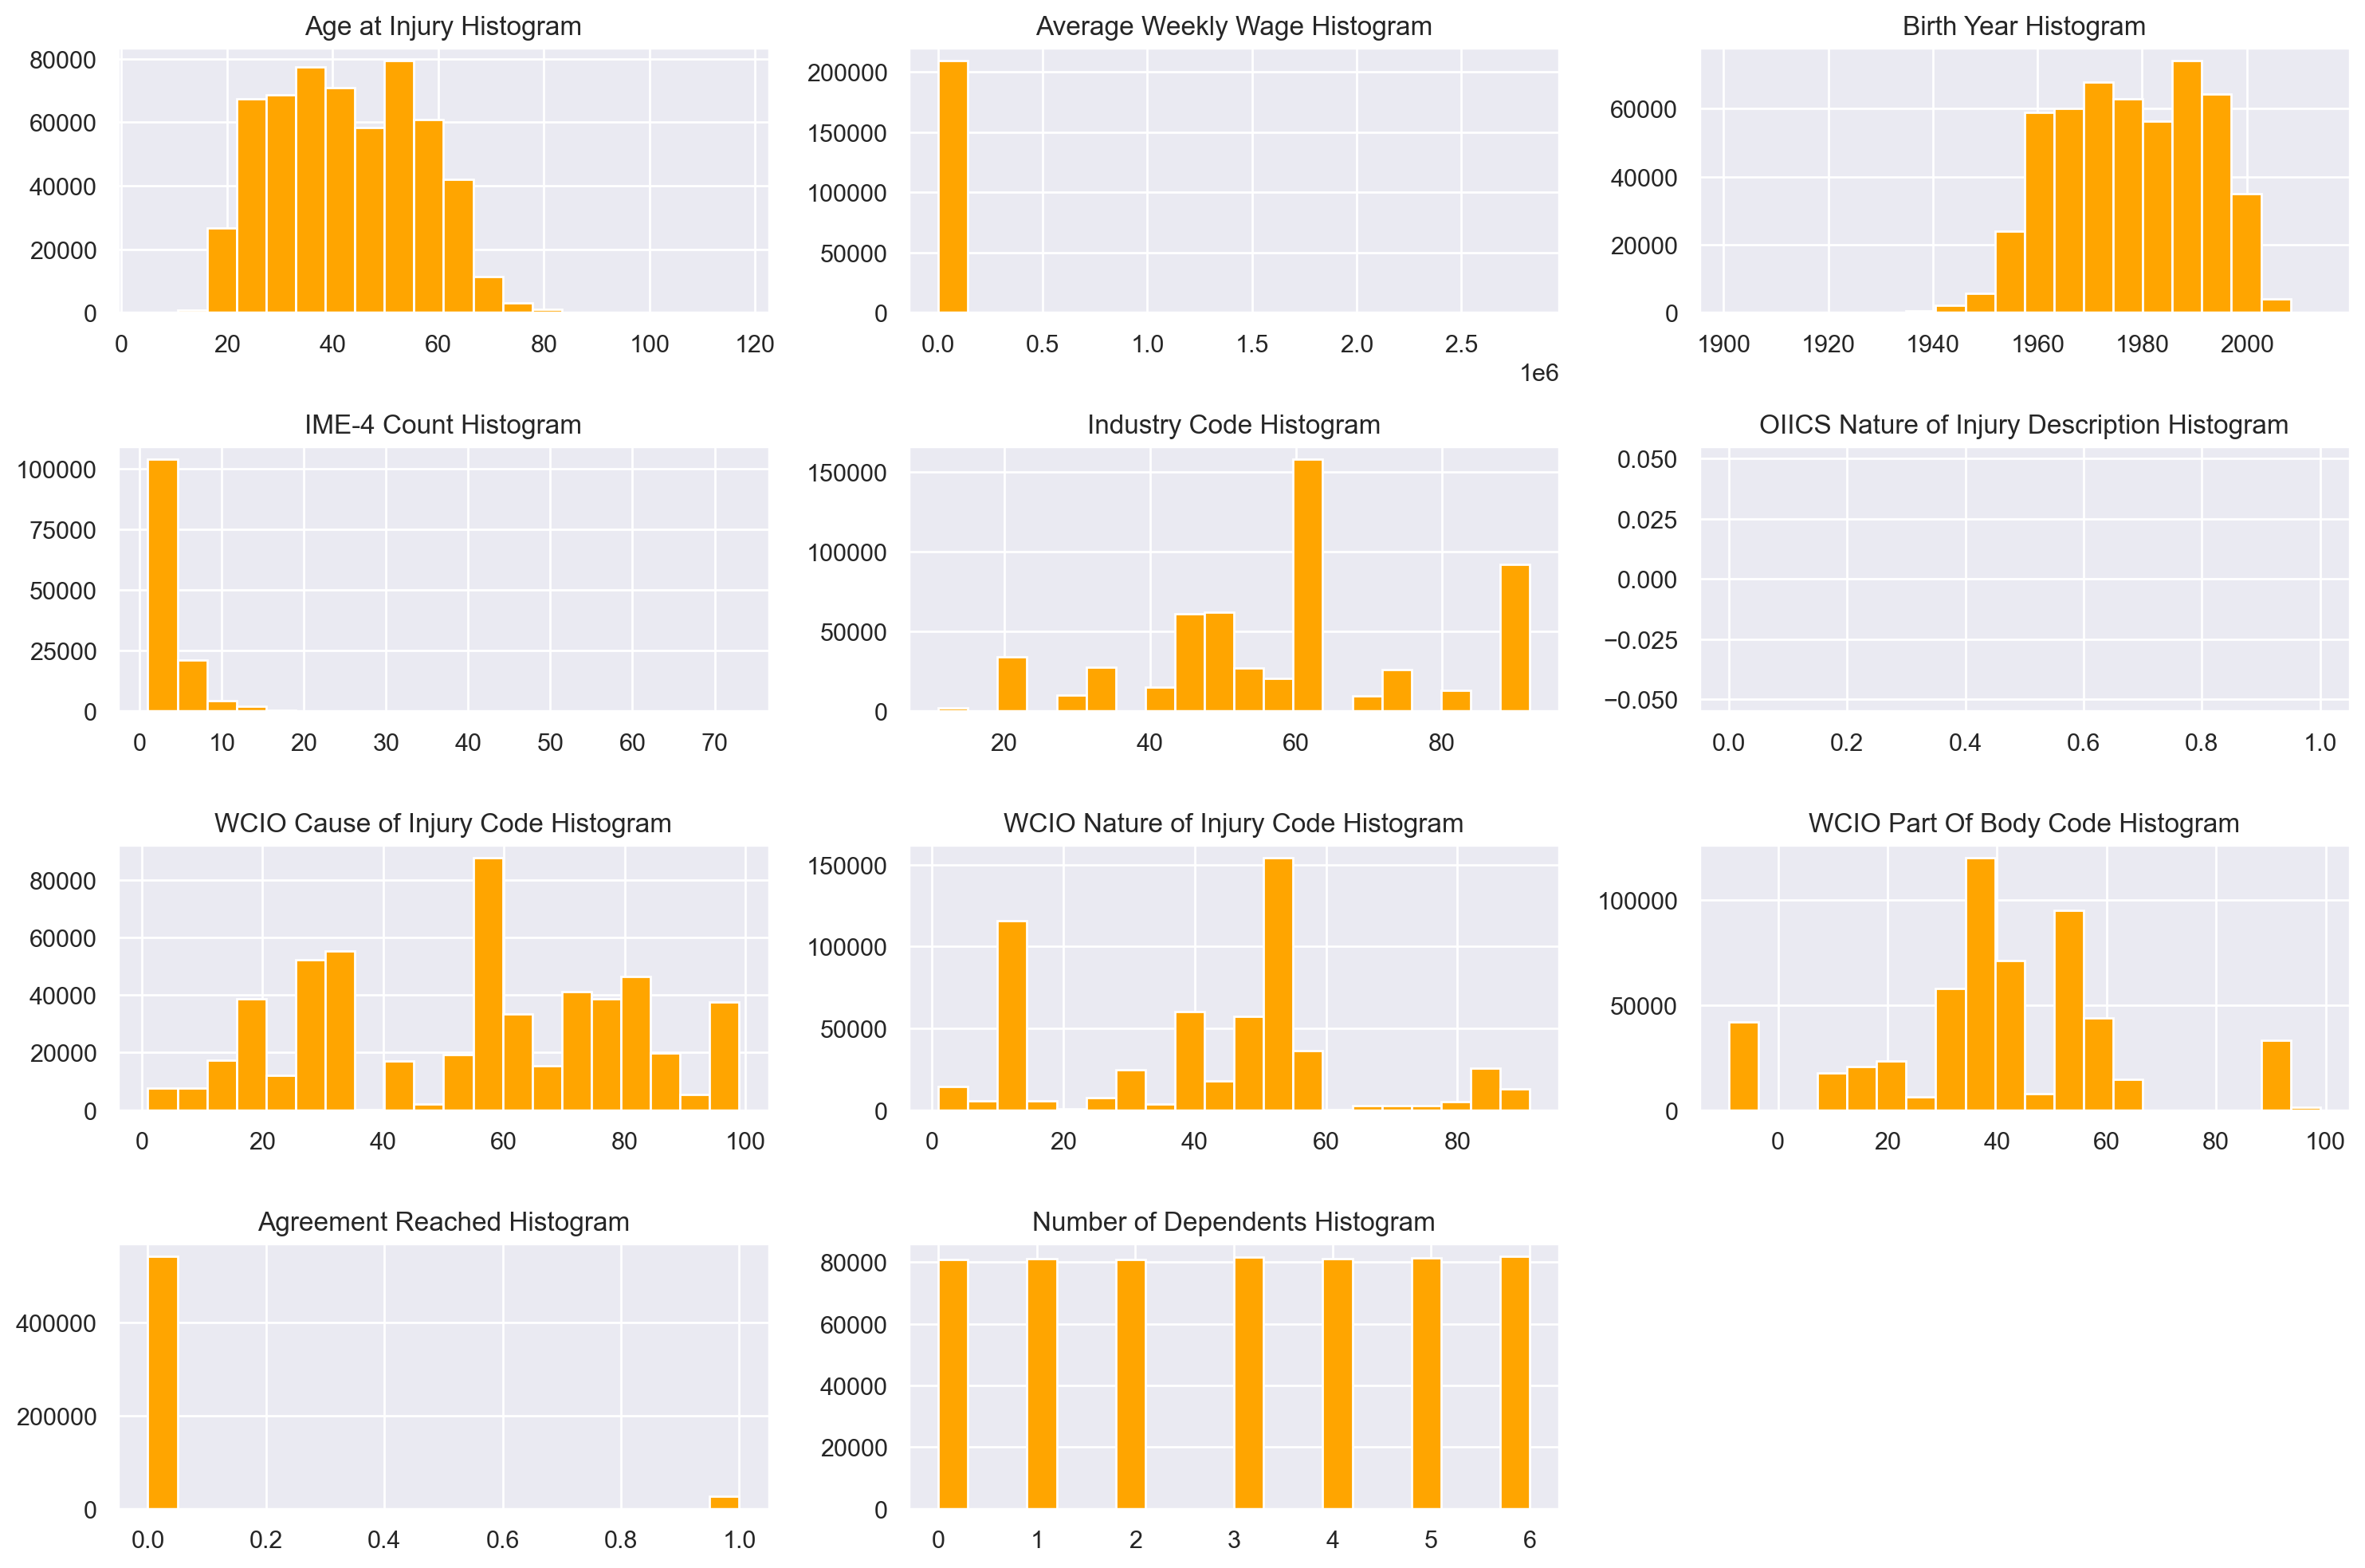

In [549]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    df[column].hist(bins=20, color = 'orange')
    plt.title(f'{column} Histogram')

plt.tight_layout()
plt.show()

1. **Age at Injury**:
   - **Most Common Range**: Between 30 and 55 years.
   - **Relevance**: The majority of injuries occur in this age group. The distribution appears normal, with no major outliers to address.

2. **Average Weekly Wage**:
   - **Most Common Range**: Centered around 0 with a long tail extending into extreme wage values.
   - **Relevance**: The skewed distribution suggests outliers or errors in wage reporting. Capping or transforming these values may be necessary before modeling.

3. **Birth Year**:
   - **Most Common Value**: Year 2000.
   - **Relevance**: The data has some unrealistic birth years, indicating possible data entry errors. It will require correction or removal of invalid entries.

4. **Claim Identifier**:
   - **Most Common Value**: Highly concentrated on the lower end.
   - **Relevance**: This is a unique identifier and will not impact analysis or modeling. It should be used as a reference column.

5. **Industry Code**:
   - **Most Common Range**: Between 50 and 70.
   - **Relevance**: A clear distribution of industries, likely representing key sectors such as health care or construction. This feature is ready for analysis.

6. **OIICS Nature of Injury Description**:
   - **Most Common Value**: A large number of missing or zero values.
   - **Relevance**: Due to a lack of meaningful distribution, this feature may need to be removed or imputed before further analysis.

7. **WCIO Cause of Injury Code**:
   - **Most Common Range**: Distributed evenly between 30 and 75.
   - **Relevance**: This feature is well-distributed and relevant for predicting the types of injury claims.

8. **WCIO Nature of Injury Code**:
   - **Most Common Range**: Between 30 and 50.
   - **Relevance**: A useful feature for predicting the severity or type of injury, with a normal distribution.

9. **WCIO Part Of Body Code**:
   - **Most Common Range**: Centered between 30 and 60.
   - **Relevance**: This feature is important for understanding the part of the body affected by the injury and will be a key predictor for claim classification.

10. **Zip Code**:
    - **Most Common Range**: Concentrated around 0 with a few extreme outliers.
    - **Relevance**: Some invalid or placeholder zip codes (e.g., 99999) are present and will need to be cleaned during preprocessing.

11. **Agreement Reached**:
    - **Most Common Value**: Binary distribution (0 and 1).
    - **Relevance**: This binary feature is well-distributed and should be analyzed for its impact on claim resolution.

12. **Number of Dependents**:
    - **Most Common Range**: Between 0 and 6 dependents.
    - **Relevance**: The data shows an even distribution, making this feature suitable for direct use in predictive models.


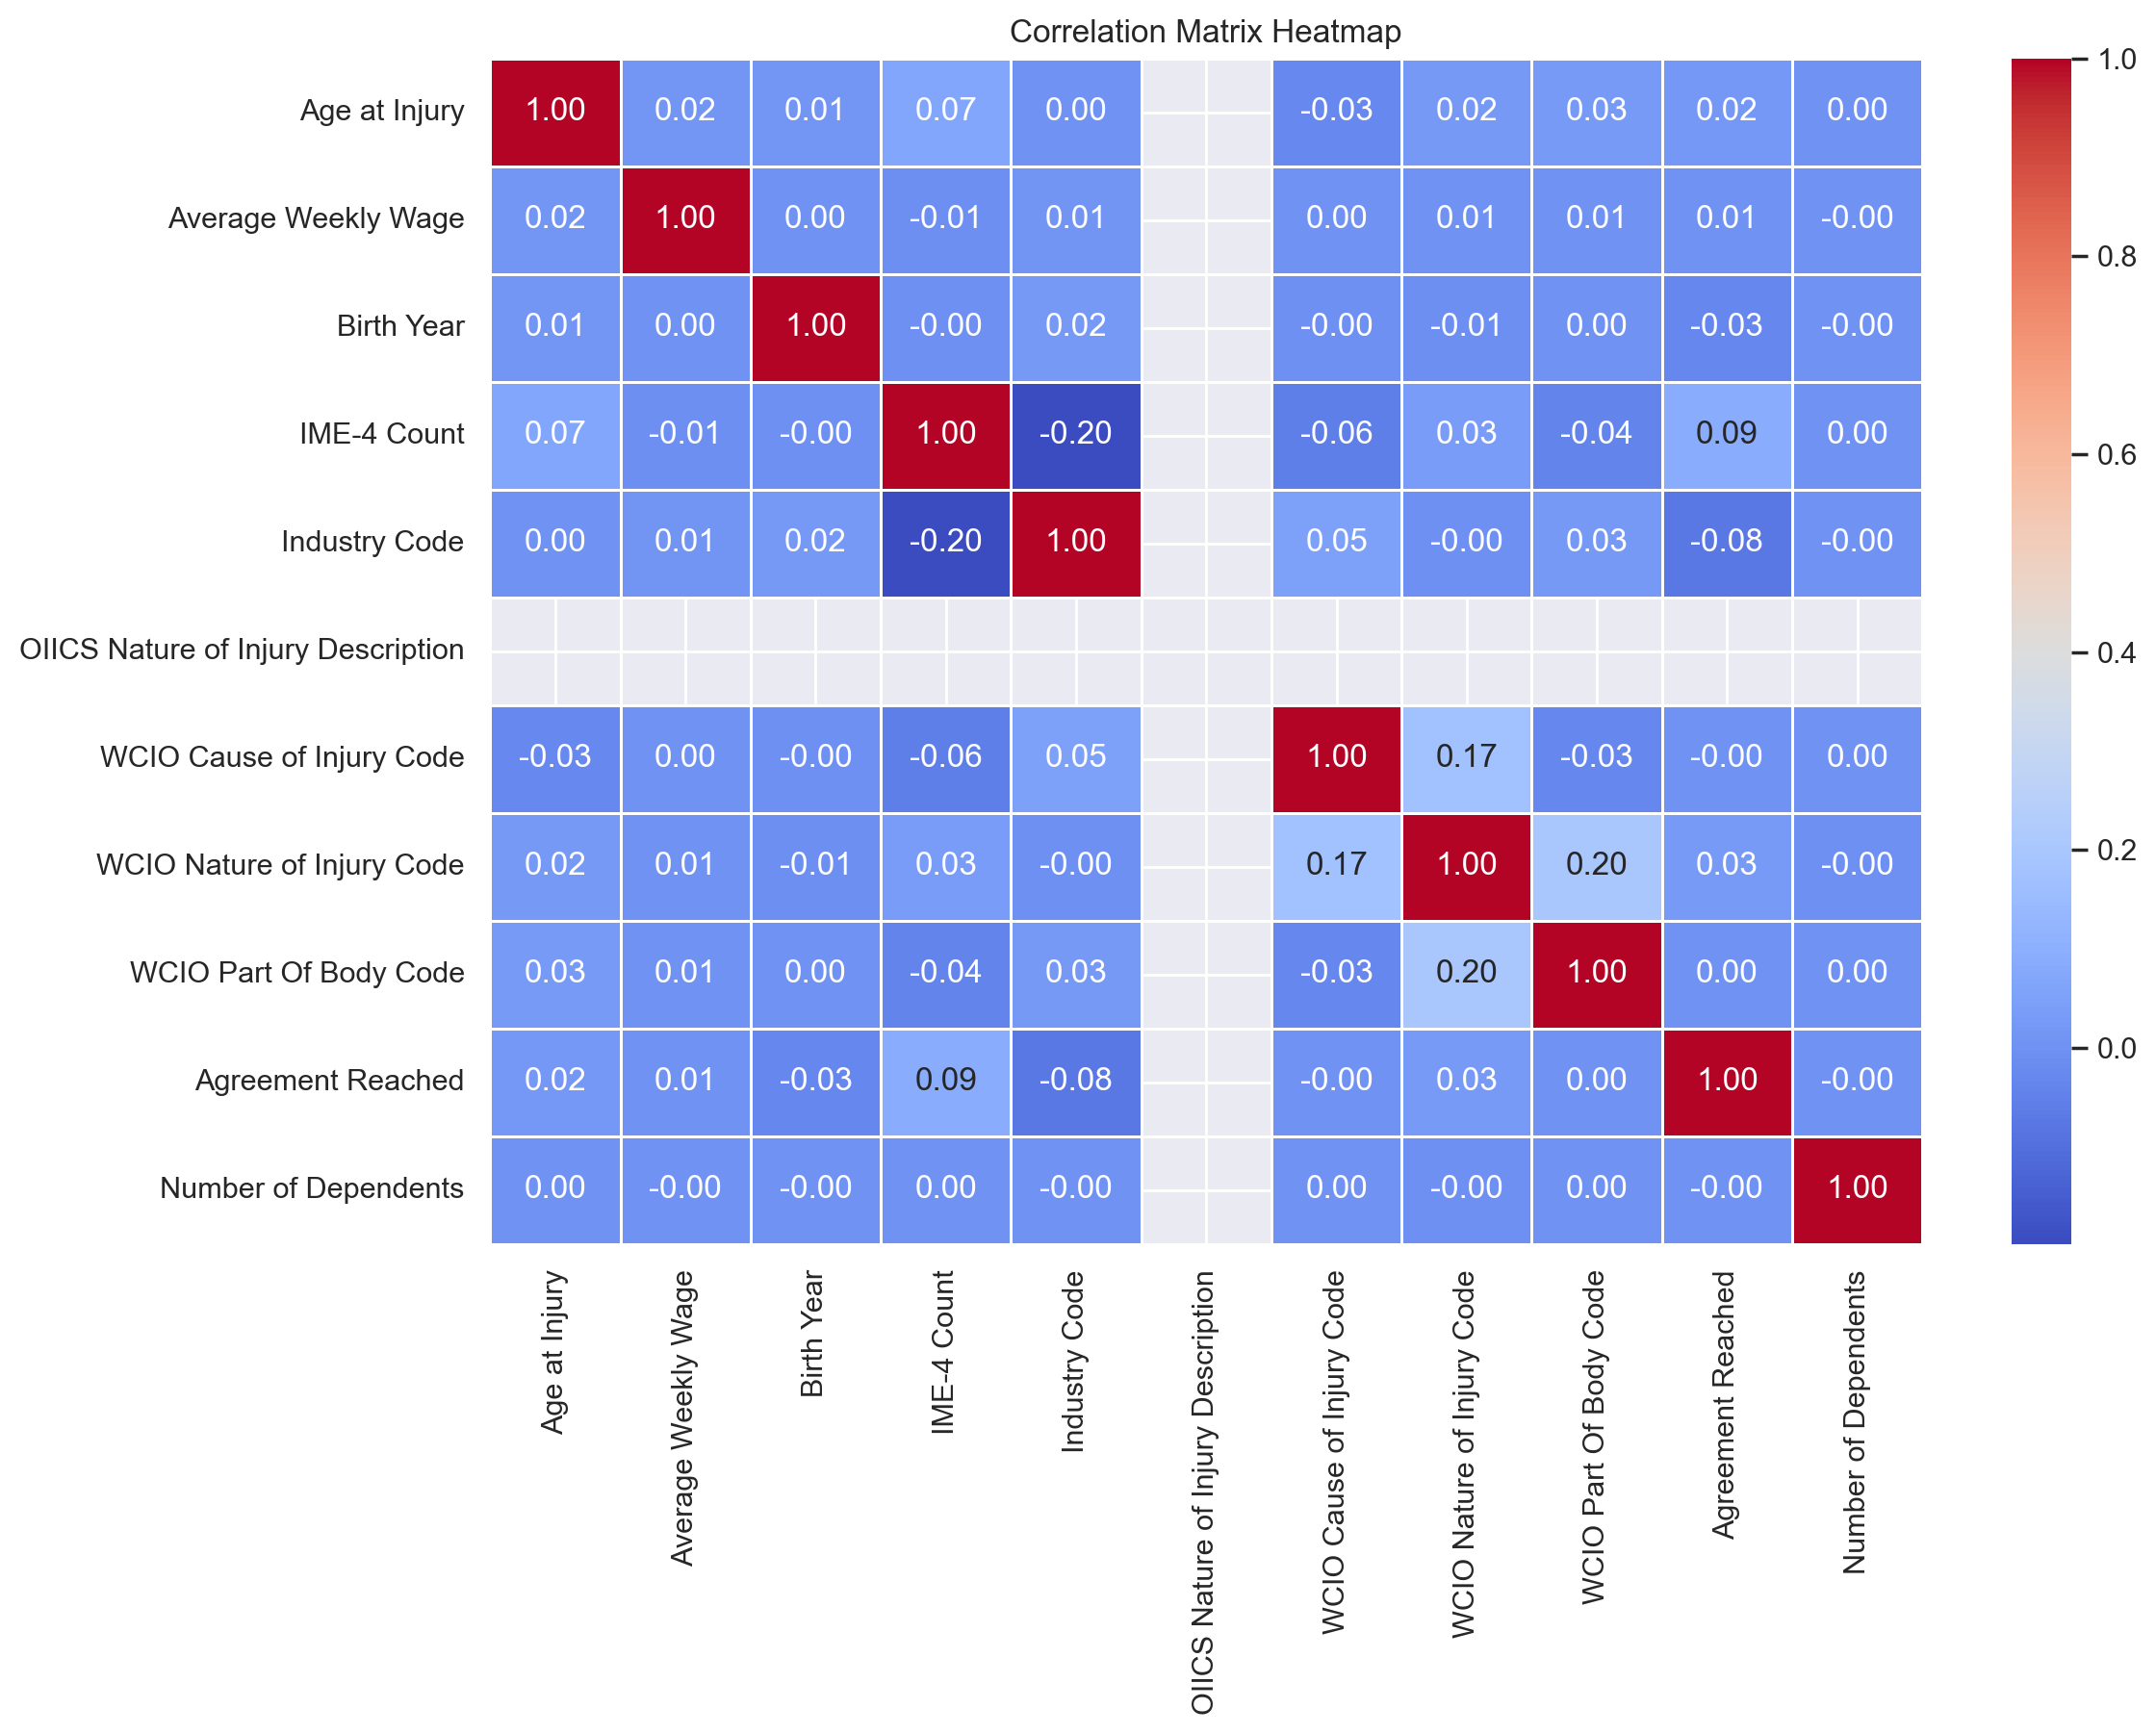

In [1016]:
# 1. Calculating the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# 2. Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


**High correlations**:
    **Birth Year** and **Age at Injury**


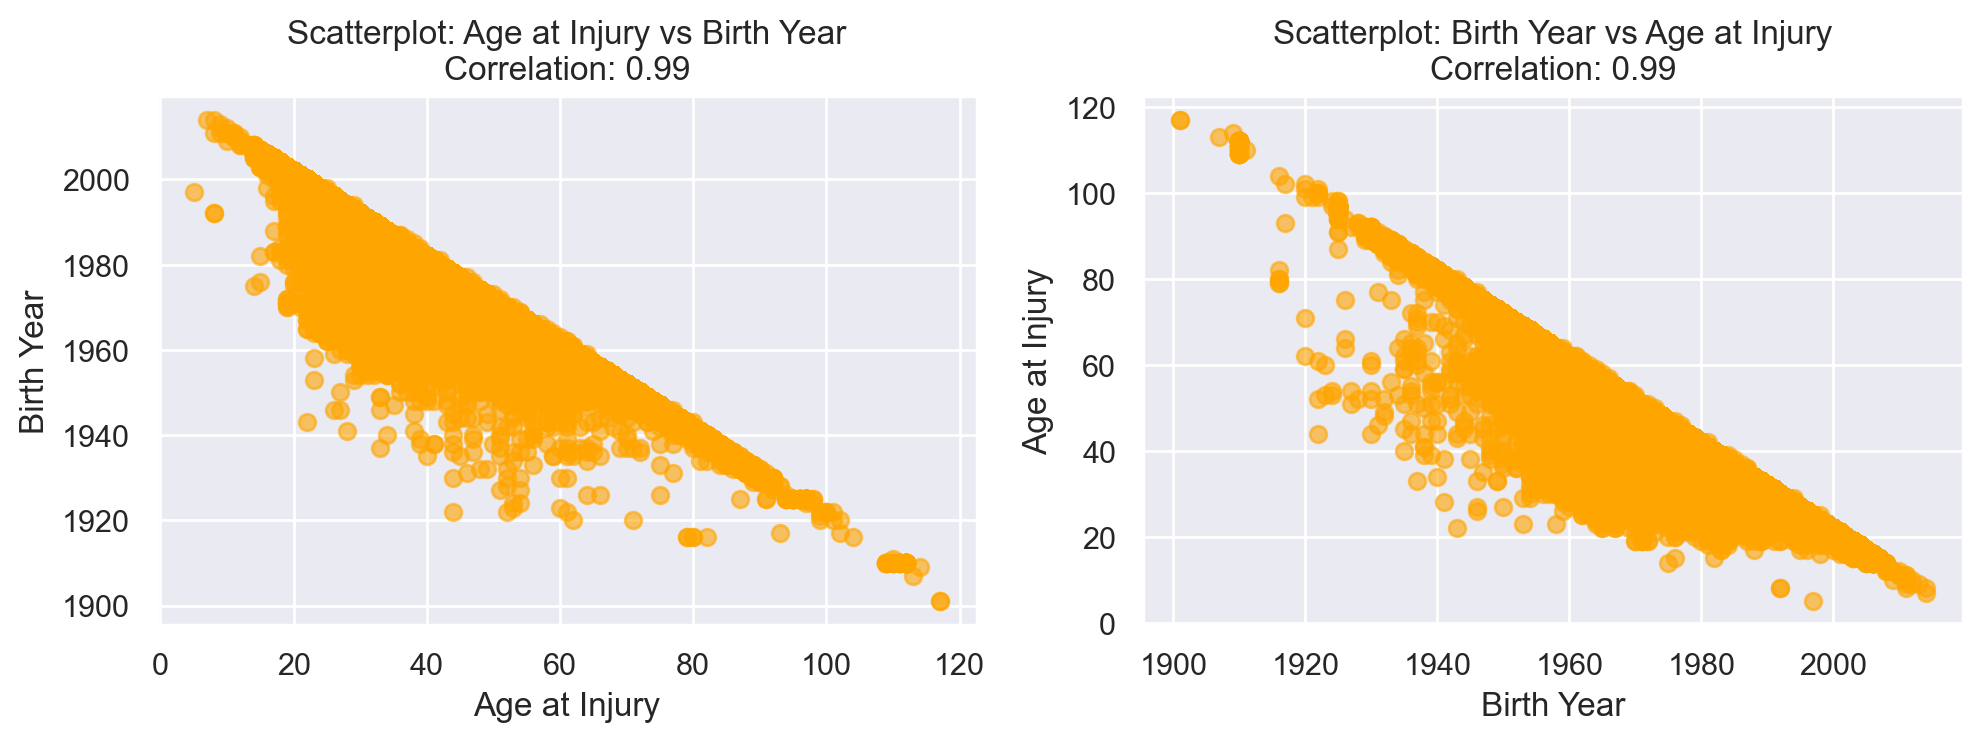

In [555]:
# Define a threshold to identify strong correlations
threshold = 0.7

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Sort by absolute correlation values
corr_pairs = correlation_matrix.unstack().abs().sort_values(ascending=False)

# Filter pairs with strong correlations above the threshold (between 0.7 and 1, excluding 1)
strong_corr_pairs = corr_pairs[(abs(corr_pairs) > threshold) & (corr_pairs < 1)]

# Limit to top 9 strong correlations to fit within the subplot grid
strong_corr_pairs = strong_corr_pairs.head(9)

# Generate scatterplots for pairs of strongly correlated variables
plt.figure(figsize=(15, 10))

for i, (pair, corr_value) in enumerate(strong_corr_pairs.items(), 1):
    var1, var2 = pair
    plt.subplot(3, 3, i)  # 3x3 grid of subplots
    plt.scatter(df[var1], df[var2], alpha=0.6, color='orange')
    plt.title(f'Scatterplot: {var1} vs {var2}\nCorrelation: {corr_value:.2f}')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()

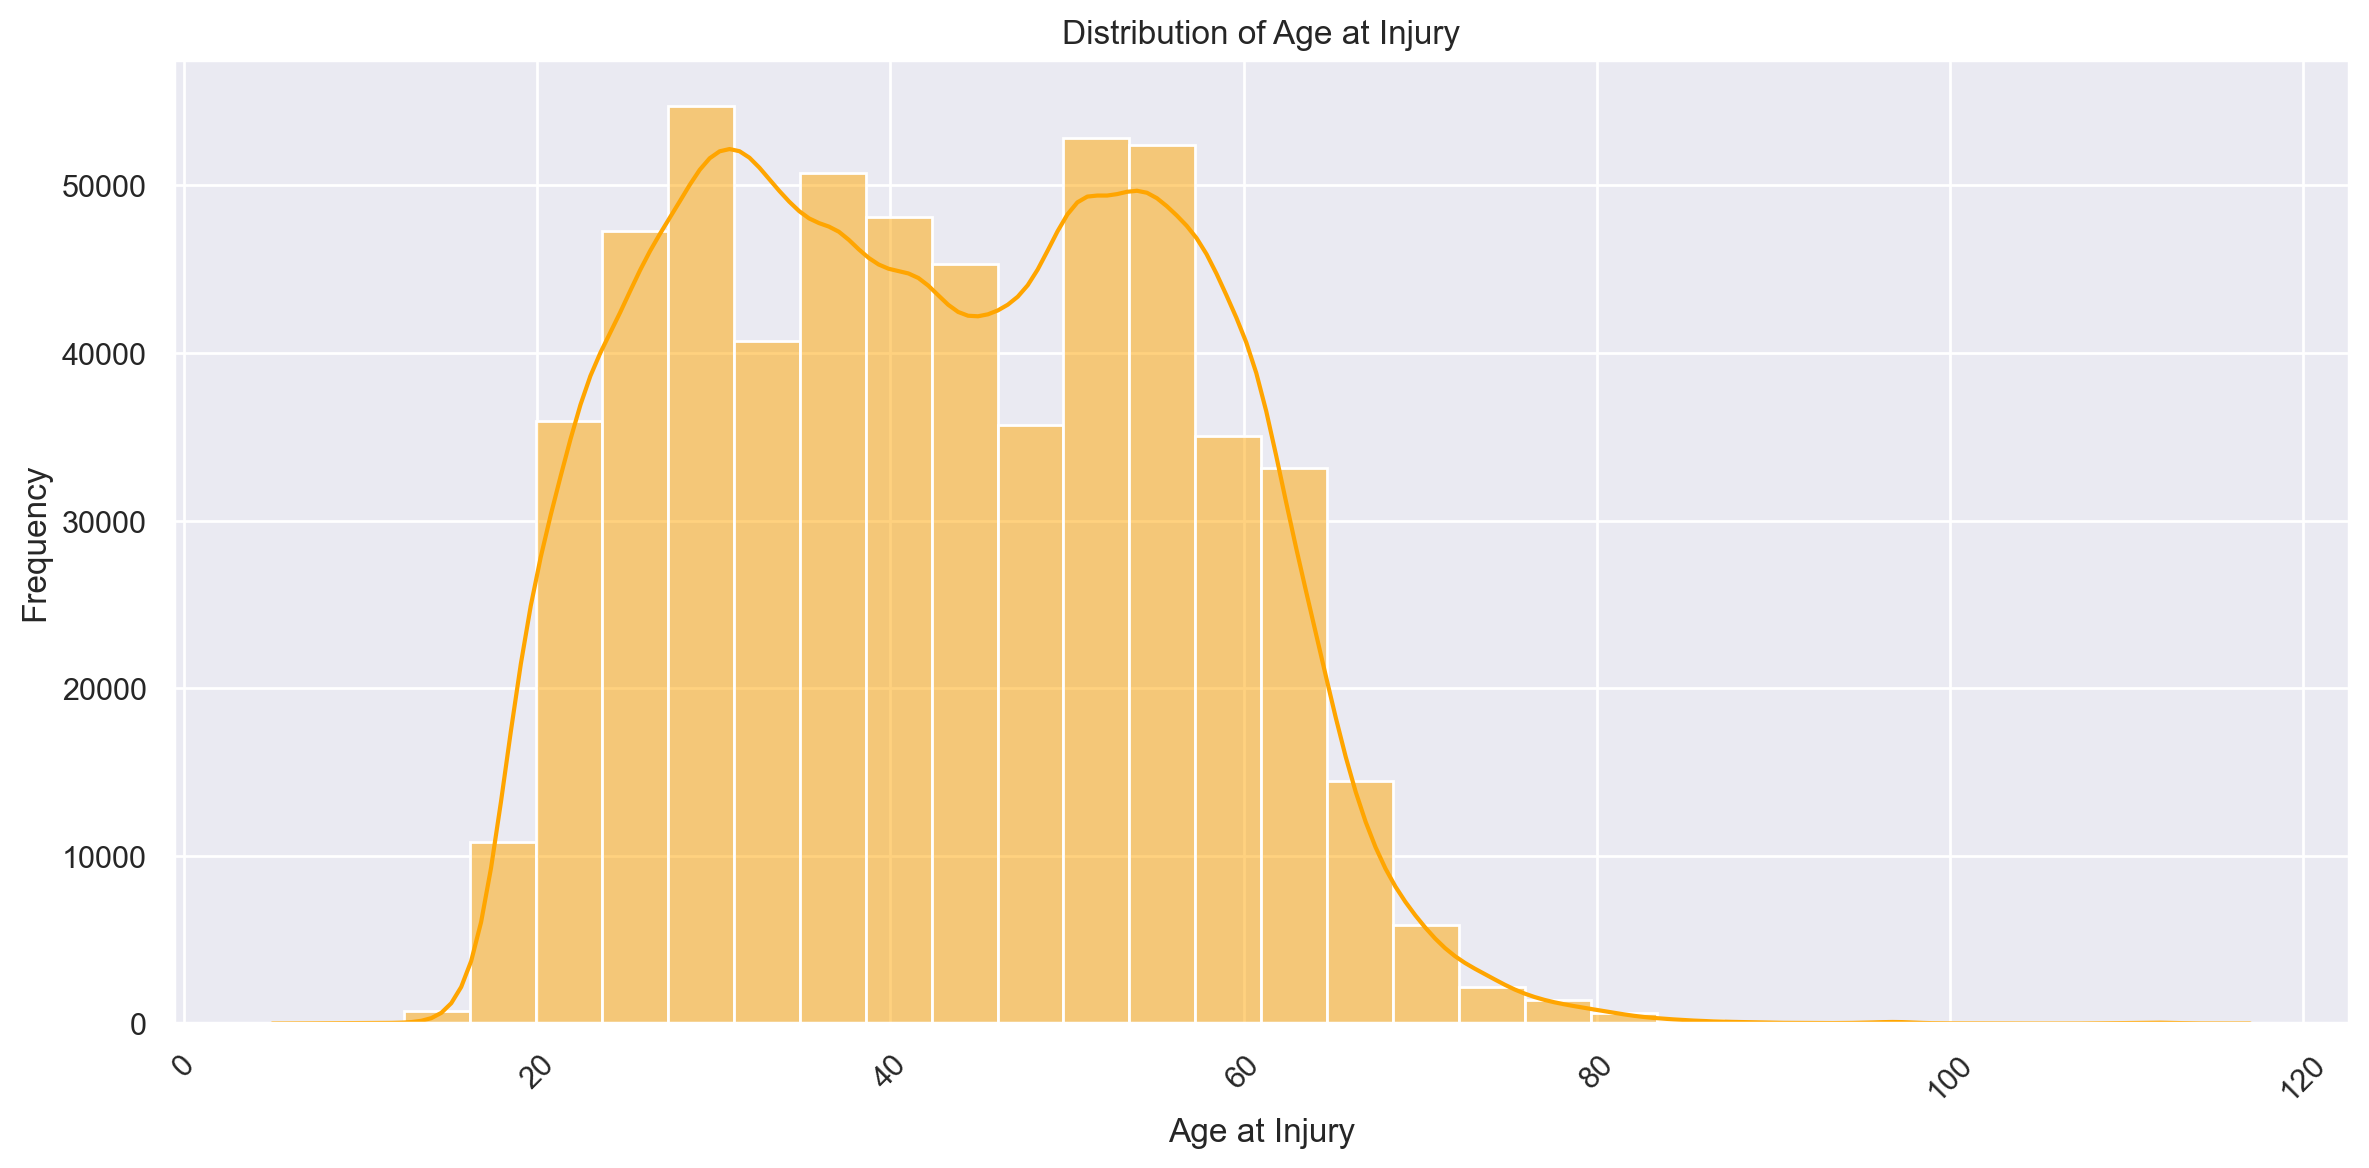

In [599]:
plt.figure(figsize=(12, 6))
sns.histplot(df[ 'Age at Injury'], bins=30, kde=True, color='orange')
plt.title('Distribution of Age at Injury')
plt.xlabel( 'Age at Injury')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

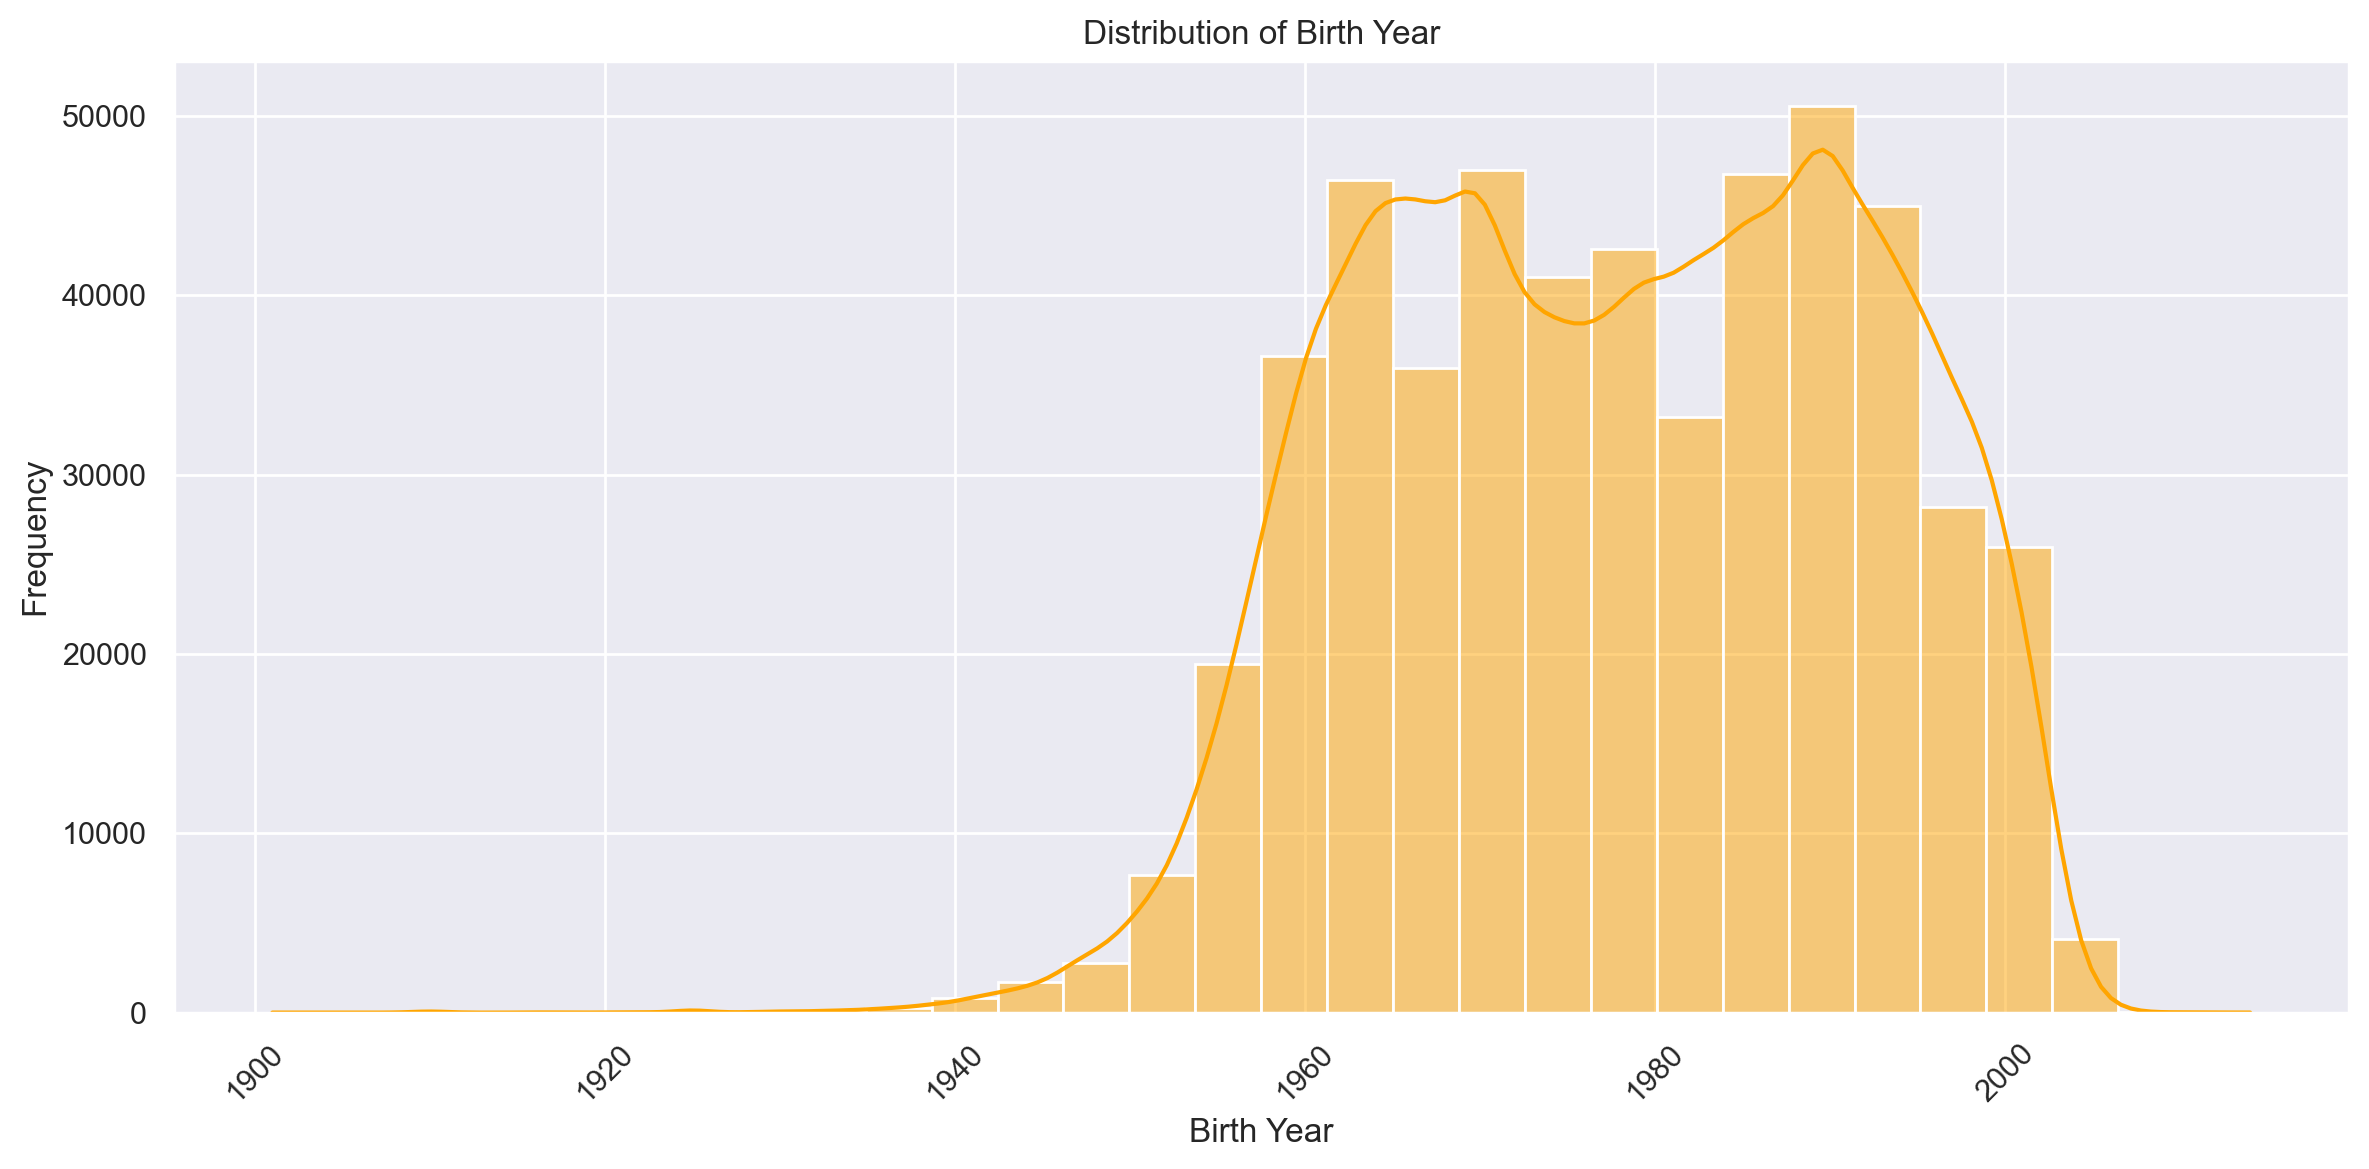

In [595]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Birth Year'], bins=30, kde=True, color='orange')
plt.title('Distribution of Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

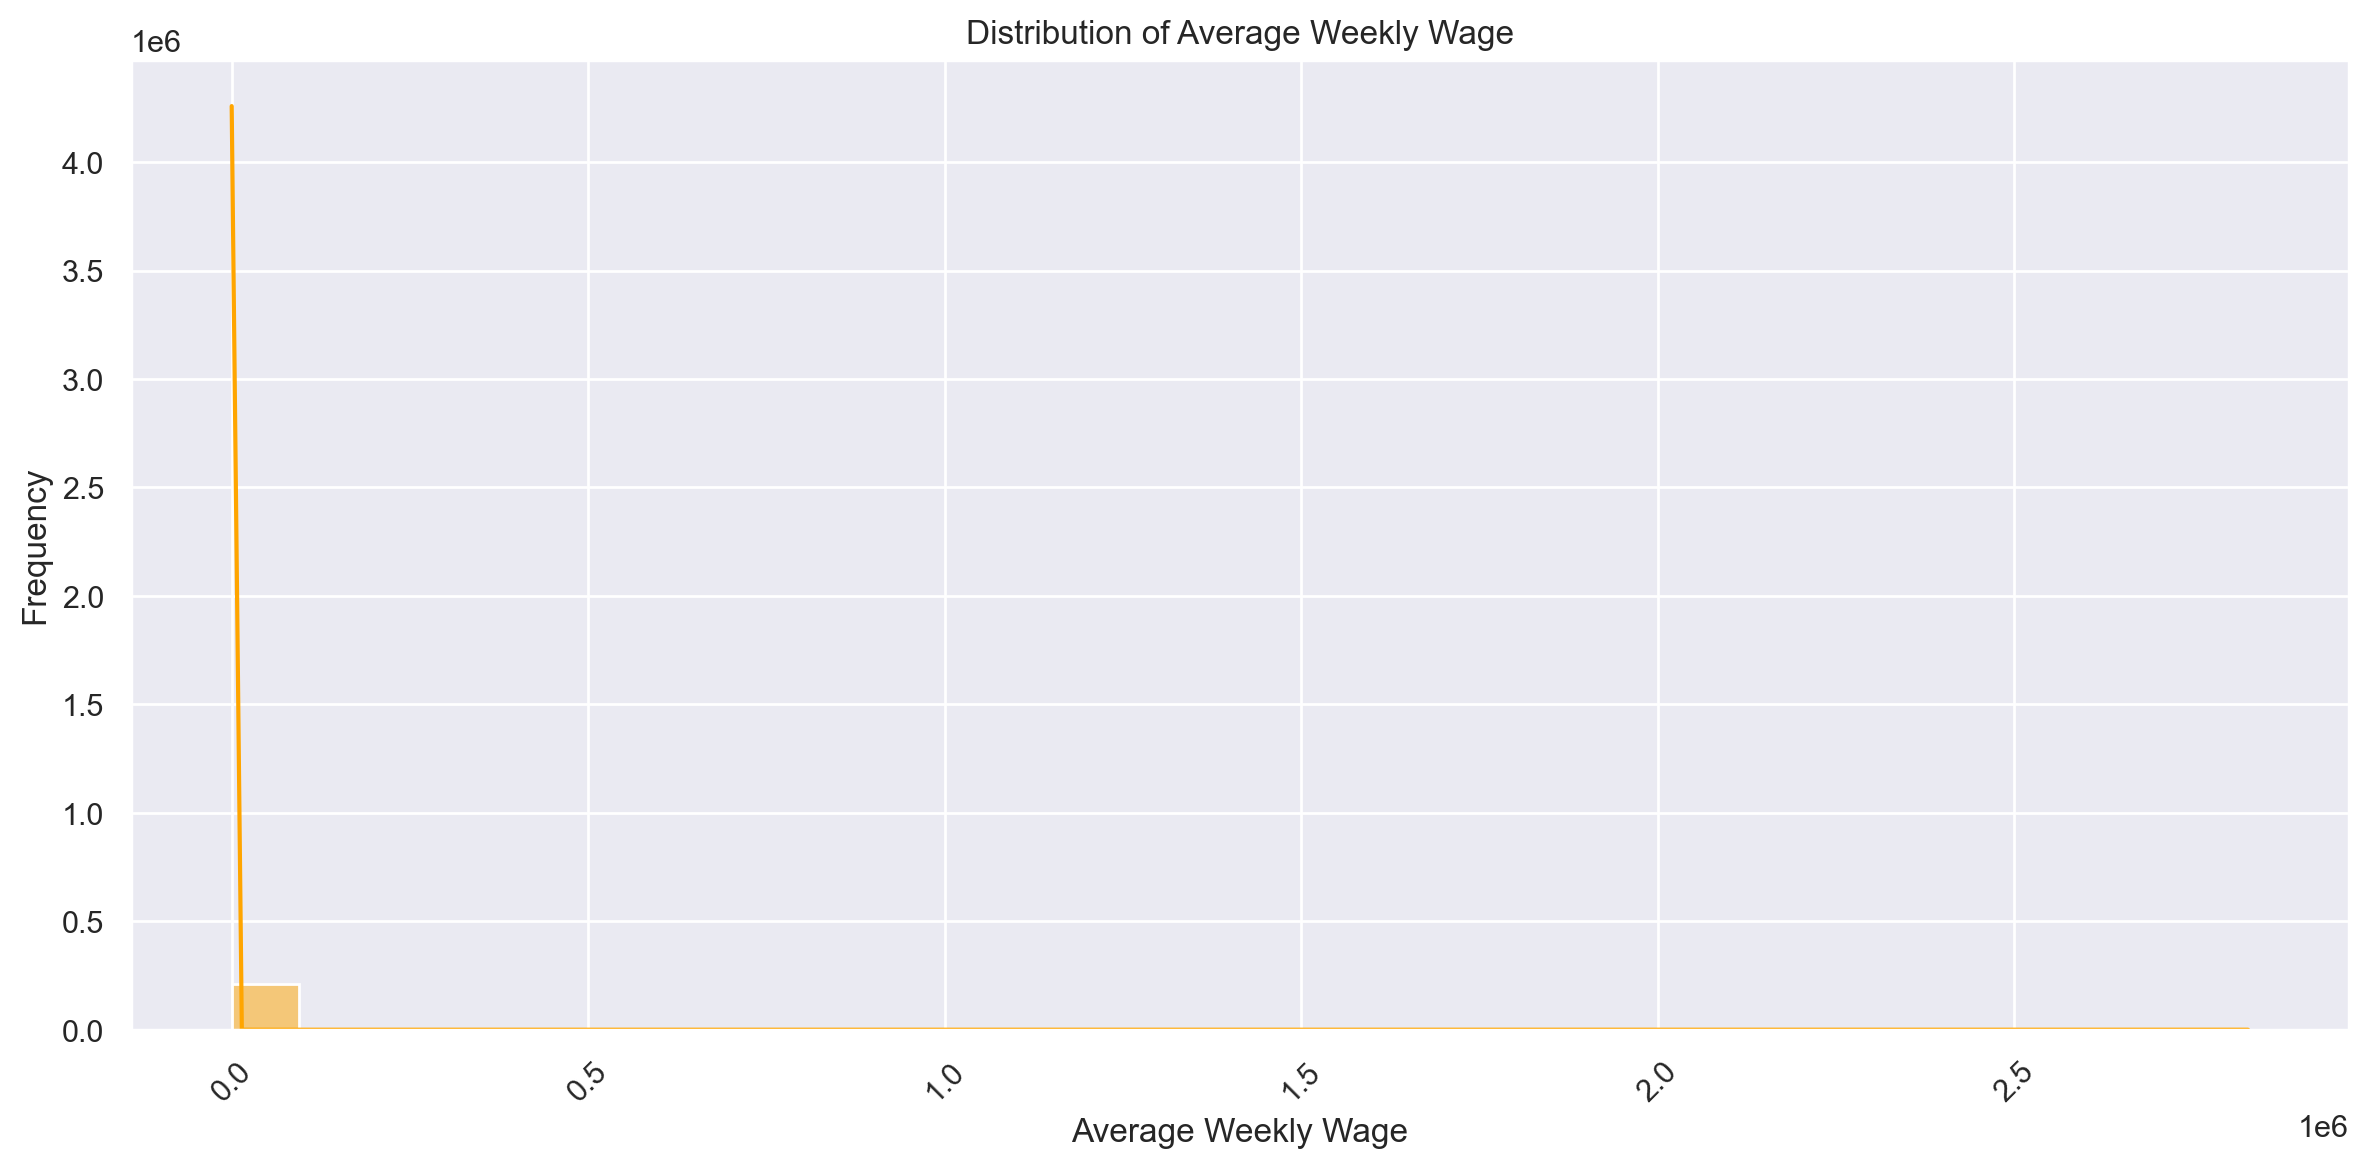

In [597]:
plt.figure(figsize=(12, 6))
sns.histplot(df[ 'Average Weekly Wage'], bins=30, kde=True, color='orange')
plt.title('Distribution of Average Weekly Wage')
plt.xlabel( 'Average Weekly Wage')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Categorical Columns

#### Columns of regions

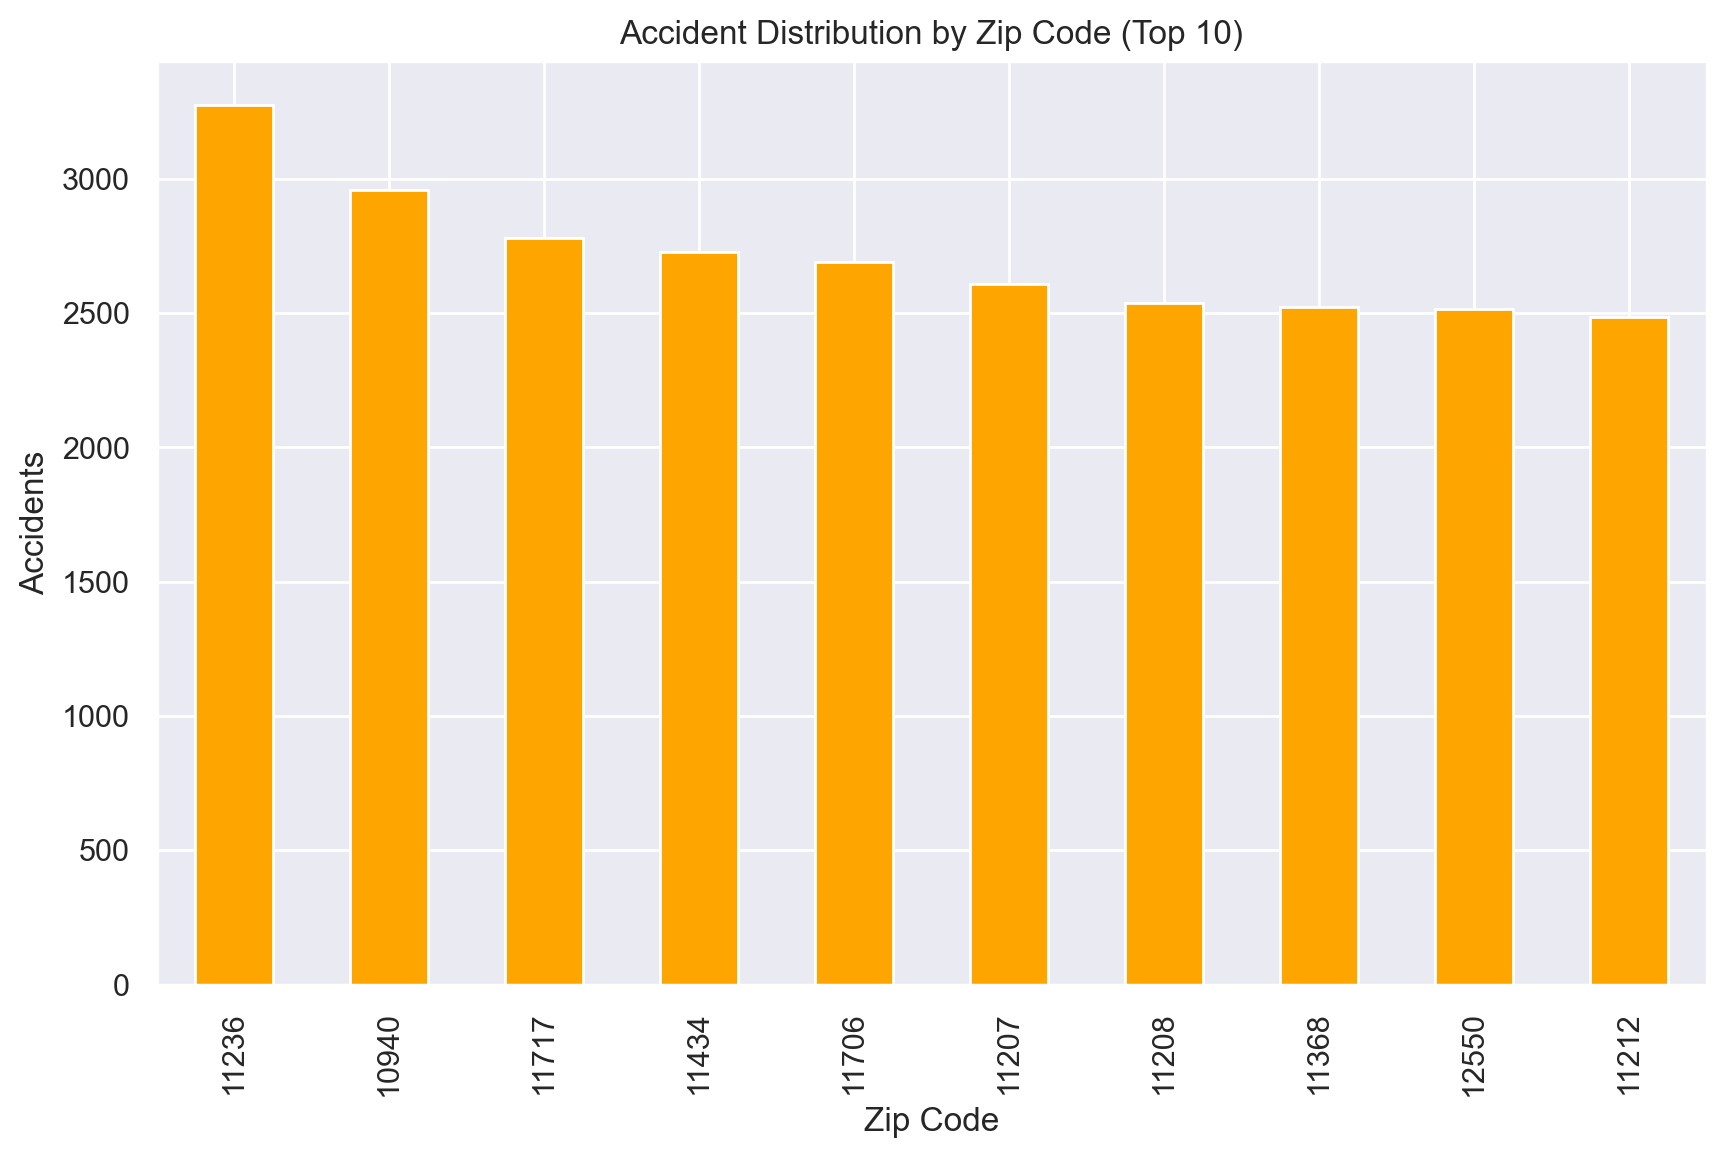

In [564]:
# Analyze accident occurrences by zip code
zip_counts = df['Zip Code'].value_counts().head(10)  # Show top 10 most frequent

# Plot the results
plt.figure(figsize=(10, 6))
zip_counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by Zip Code (Top 10)')
plt.xlabel('Zip Code')
plt.ylabel('Accidents')
plt.show()

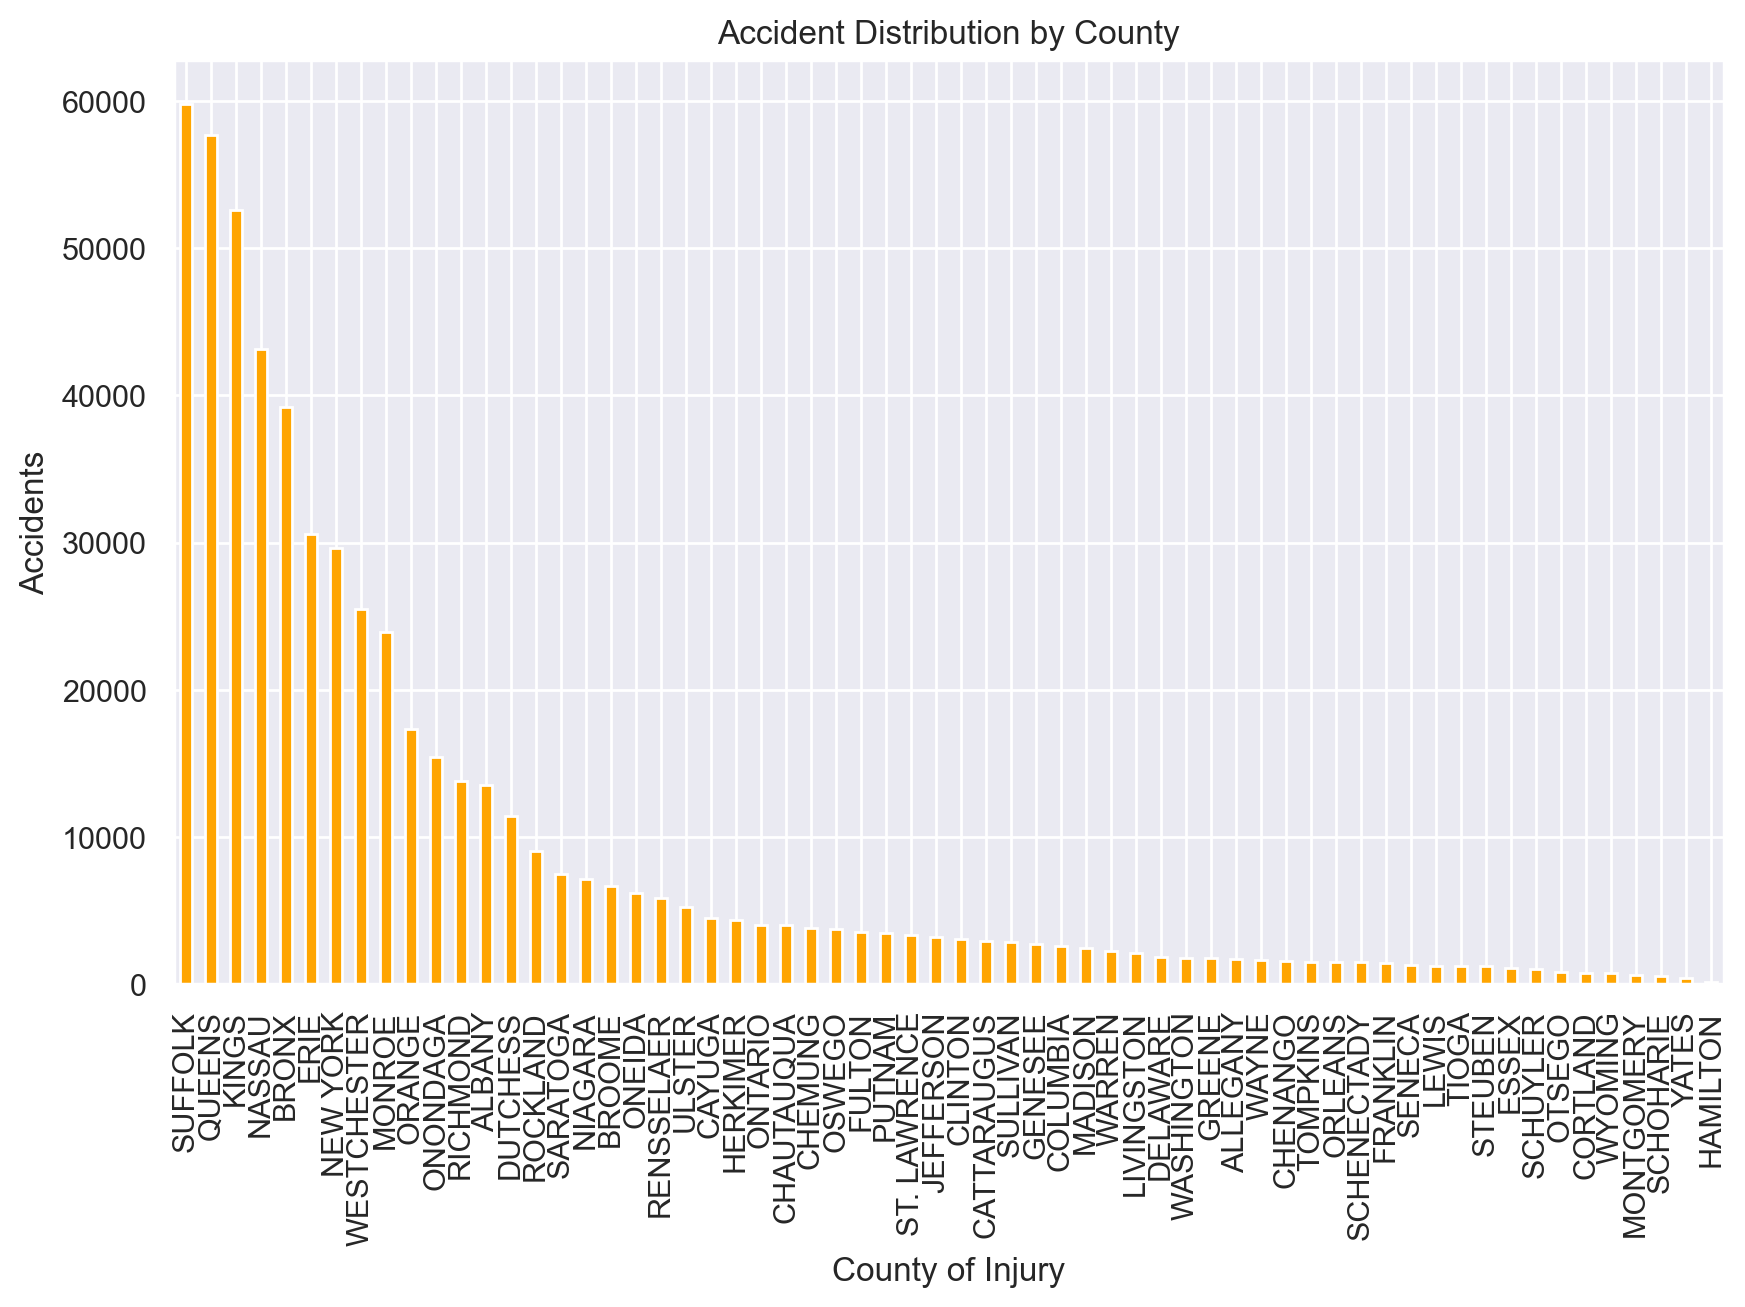

In [568]:
counts = df['County of Injury'].value_counts()  # Show top 10 most frequent

# Plot the results
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by County')
plt.xlabel('County of Injury')
plt.ylabel('Accidents')
plt.show()

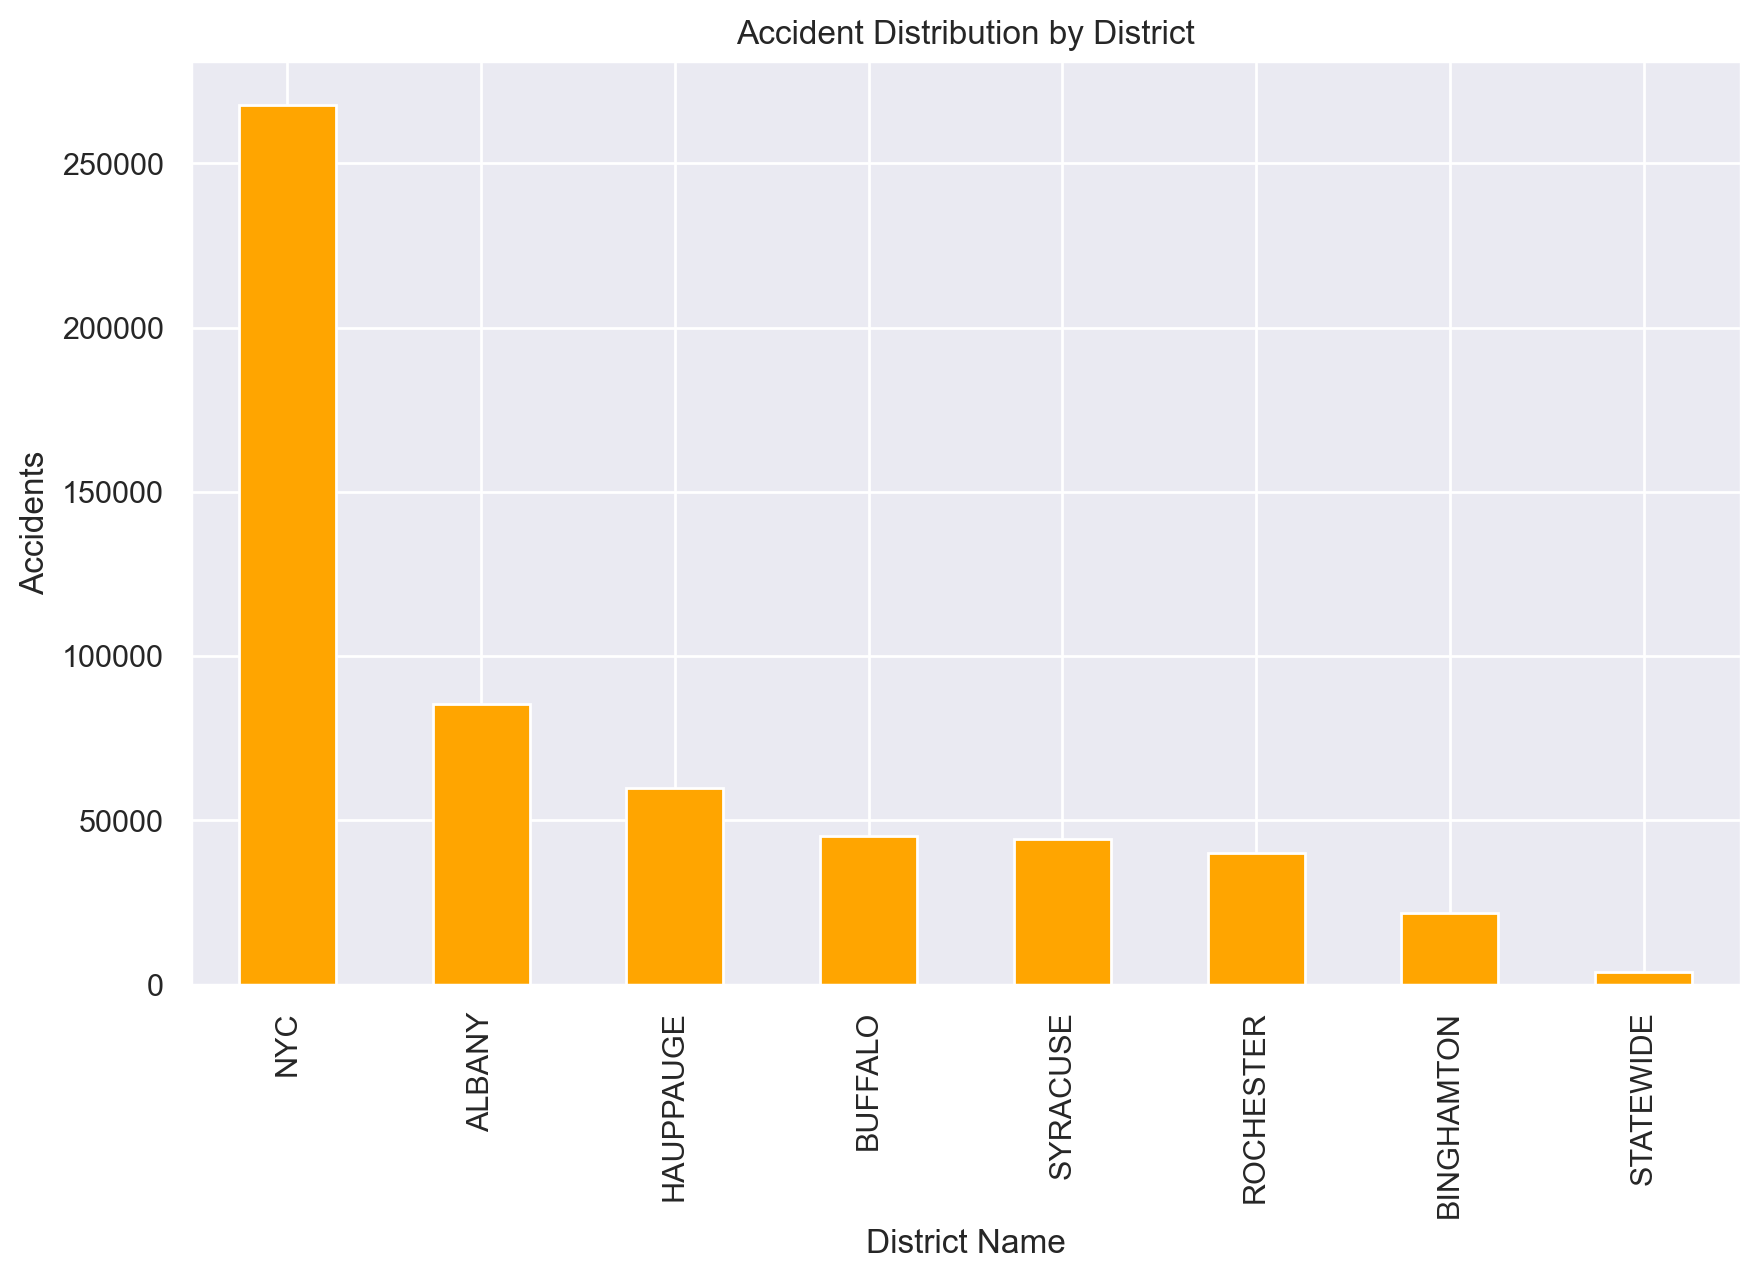

In [570]:
# Analyze accident occurrences by zip code
counts = df['District Name'].value_counts() 

# Plot the results
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by District')
plt.xlabel('District Name')
plt.ylabel('Accidents')
plt.show(

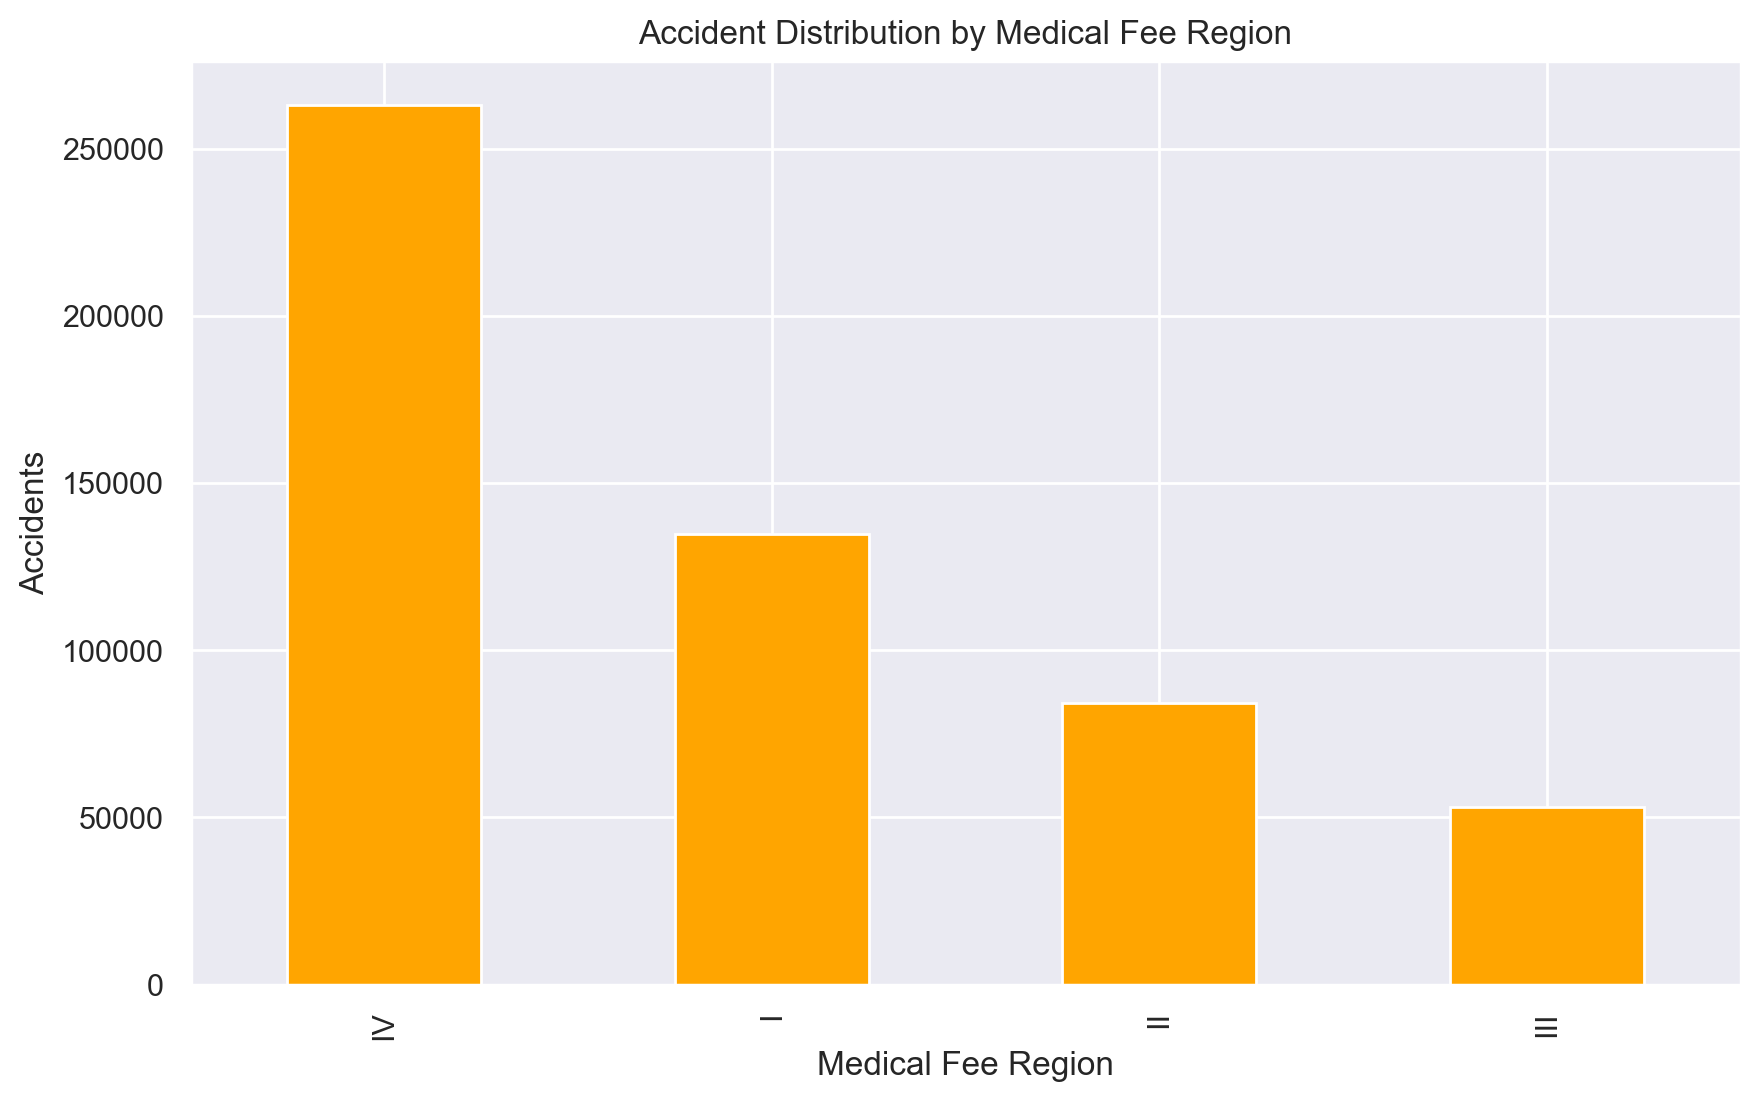

In [578]:
# Analyze accident occurrences by zip code
counts = df['Medical Fee Region'].value_counts() 

# Plot the results
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by Medical Fee Region')
plt.xlabel('Medical Fee Region')
plt.ylabel('Accidents')
plt.show()

Index(['Medical Fee Region', 'Count of Counties'], dtype='object')
  Medical Fee Region  Count of Counties
0                  I                 62
1                 II                 61
2                III                 33
3                 IV                 53


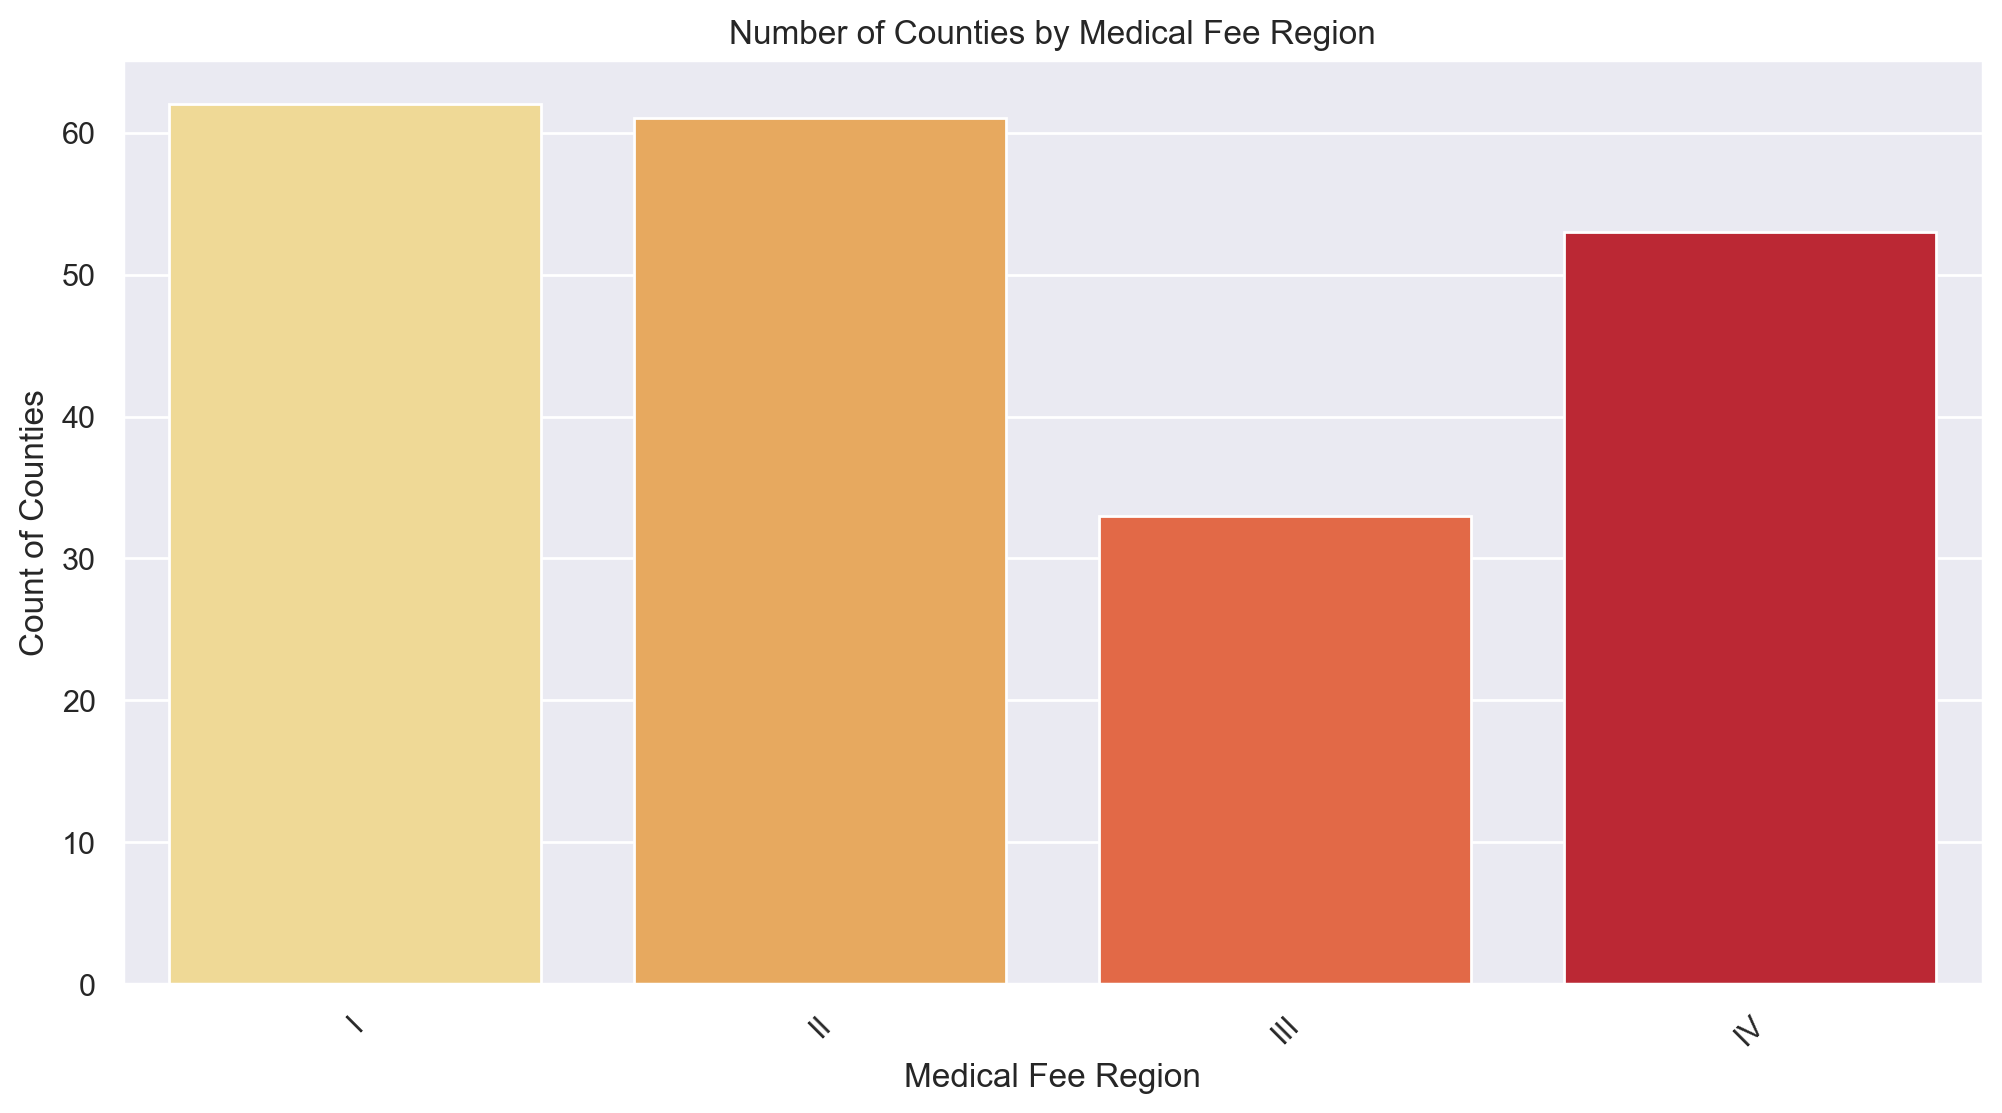

Index(['Medical Fee Region', 'Count of District'], dtype='object')
  Medical Fee Region  Count of District
0                  I                  8
1                 II                  8
2                III                  8
3                 IV                  8


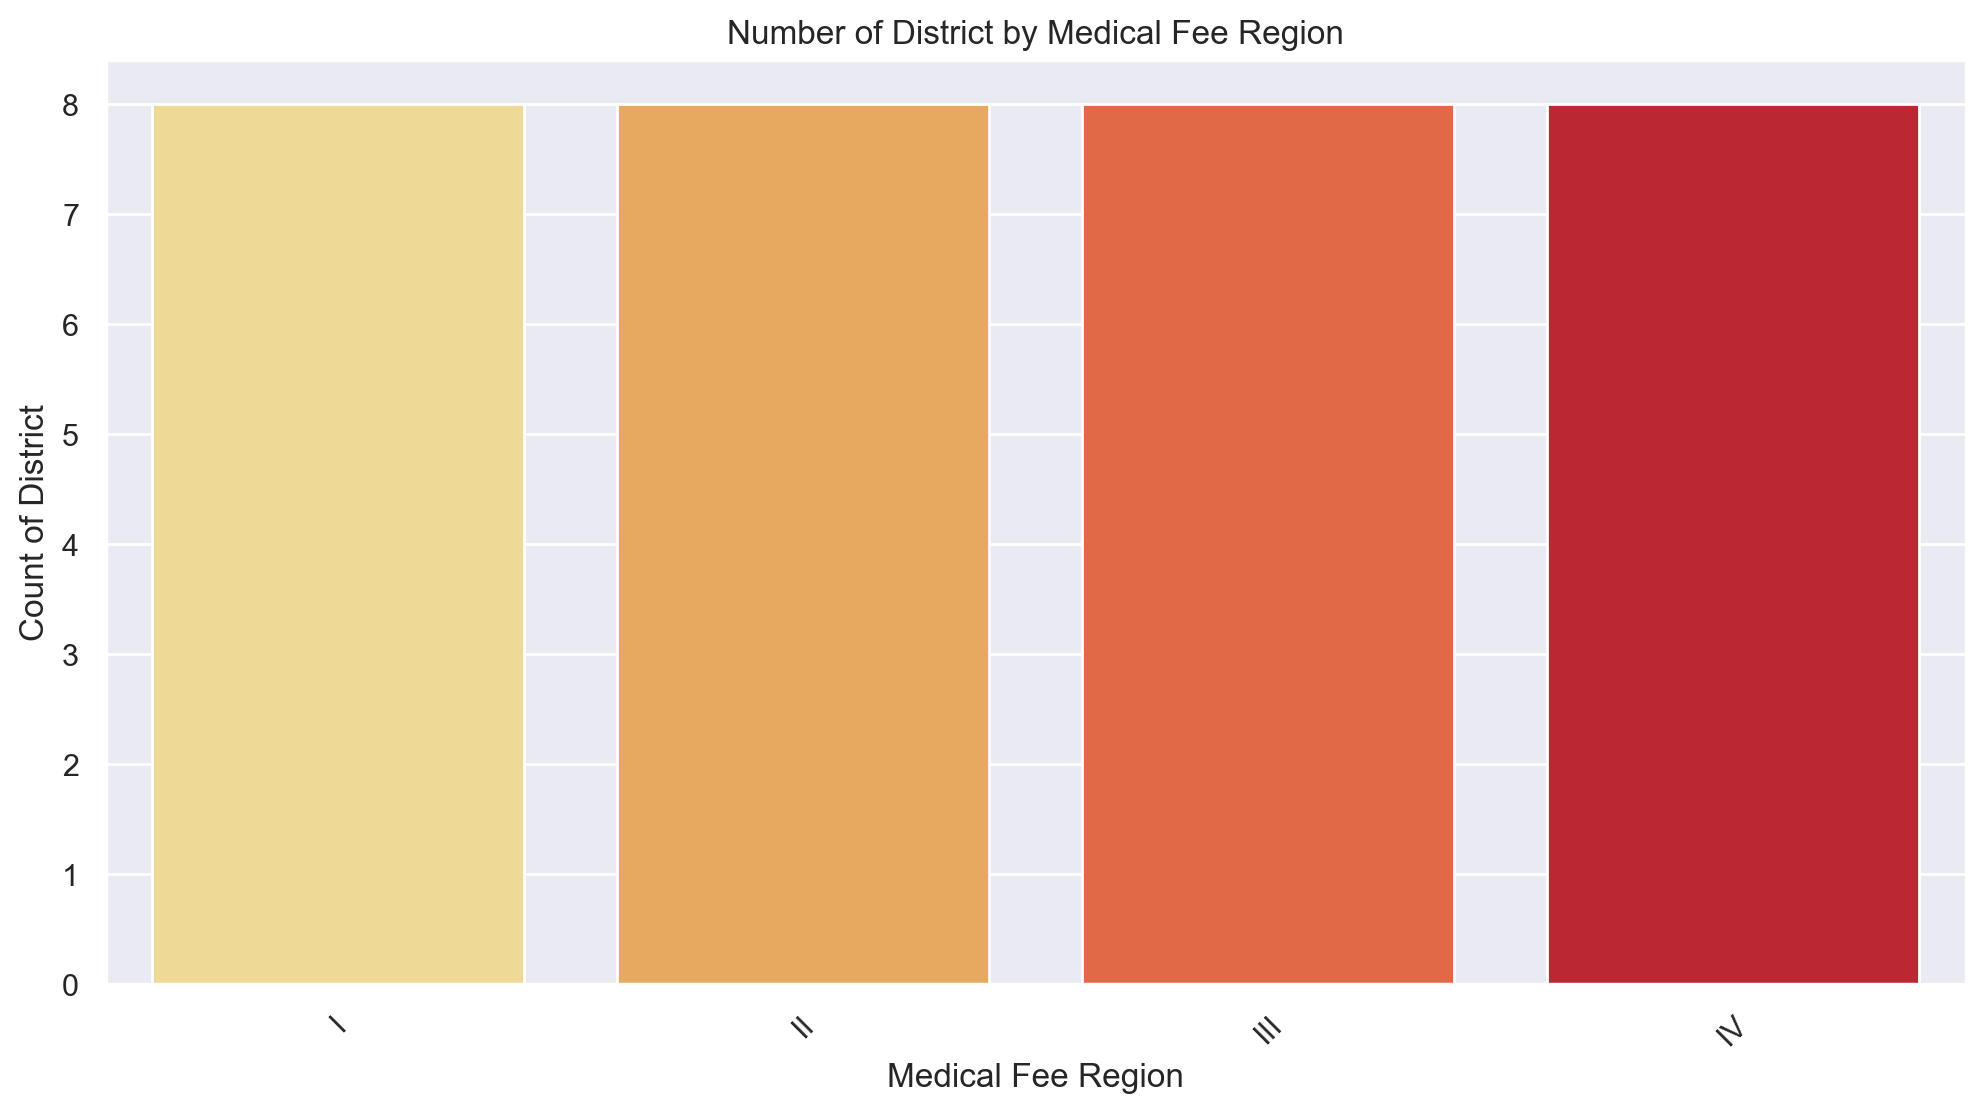

Index(['Medical Fee Region', 'Count of Zip Code'], dtype='object')
  Medical Fee Region  Count of Zip Code
0                  I               1863
1                 II                370
2                III                356
3                 IV                727


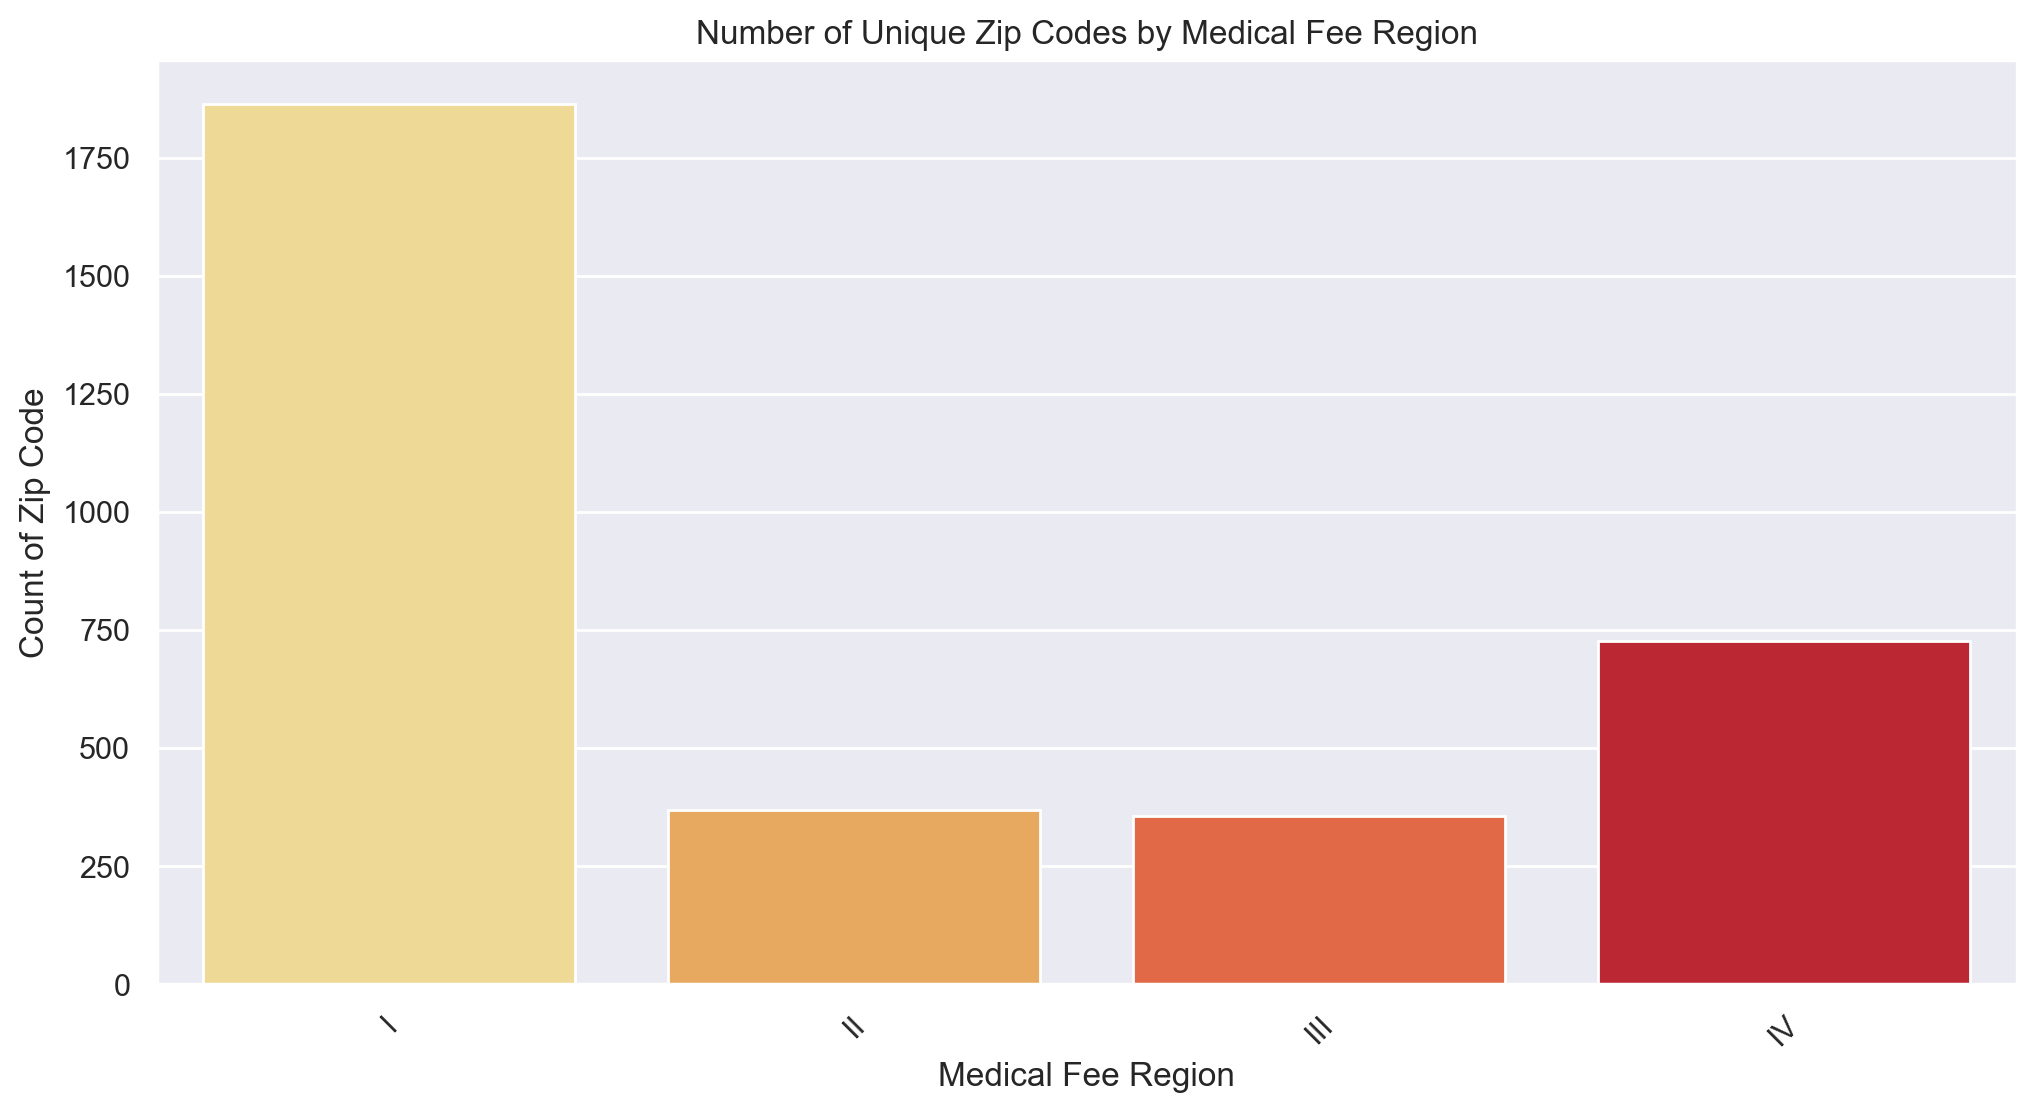

In [574]:
# Count the occurrence of Counties by Medical Fee Region
region_counts = df.groupby('Medical Fee Region')['County of Injury'].nunique().reset_index()
region_counts.columns = ['Medical Fee Region', 'Count of Counties']

# Check the column names and contents
print(region_counts.columns)
print(region_counts.head())

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=region_counts, x='Medical Fee Region', y='Count of Counties', palette='YlOrRd')
plt.title('Number of Counties by Medical Fee Region')
plt.xticks(rotation=45)
plt.show()


# Count the occurrence of Counties by Medical Fee Region
region_counts = df.groupby('Medical Fee Region')['District Name'].nunique().reset_index()
region_counts.columns = ['Medical Fee Region', 'Count of District']

# Check the column names and contents
print(region_counts.columns)
print(region_counts.head())

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=region_counts, x='Medical Fee Region', y='Count of District', palette='YlOrRd')
plt.title('Number of District by Medical Fee Region')
plt.xticks(rotation=45)
plt.show()

# Count the occurrence of unique Zip Codes by Medical Fee Region
region_counts = df.groupby('Medical Fee Region')['Zip Code'].nunique().reset_index()
region_counts.columns = ['Medical Fee Region', 'Count of Zip Code']  # Renaming to include 'Count of Zip Code'

# Check the column names and contents
print(region_counts.columns)
print(region_counts.head())

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=region_counts, x='Medical Fee Region', y='Count of Zip Code', palette='YlOrRd')  # Corrected column name
plt.title('Number of Unique Zip Codes by Medical Fee Region')  # Updated title for clarity
plt.xticks(rotation=45)
plt.show()

#### Descriptions of Codes Columns

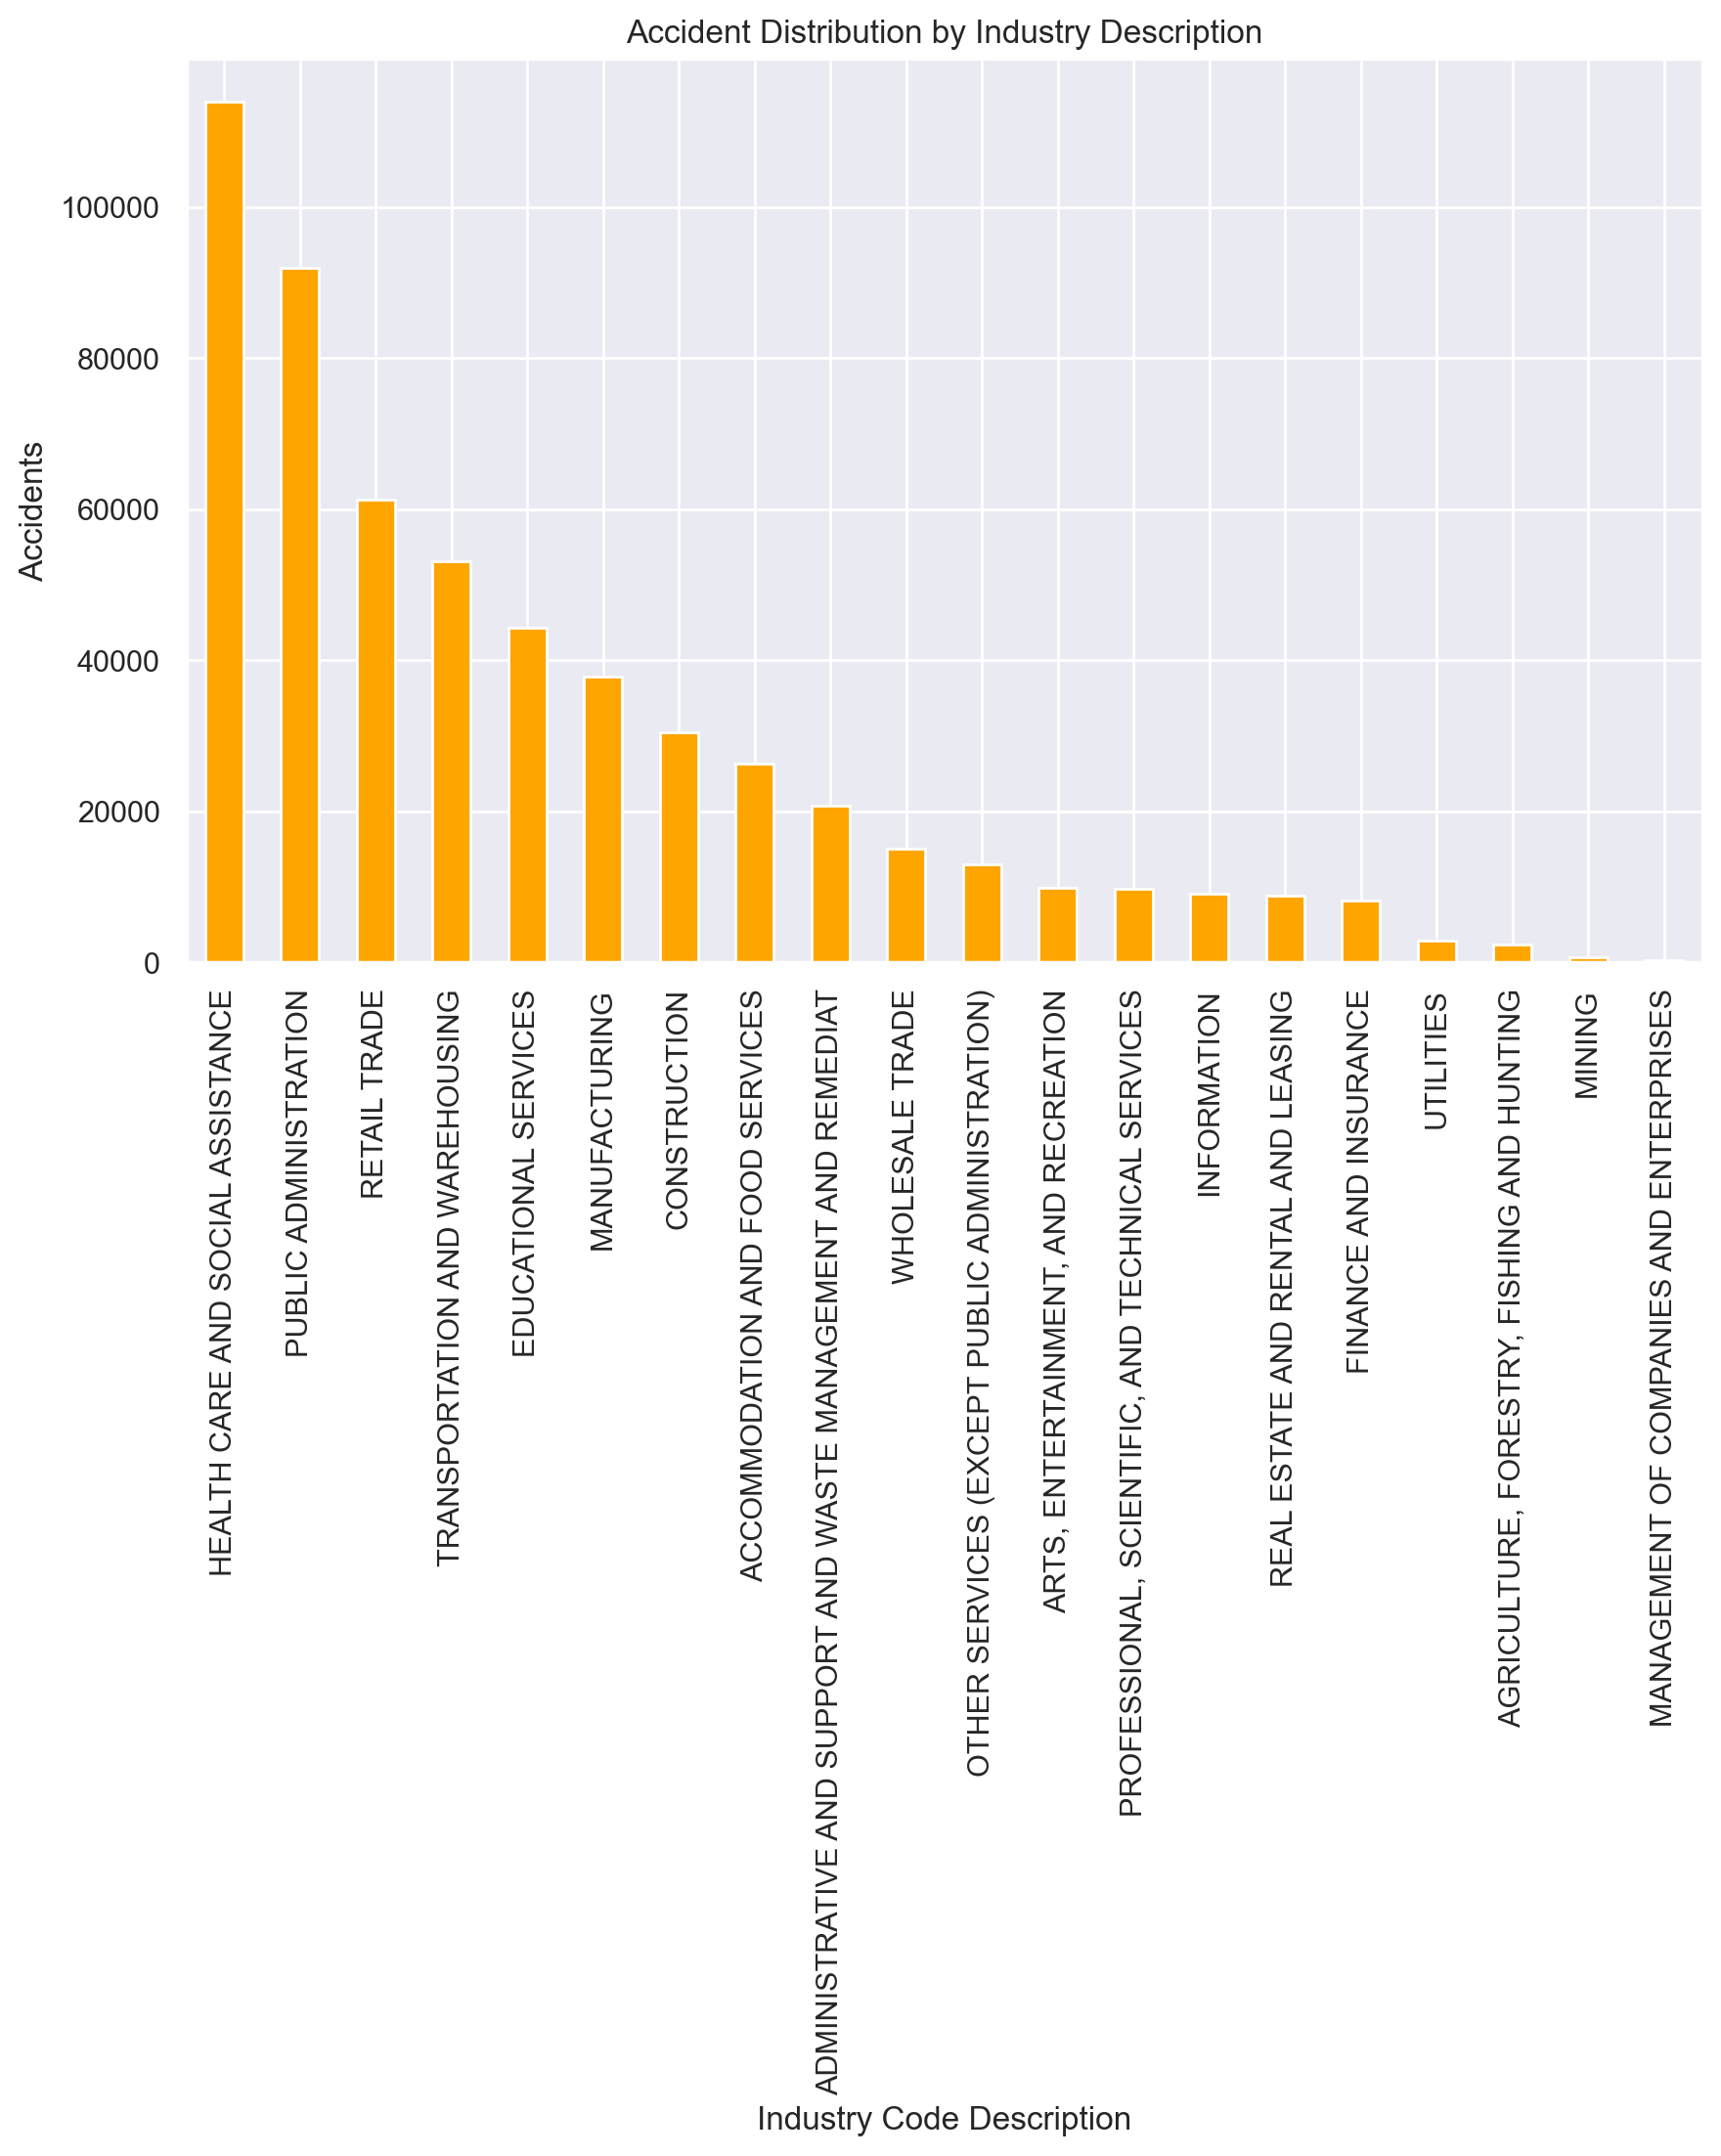

In [586]:
descriptions_counts = df['Industry Code Description'].value_counts() 
# Plot the results
plt.figure(figsize=(10, 6))
descriptions_counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by Industry Description')
plt.xlabel('Industry Code Description')
plt.ylabel('Accidents')
plt.show()

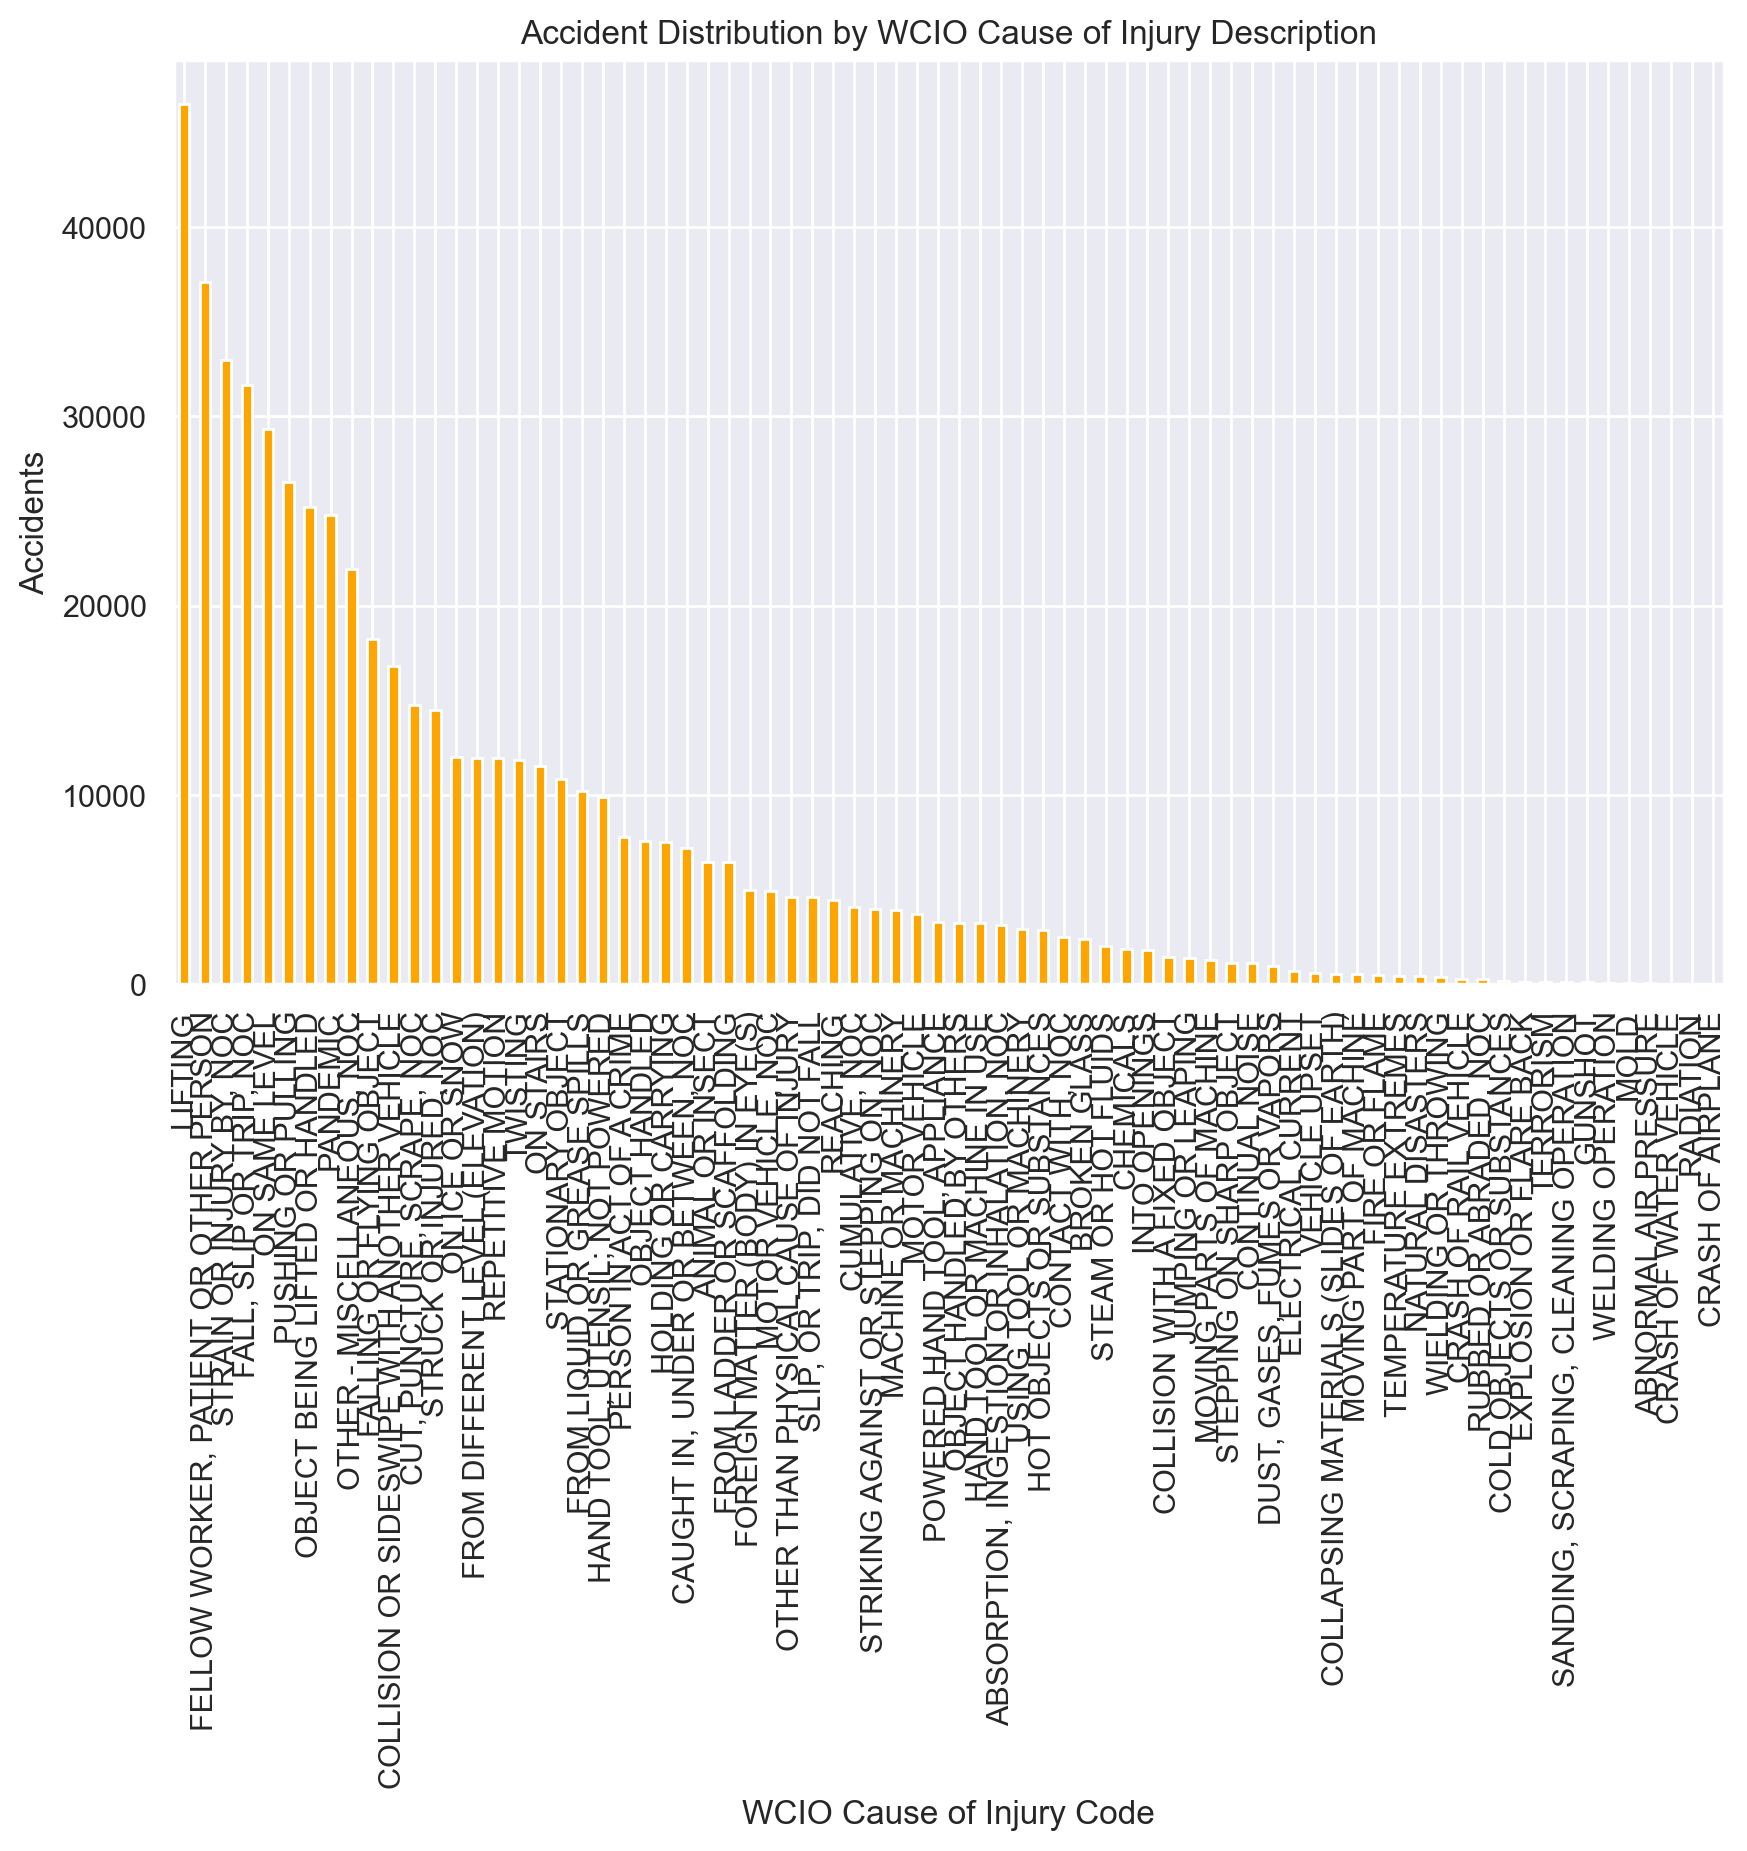

In [589]:
descriptions_counts = df['WCIO Cause of Injury Description'].value_counts() 
plt.figure(figsize=(10, 6))
descriptions_counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by WCIO Cause of Injury Description')
plt.xlabel('WCIO Cause of Injury Code')
plt.ylabel('Accidents')
plt.show()

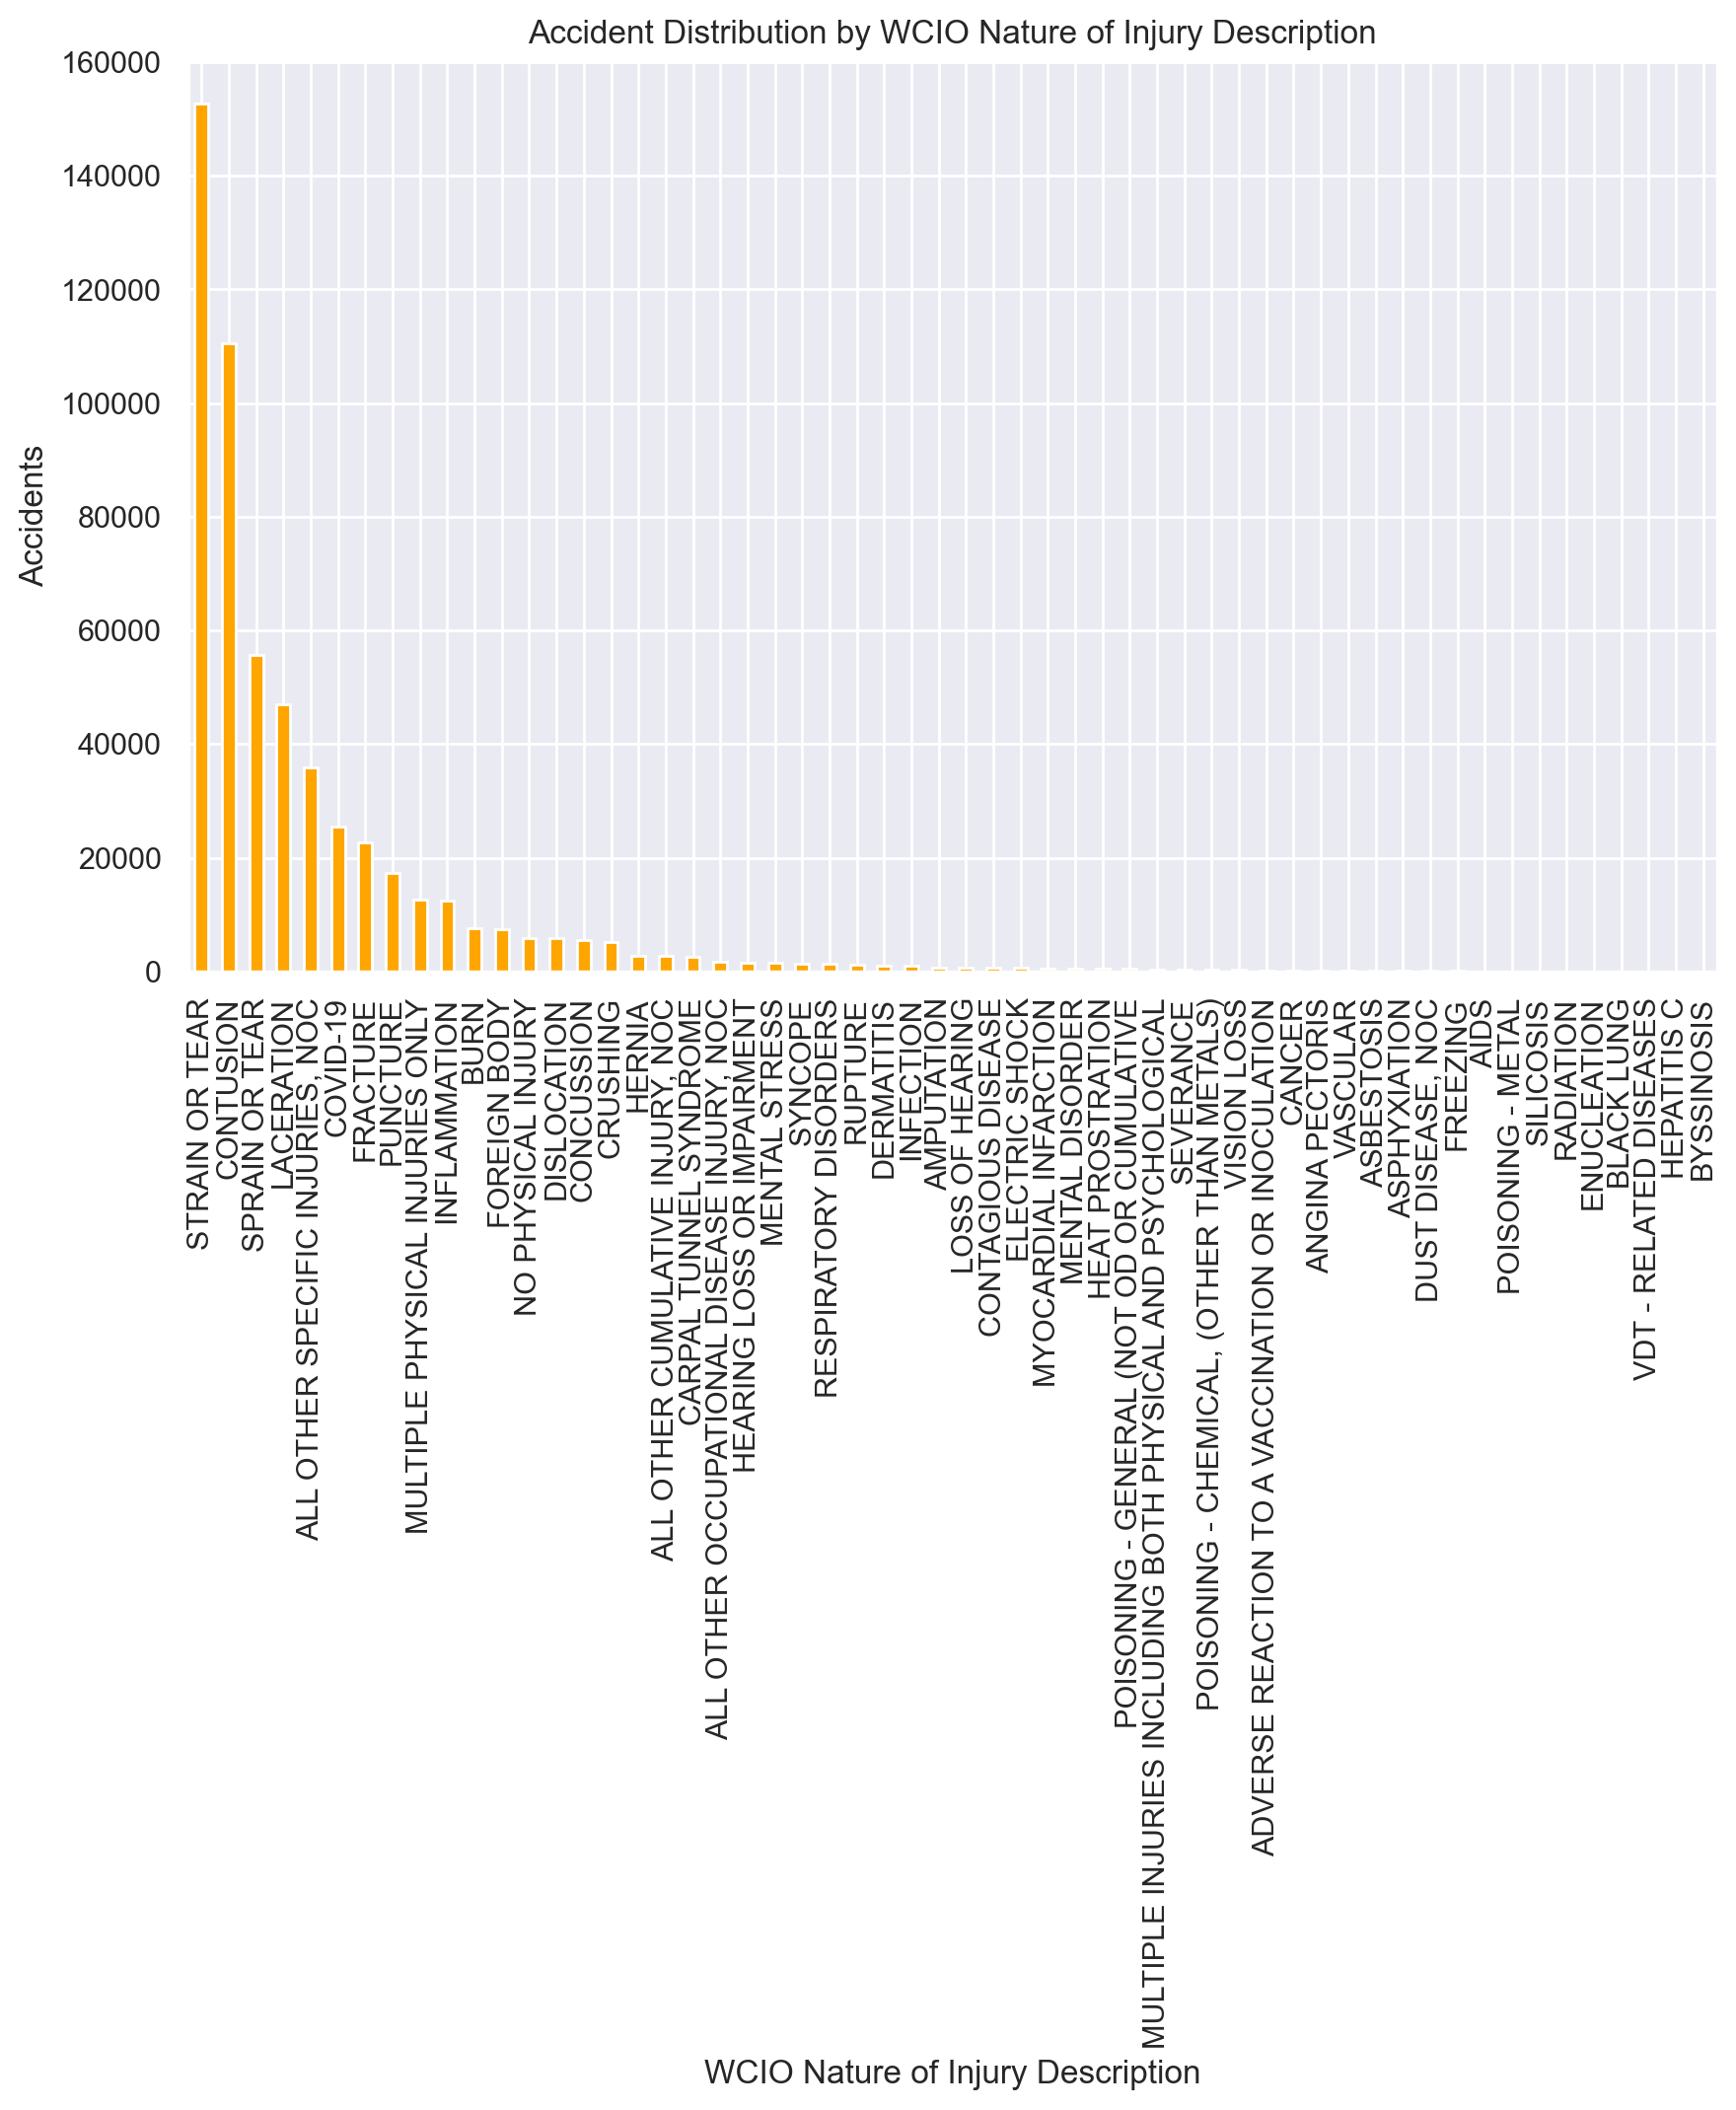

In [591]:
code_counts = df['WCIO Nature of Injury Description'].value_counts() 
plt.figure(figsize=(10, 6))
code_counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by WCIO Nature of Injury Description')
plt.xlabel('WCIO Nature of Injury Description')
plt.ylabel('Accidents')
plt.show()

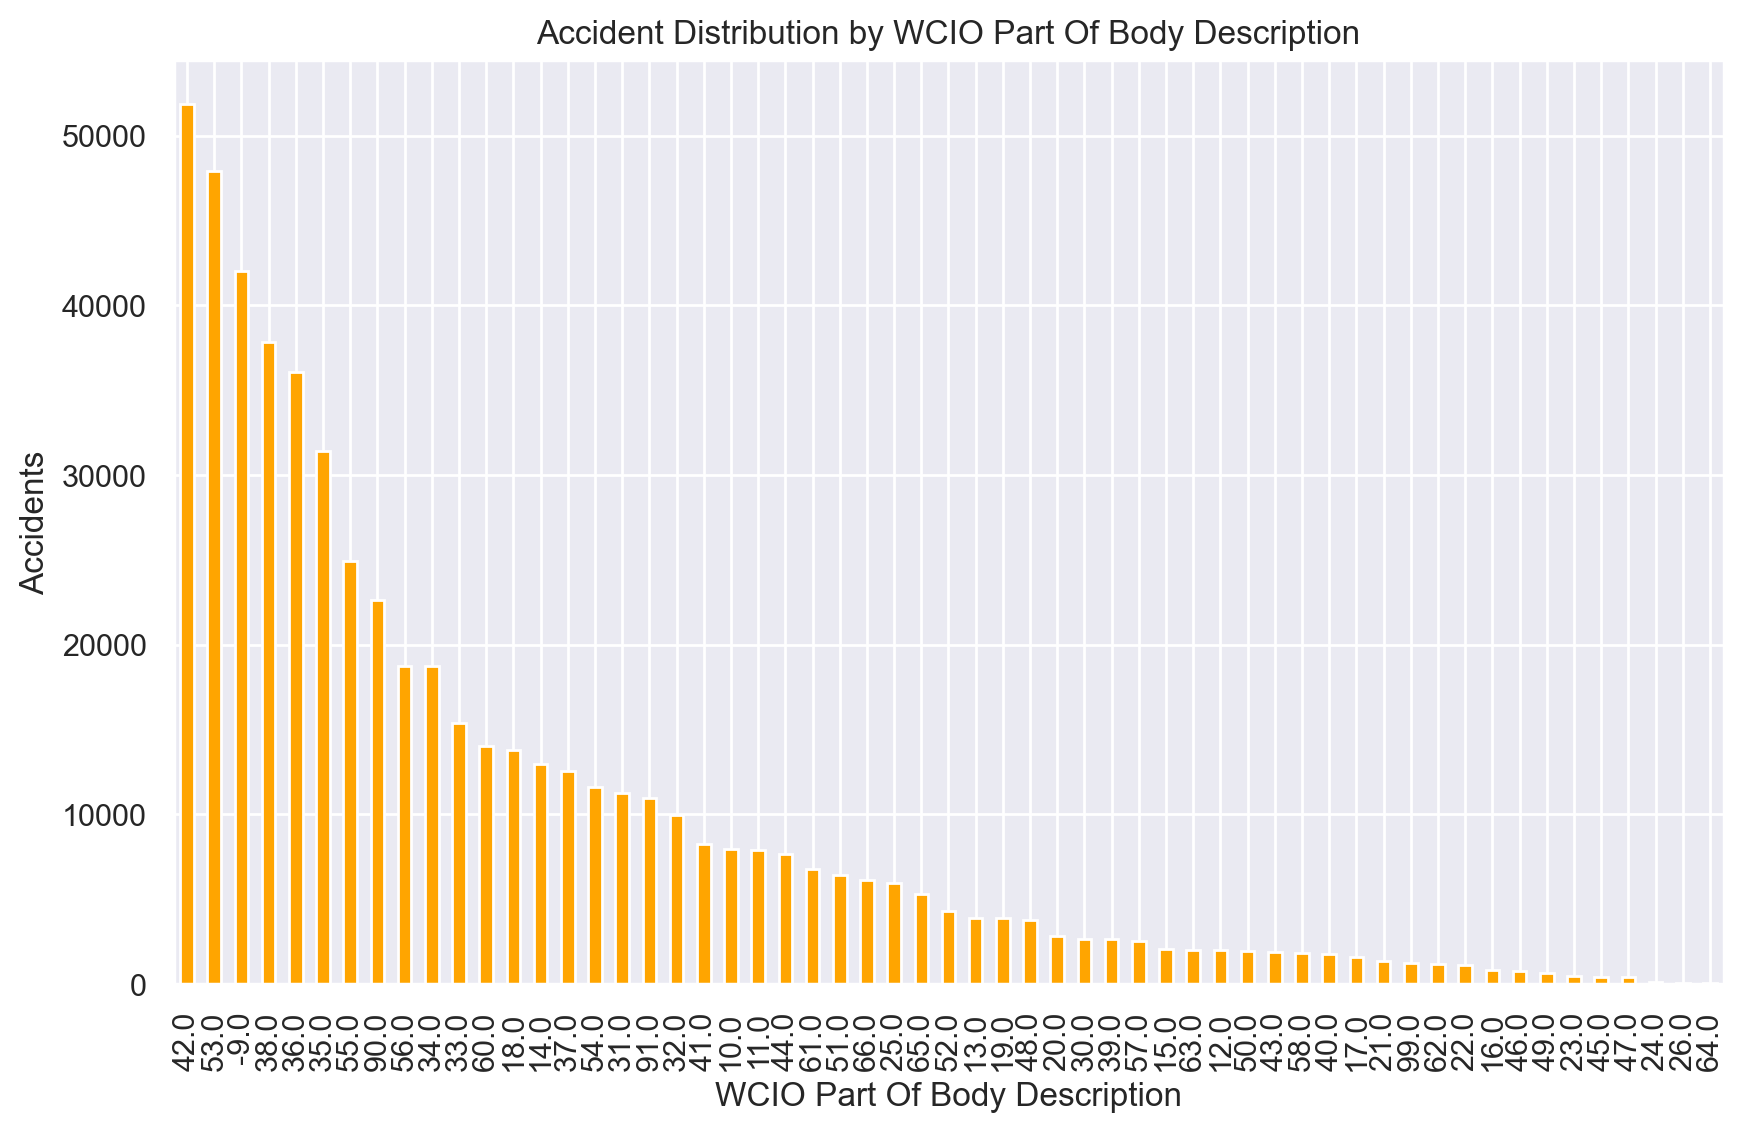

In [593]:
description_counts = df['WCIO Part Of Body Description'].value_counts() 
plt.figure(figsize=(10, 6))
codes_counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by WCIO Part Of Body Description')
plt.xlabel('WCIO Part Of Body Description')
plt.ylabel('Accidents')
plt.show()

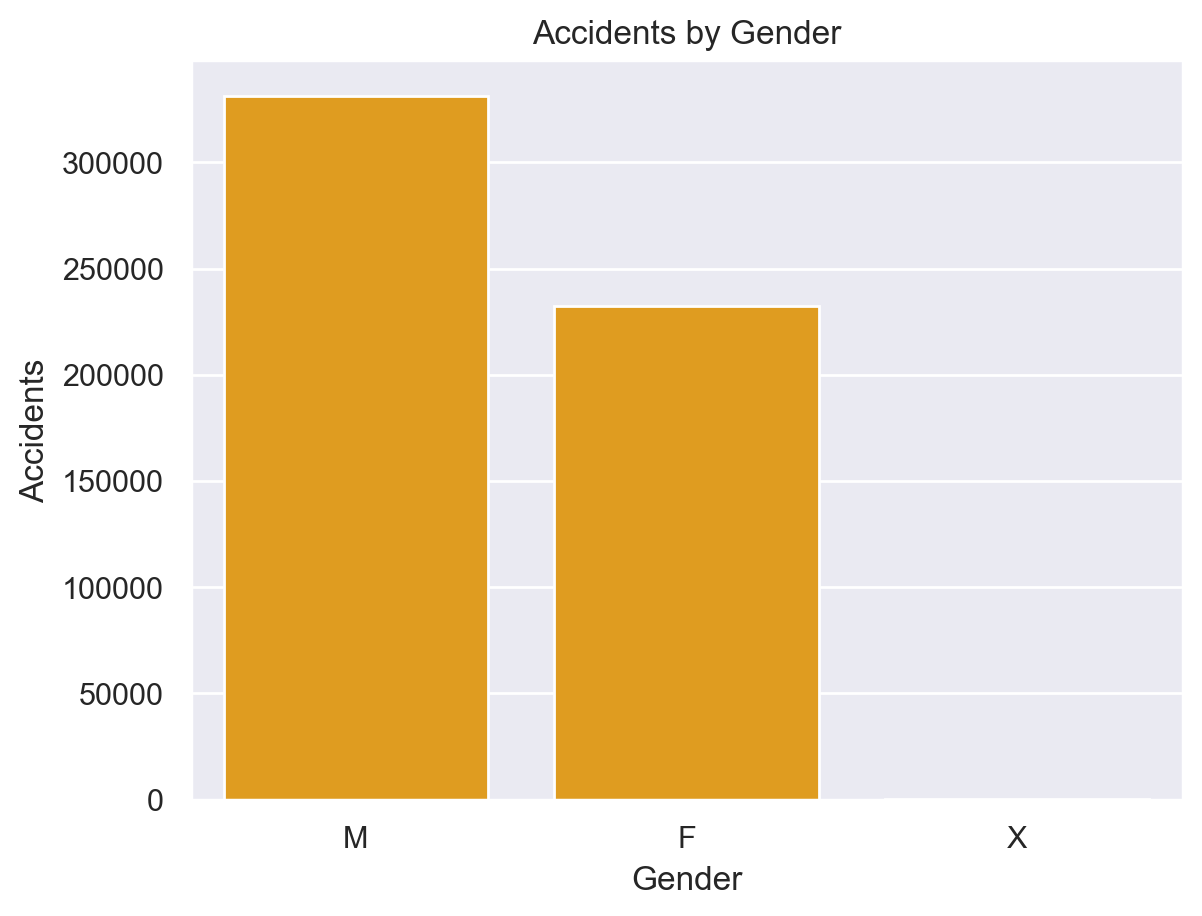

In [601]:
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, color='orange')
plt.title('Accidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Accidents')
plt.show()

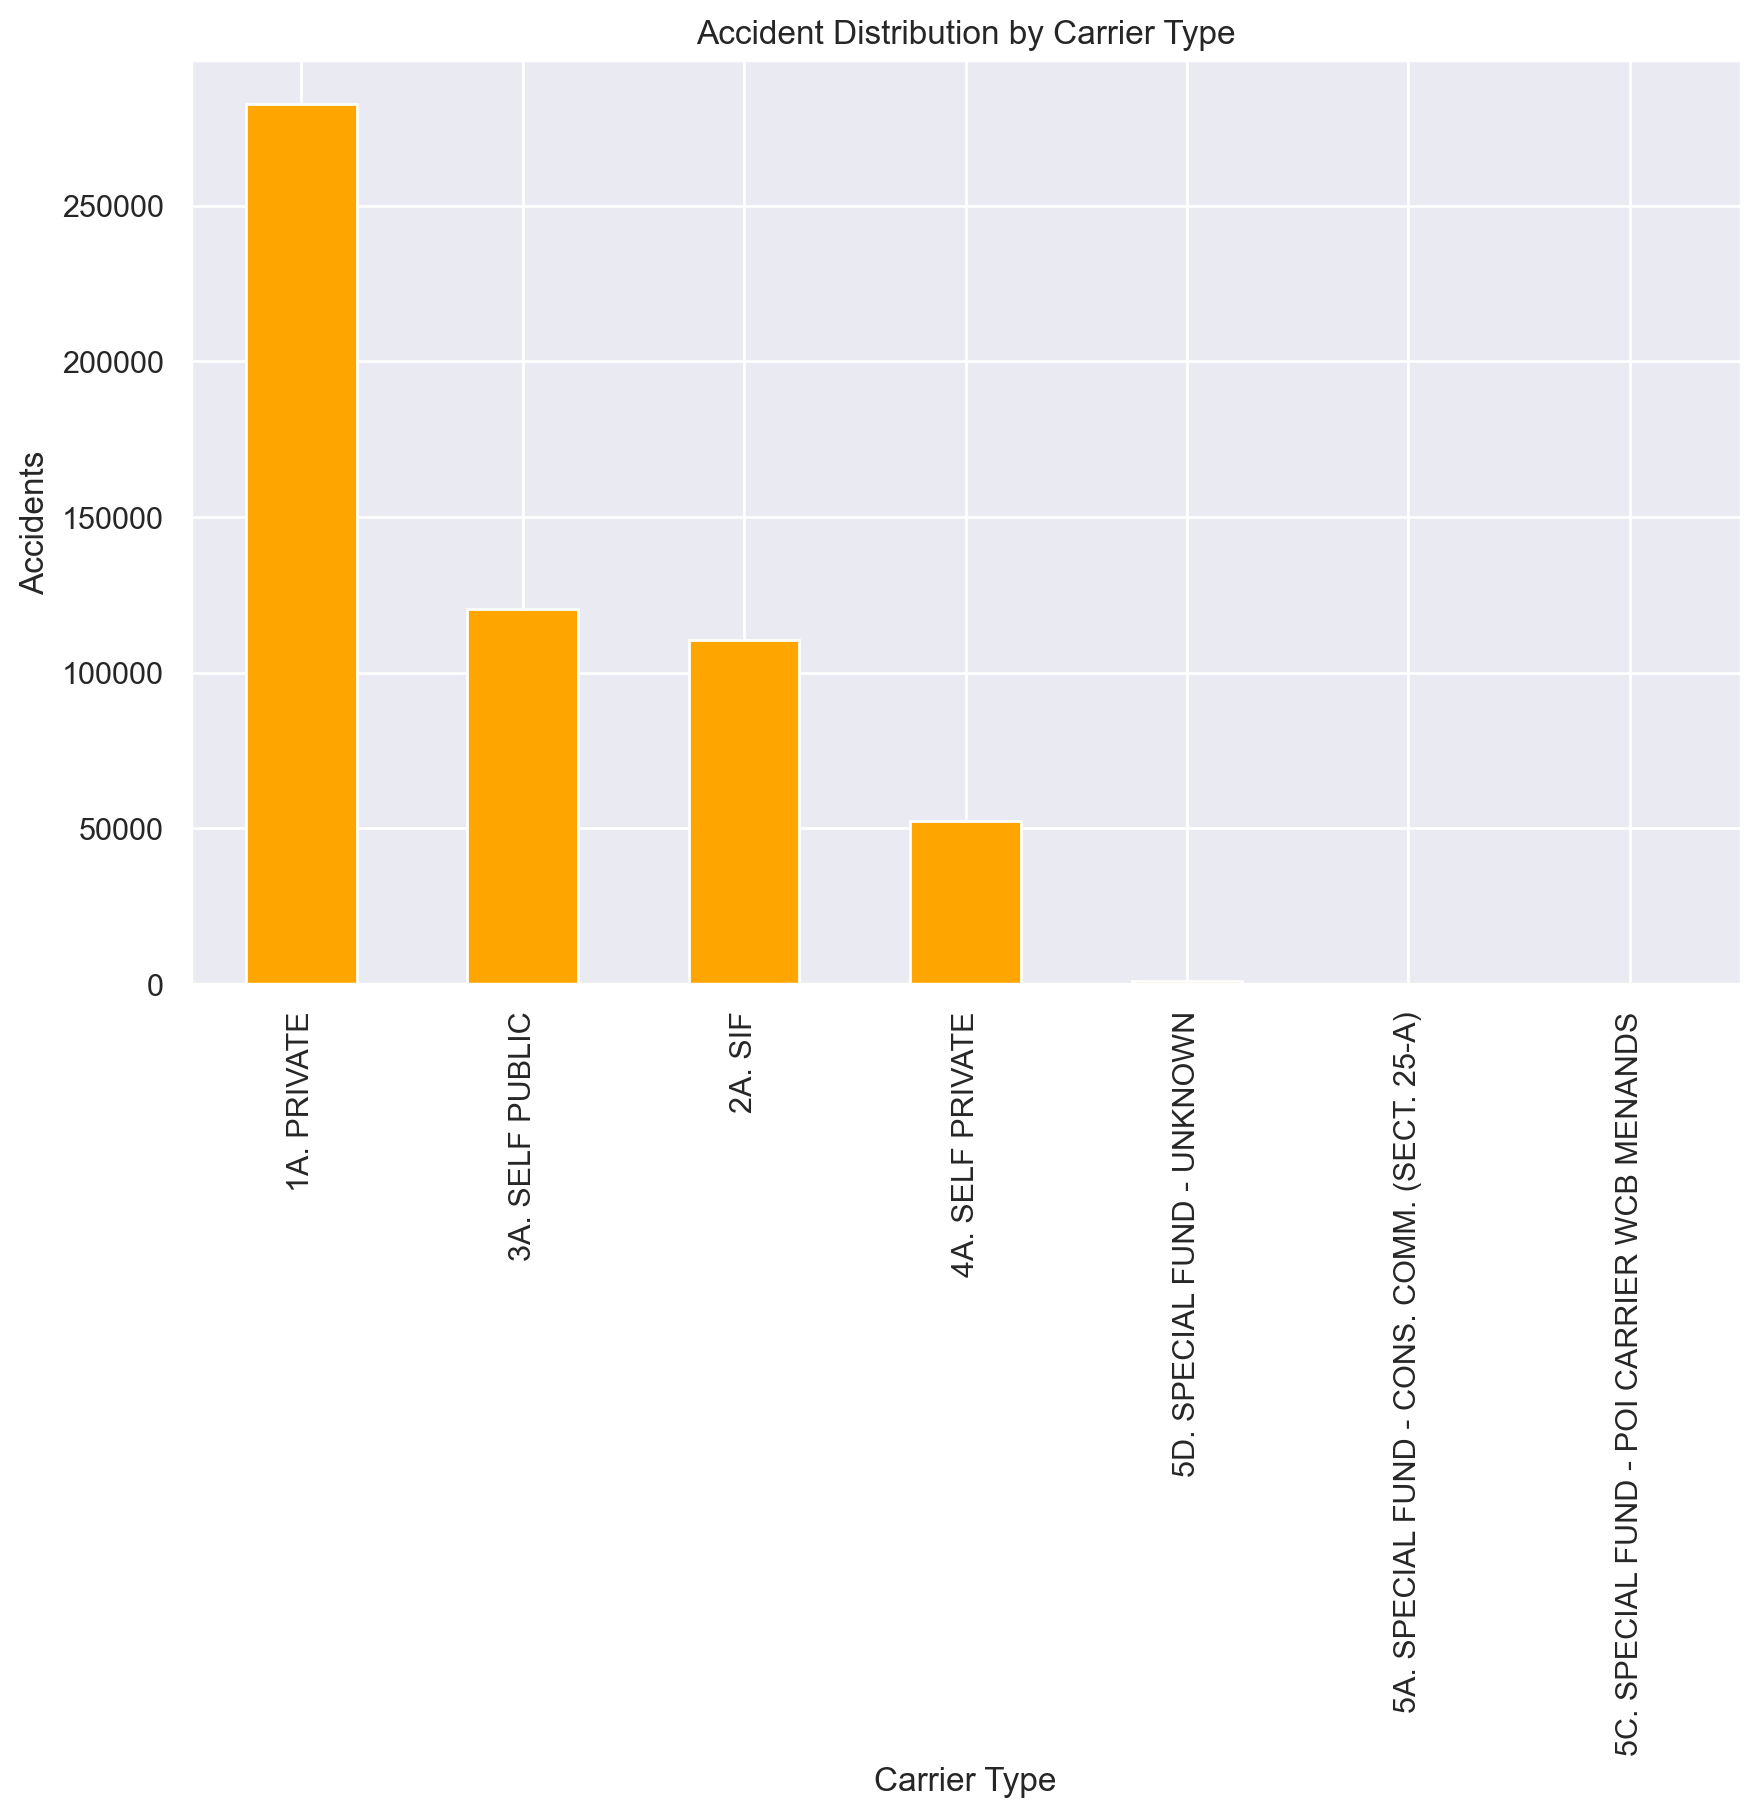

In [603]:
counts = df['Carrier Type'].value_counts() 
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by Carrier Type')
plt.xlabel('Carrier Type')
plt.ylabel('Accidents')
plt.show()

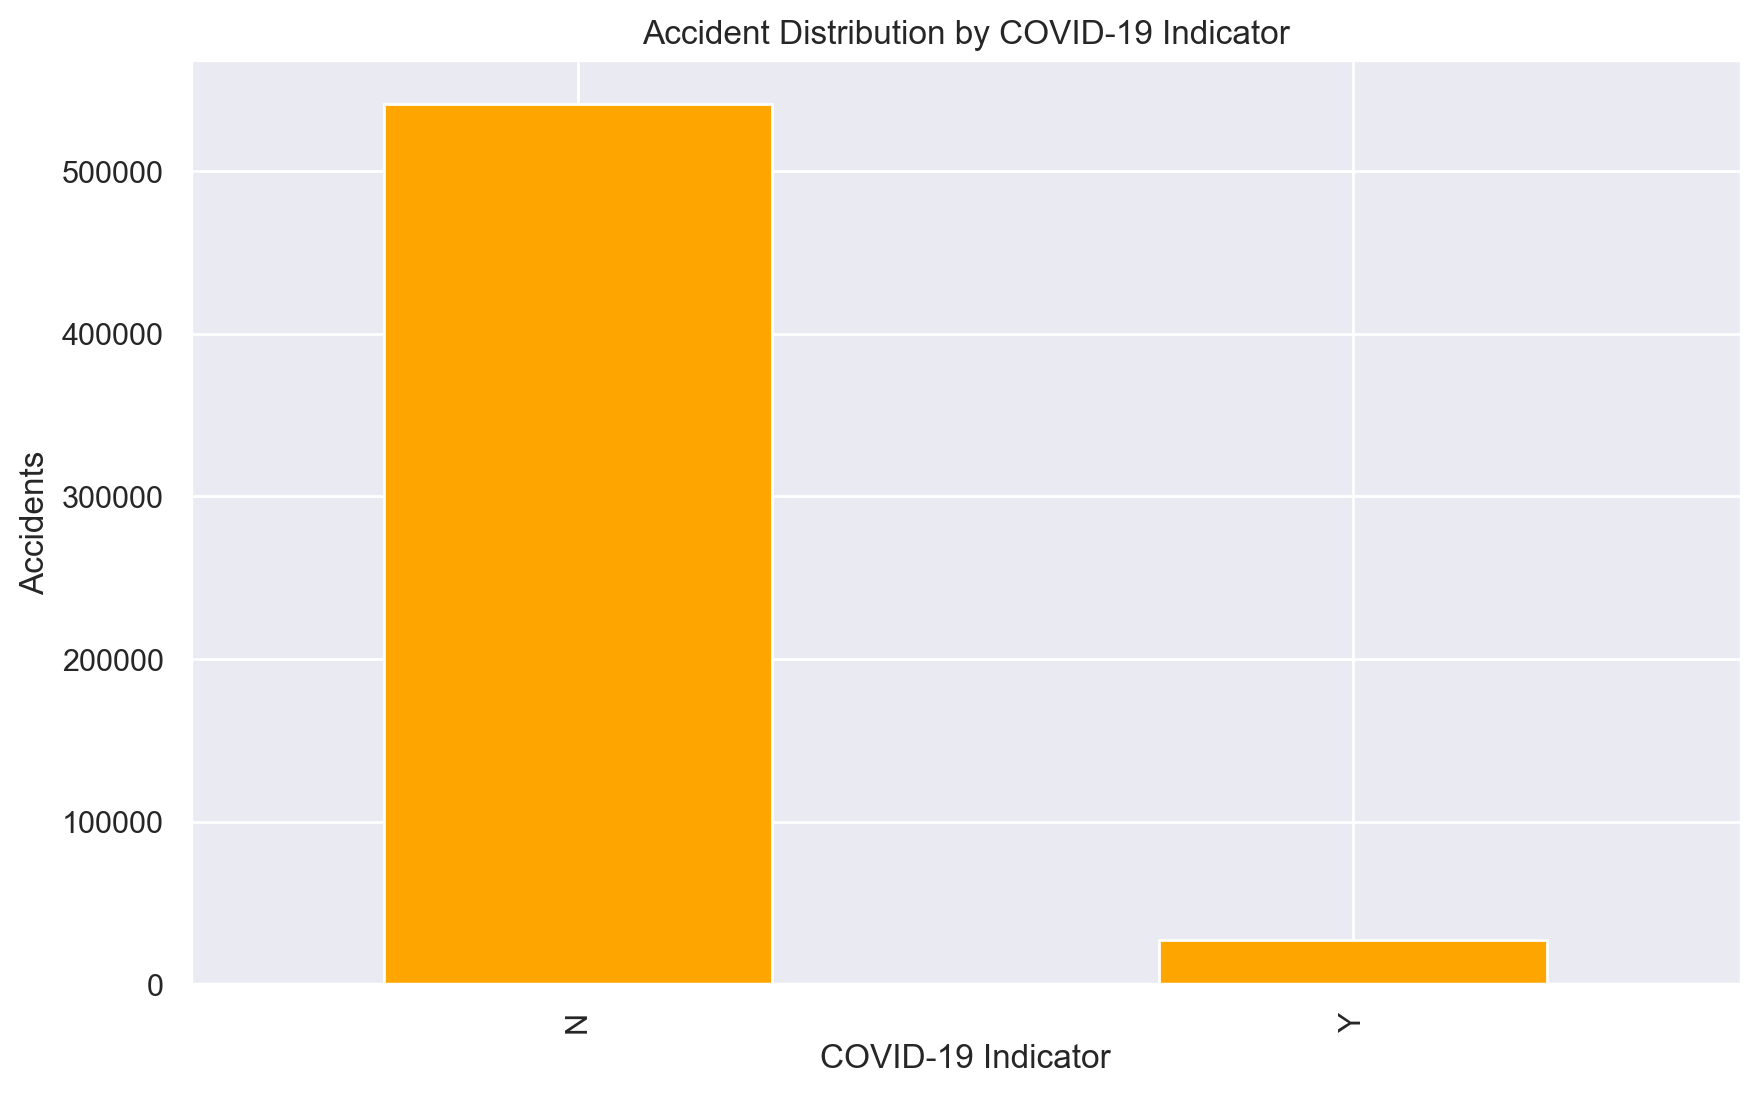

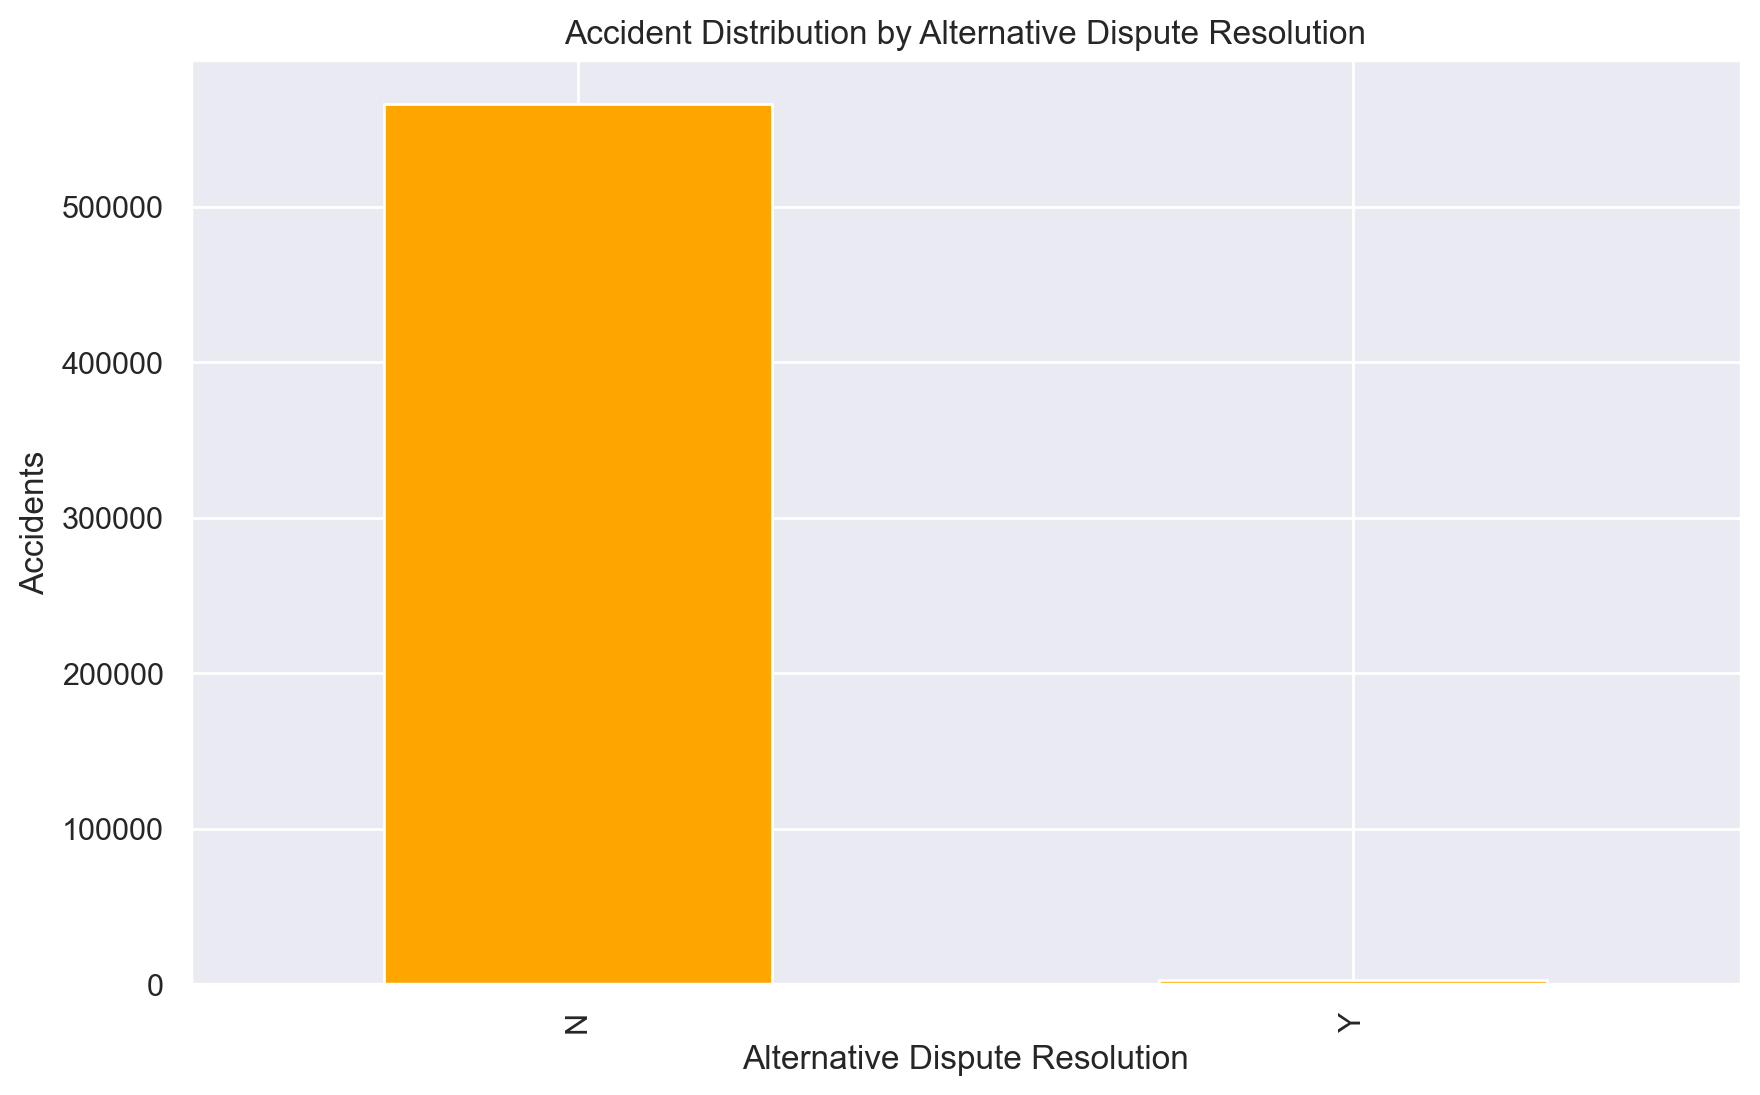

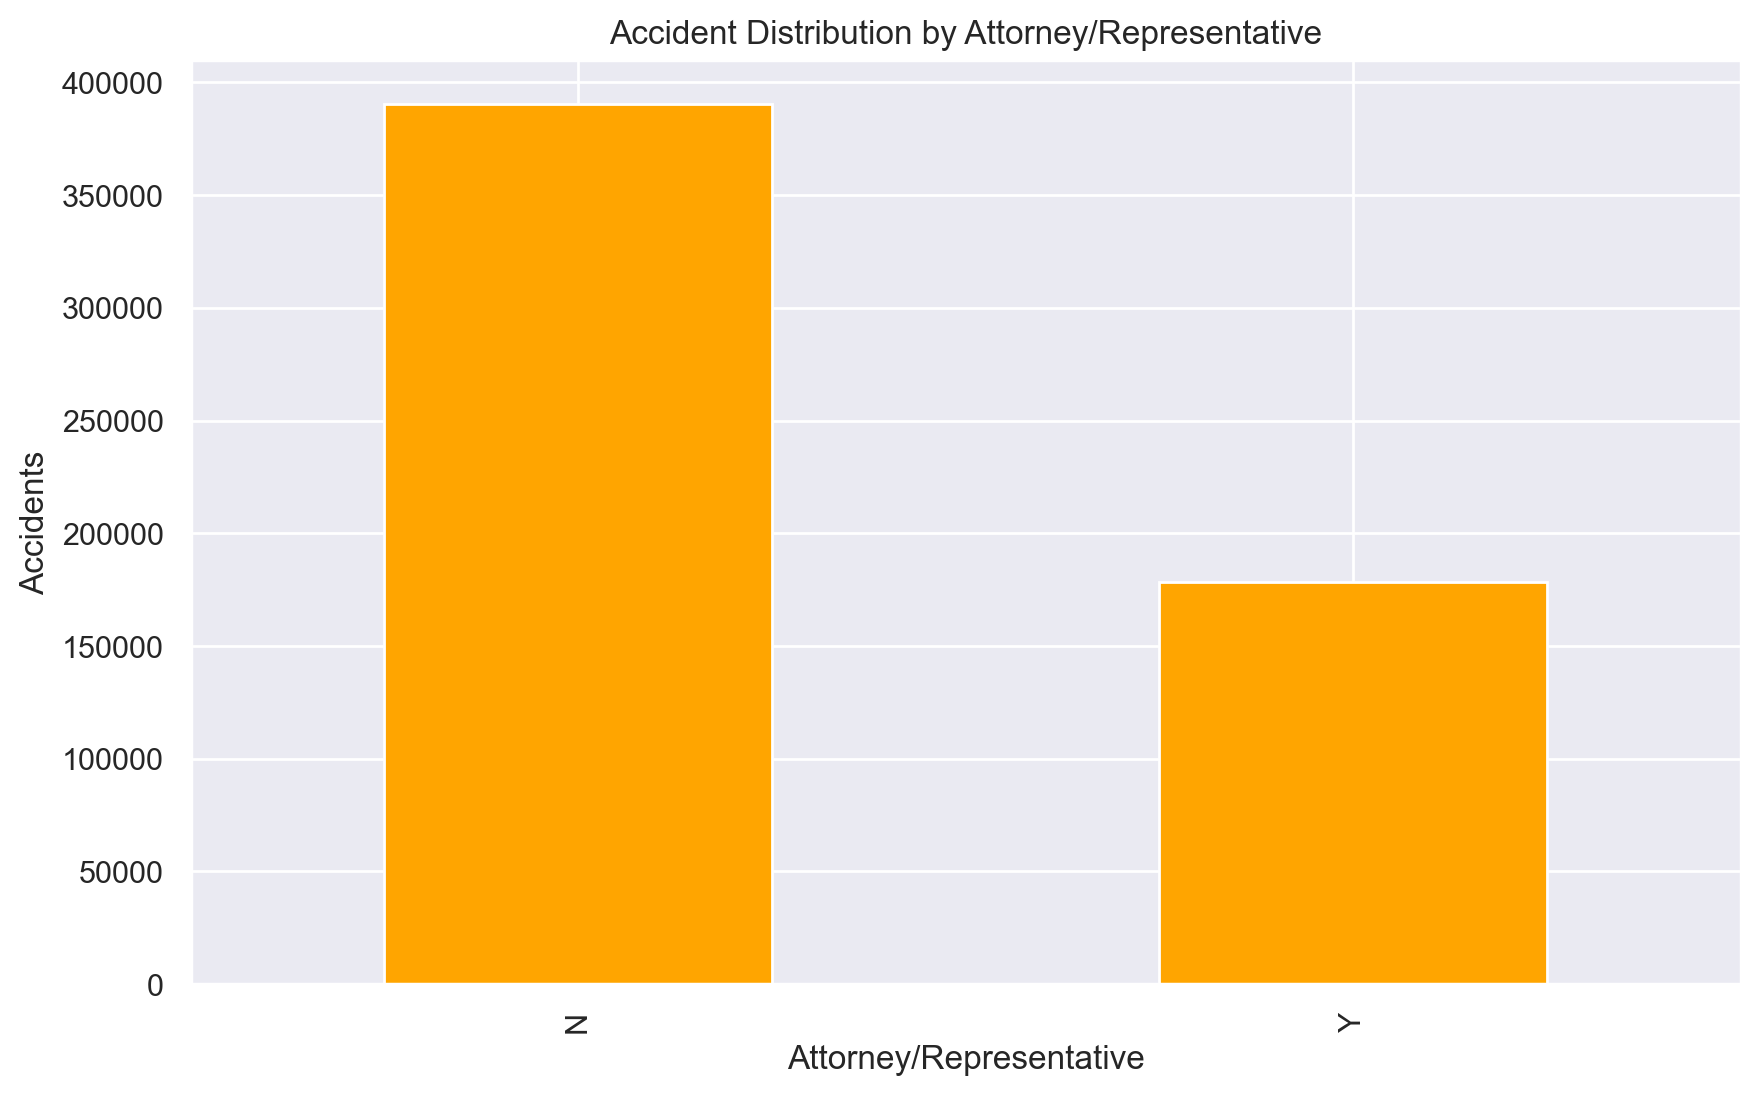

In [605]:
covid_counts = df['COVID-19 Indicator'].value_counts() 
plt.figure(figsize=(10, 6))
covid_counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by COVID-19 Indicator')
plt.xlabel('COVID-19 Indicator')
plt.ylabel('Accidents')
plt.show()

counts = df['Alternative Dispute Resolution'].value_counts() 
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by Alternative Dispute Resolution')
plt.xlabel('Alternative Dispute Resolution')
plt.ylabel('Accidents')
plt.show()

counts = df['Attorney/Representative'].value_counts() 
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by Attorney/Representative')
plt.xlabel('Attorney/Representative')
plt.ylabel('Accidents')
plt.show()

#### Datatime Columns

In [667]:
#convert the accident date to the type of datatime to get all the values of this variable
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], errors='coerce')
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'])


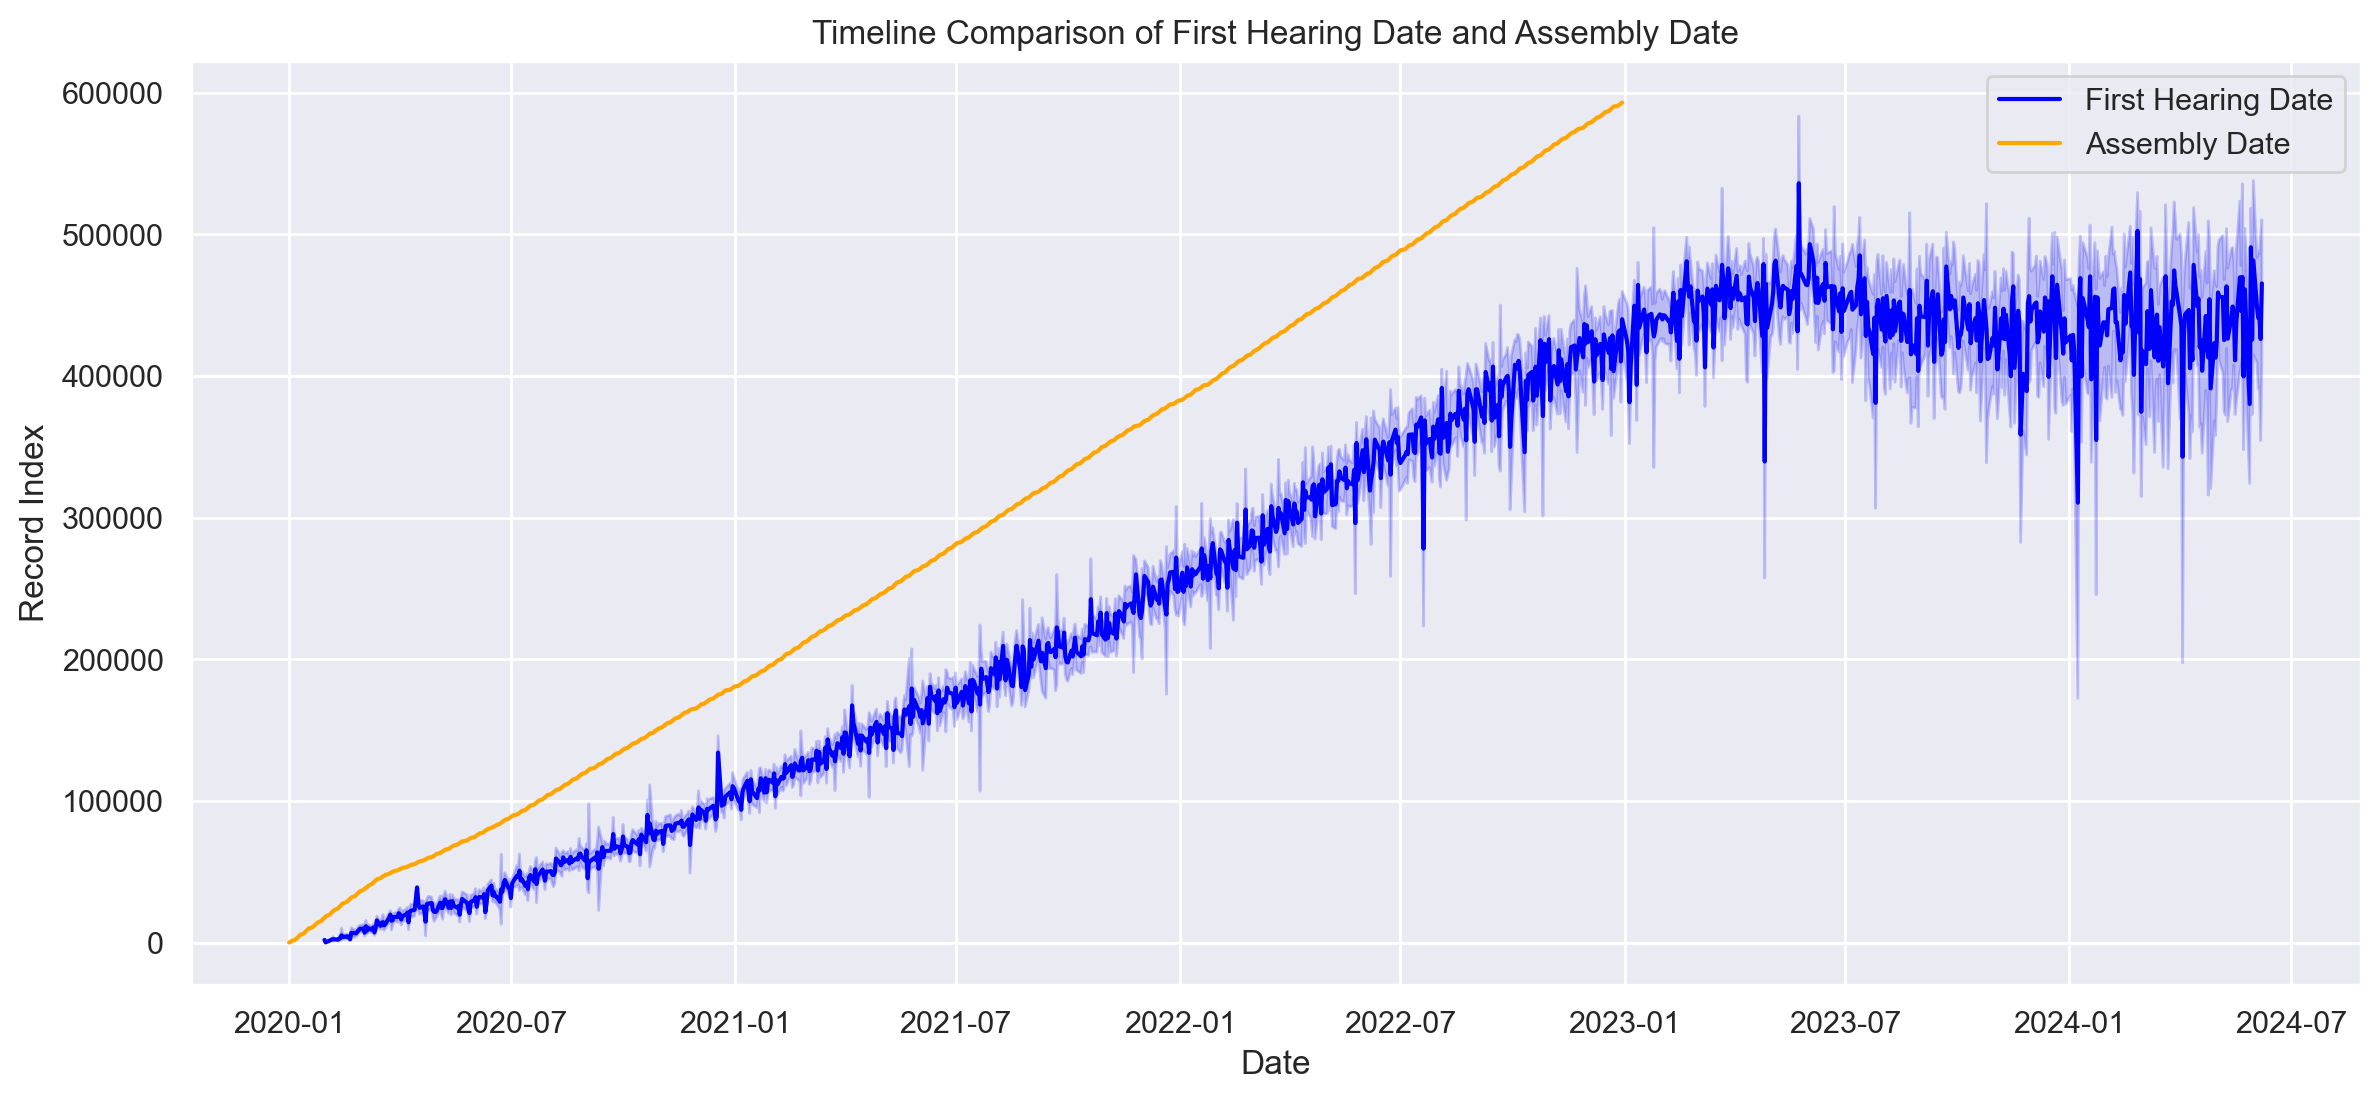

In [144]:
# Plot a line plot with date ordering
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='First Hearing Date', y=df.index, label='First Hearing Date', color='darkorange')
sns.lineplot(data=df, x='Assembly Date', y=df.index, label='Assembly Date', color='orange')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Record Index')
plt.title('Timeline Comparison of First Hearing Date and Assembly Date')
plt.show()


Correlation coefficient: 0.8530678290513207


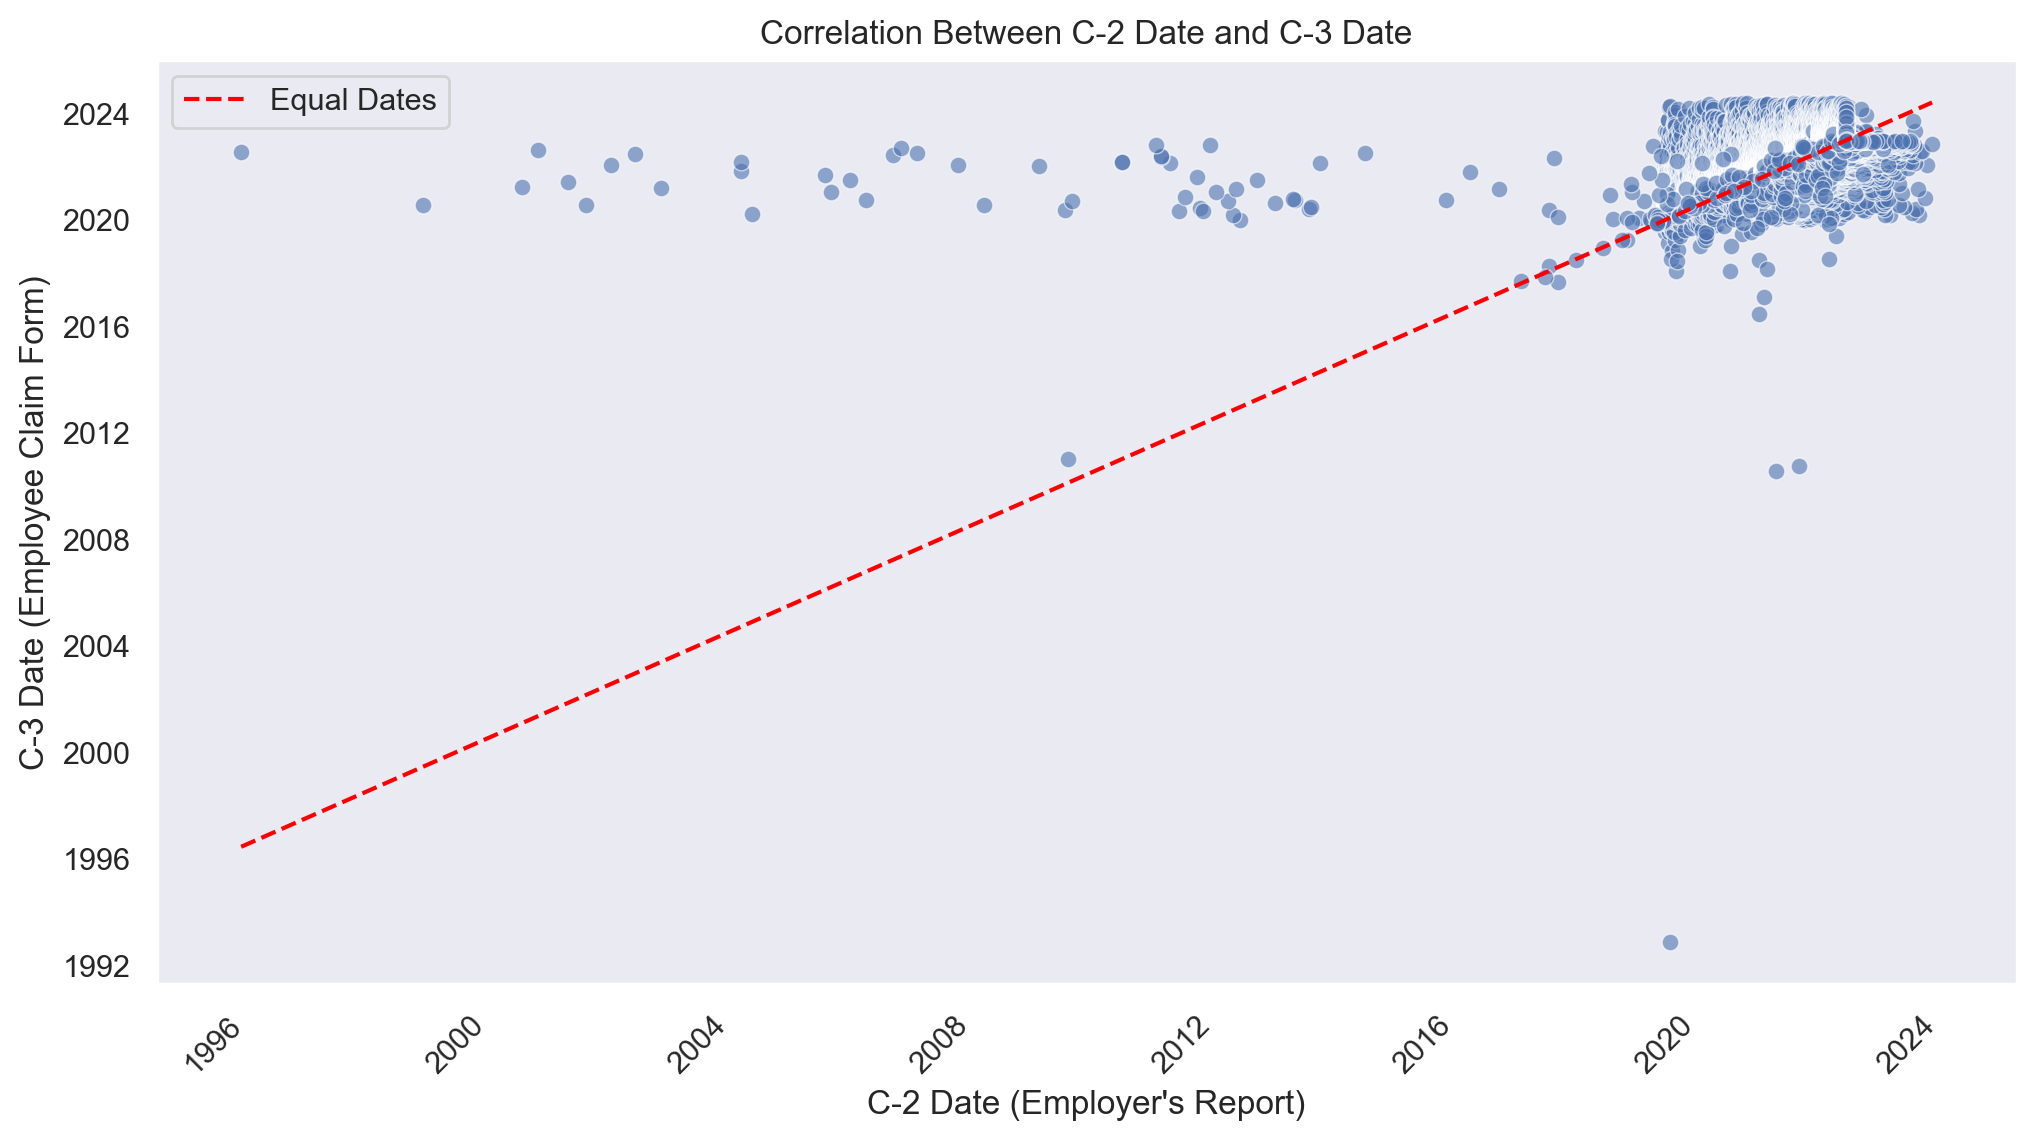

In [152]:


df_dates = df.dropna(subset=['C-2 Date', 'C-3 Date'])

# Calcular o coeficiente de correlação
correlation = df_dates['C-2 Date'].view('int64').corr(df_dates['C-3 Date'].view('int64'))
print(f'Correlation coefficient: {correlation}')

# Gráfico de Dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='C-2 Date', y='C-3 Date', alpha=0.6)

# Adicionar linha de referência
min_date = df['C-2 Date'].min()
max_date = df['C-2 Date'].max()
plt.plot([min_date, max_date], [min_date, max_date], color='orange', linestyle='--', label='Equal Dates')

# Adicionar título e rótulos
plt.title('Correlation Between C-2 Date and C-3 Date')
plt.xlabel('C-2 Date (Employer\'s Report)')
plt.ylabel('C-3 Date (Employee Claim Form)')
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend()
plt.grid()
plt.show()


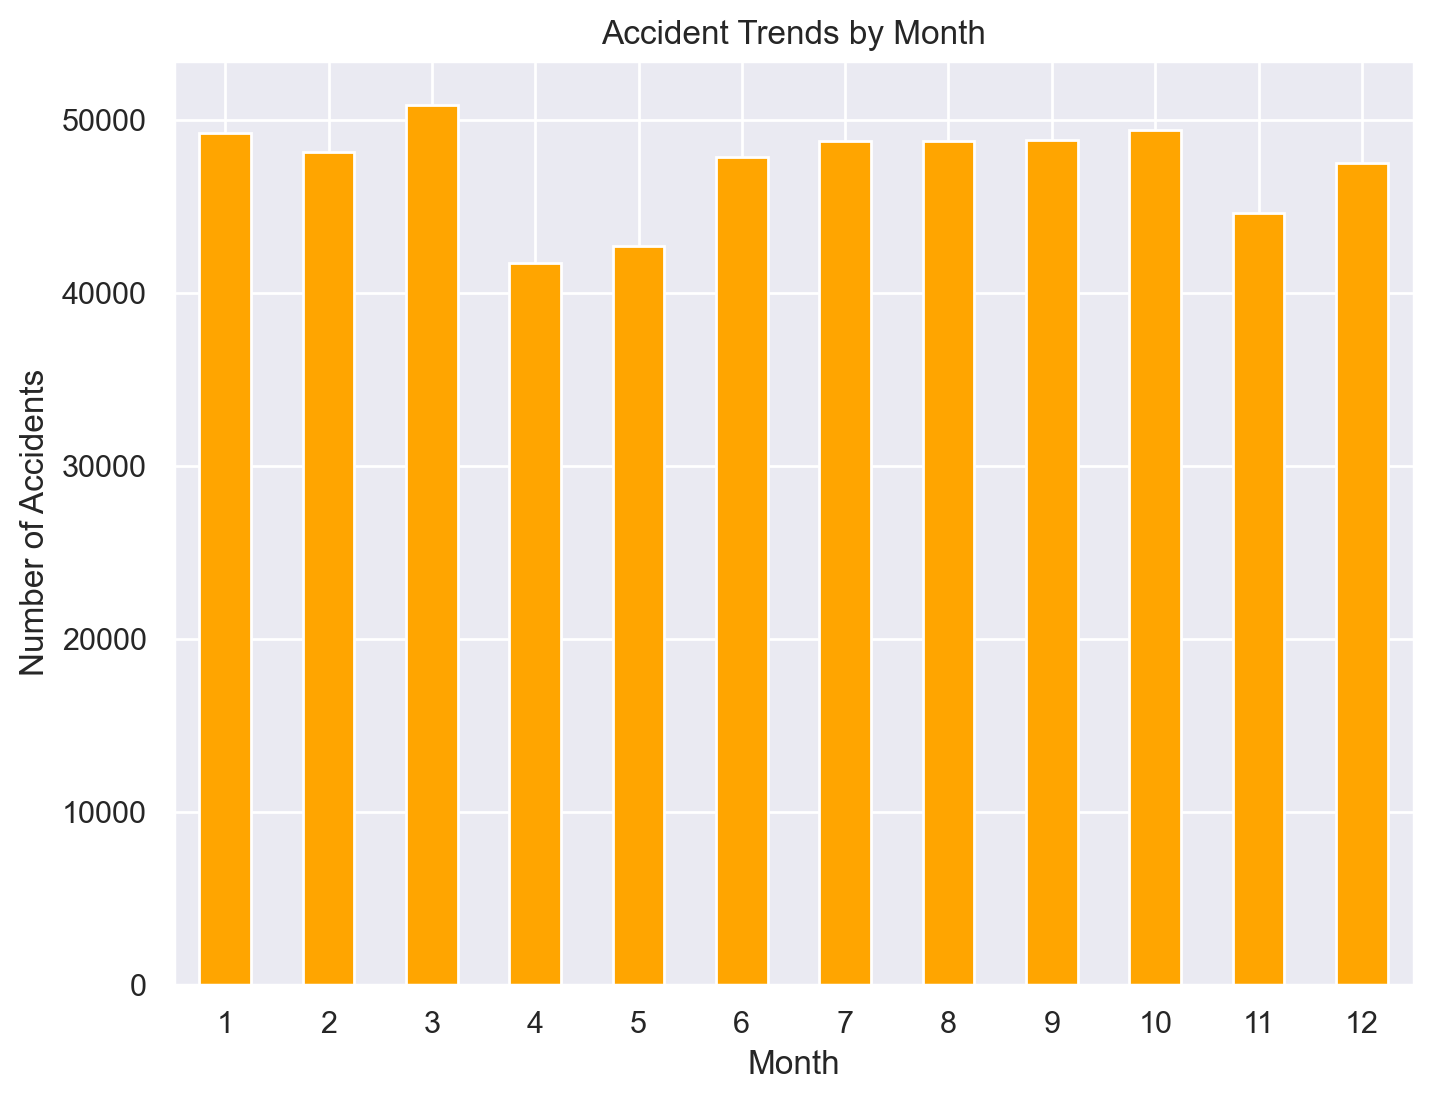

In [669]:
# First, we need to extract the month from the 'Accident Date' to analyze the trends by month.
df['Accident Month'] = df['Accident Date'].dt.month

# Plotting the number of accidents per month
plt.figure(figsize=(8, 6))
df['Accident Month'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Accident Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

plt.show()

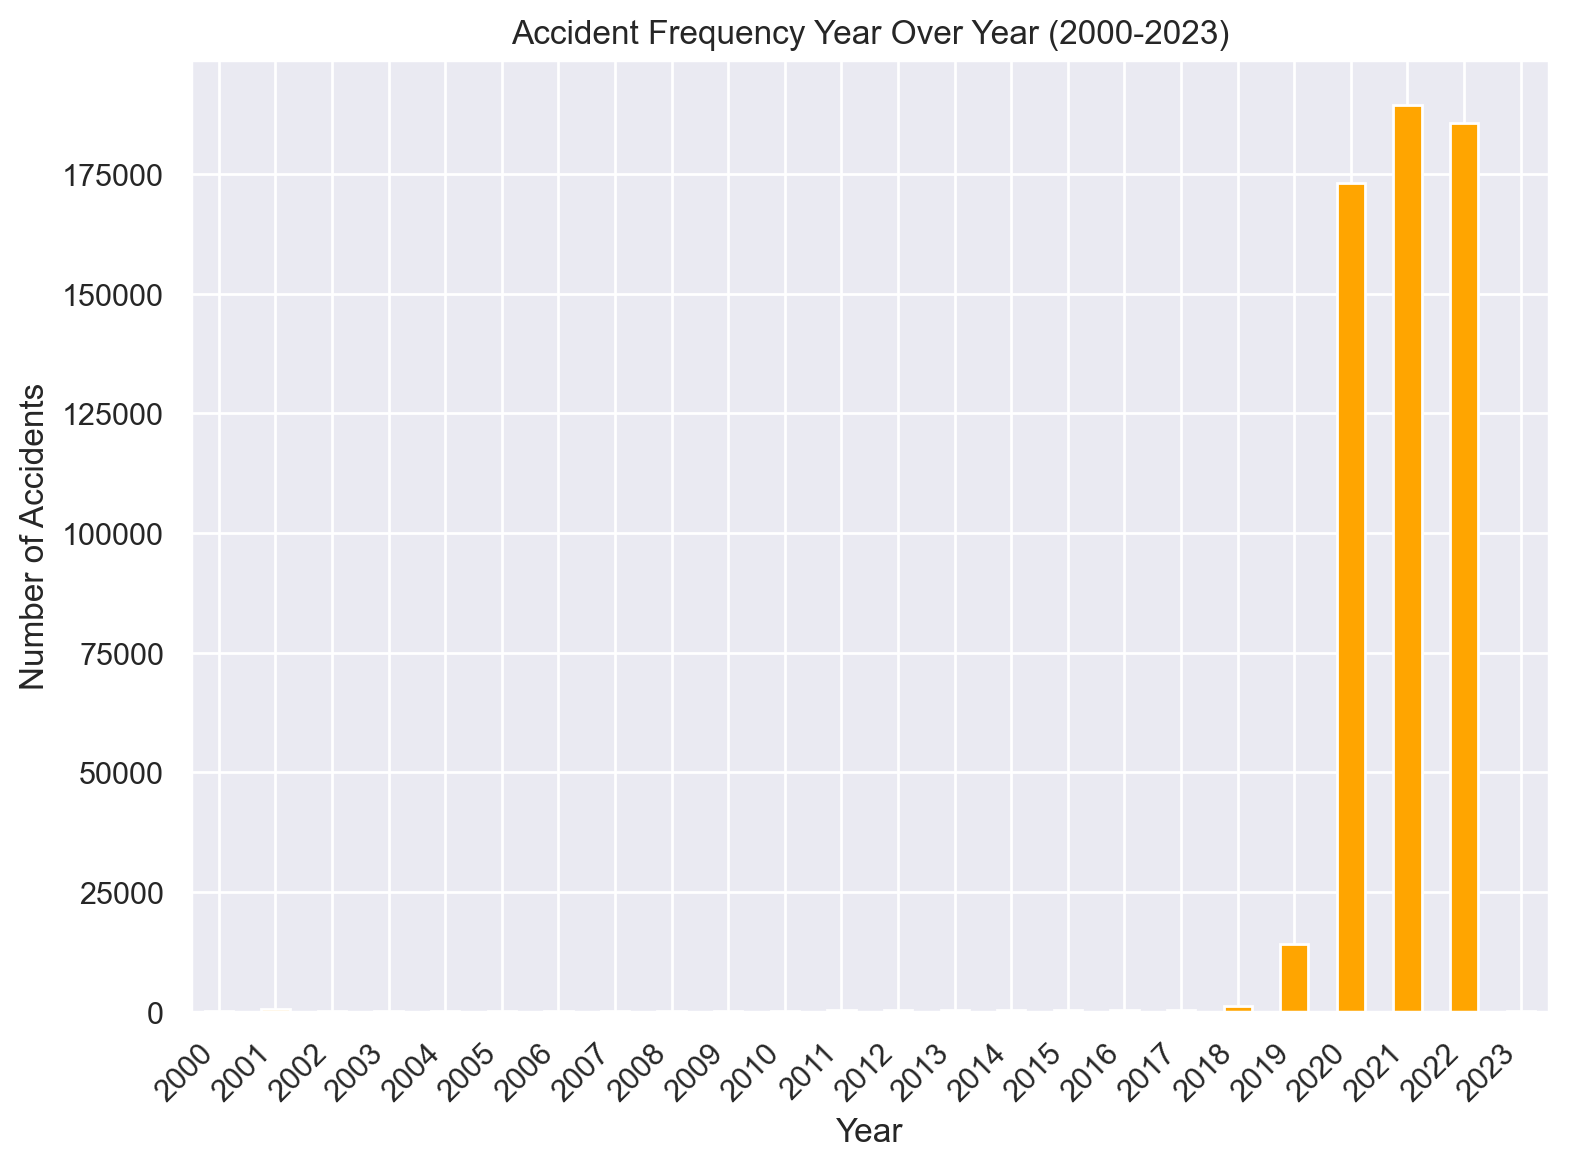

In [671]:
# Convert 'Accident Date' to datetime format and extract the year
df['Accident Year'] = df['Accident Date'].dt.year

# Filter for a reasonable year range (e.g., 2000 to 2023)
filtered_df = df[(df['Accident Year'] >= 2000) & (df['Accident Year'] <= 2023)]

# Plotting the number of accidents per year within this range
plt.figure(figsize=(8, 6))
filtered_df['Accident Year'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Accident Frequency Year Over Year (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

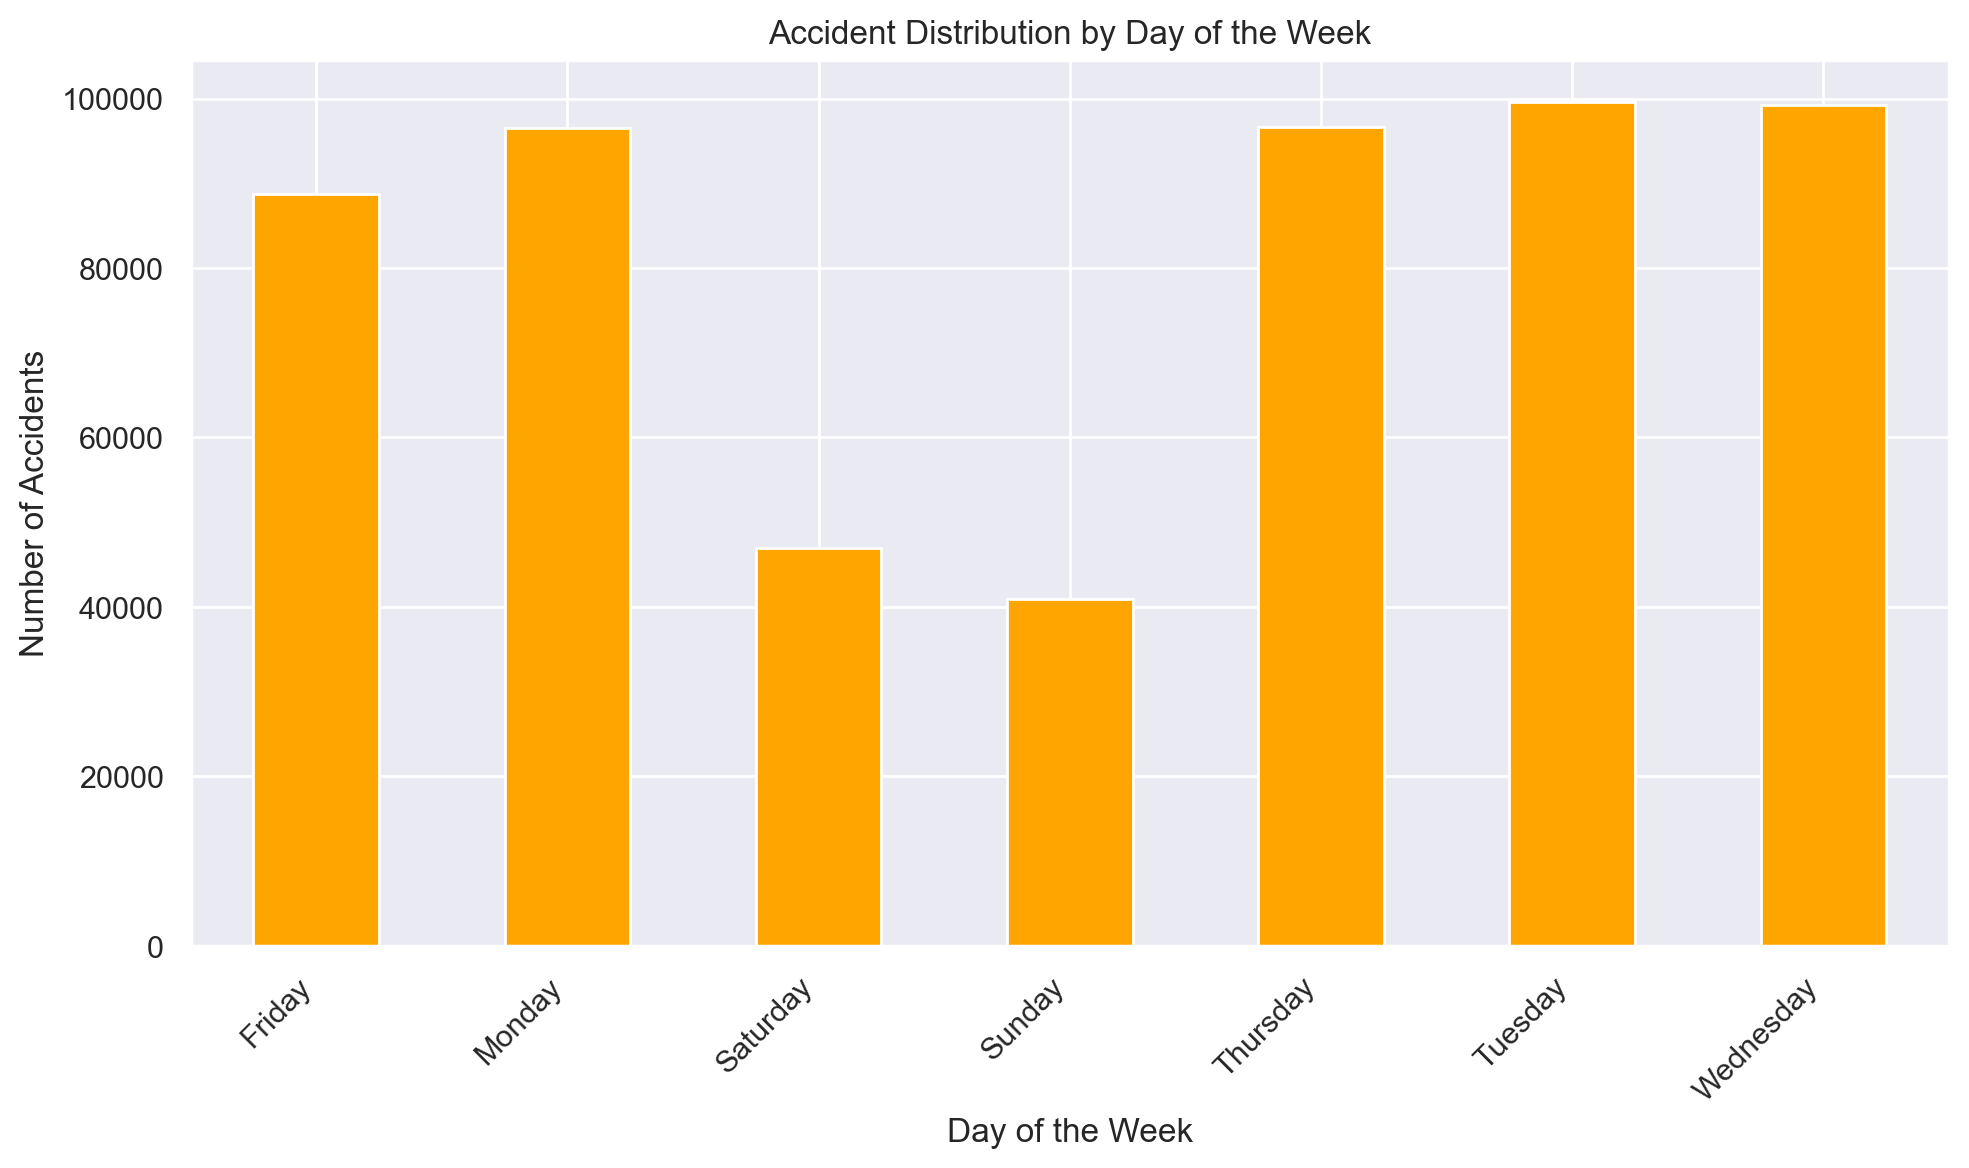

In [673]:
# Example: Analyze accidents by day of the week (without focusing on hour)
df['Accident Weekday'] = df['Accident Date'].dt.weekday

# Mapping weekdays to their names
weekdays_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Accident Weekday'] = df['Accident Weekday'].map(weekdays_map)

# Plotting the distribution of accidents by day of the week
plt.figure(figsize=(10, 6))
df['Accident Weekday'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Accident Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

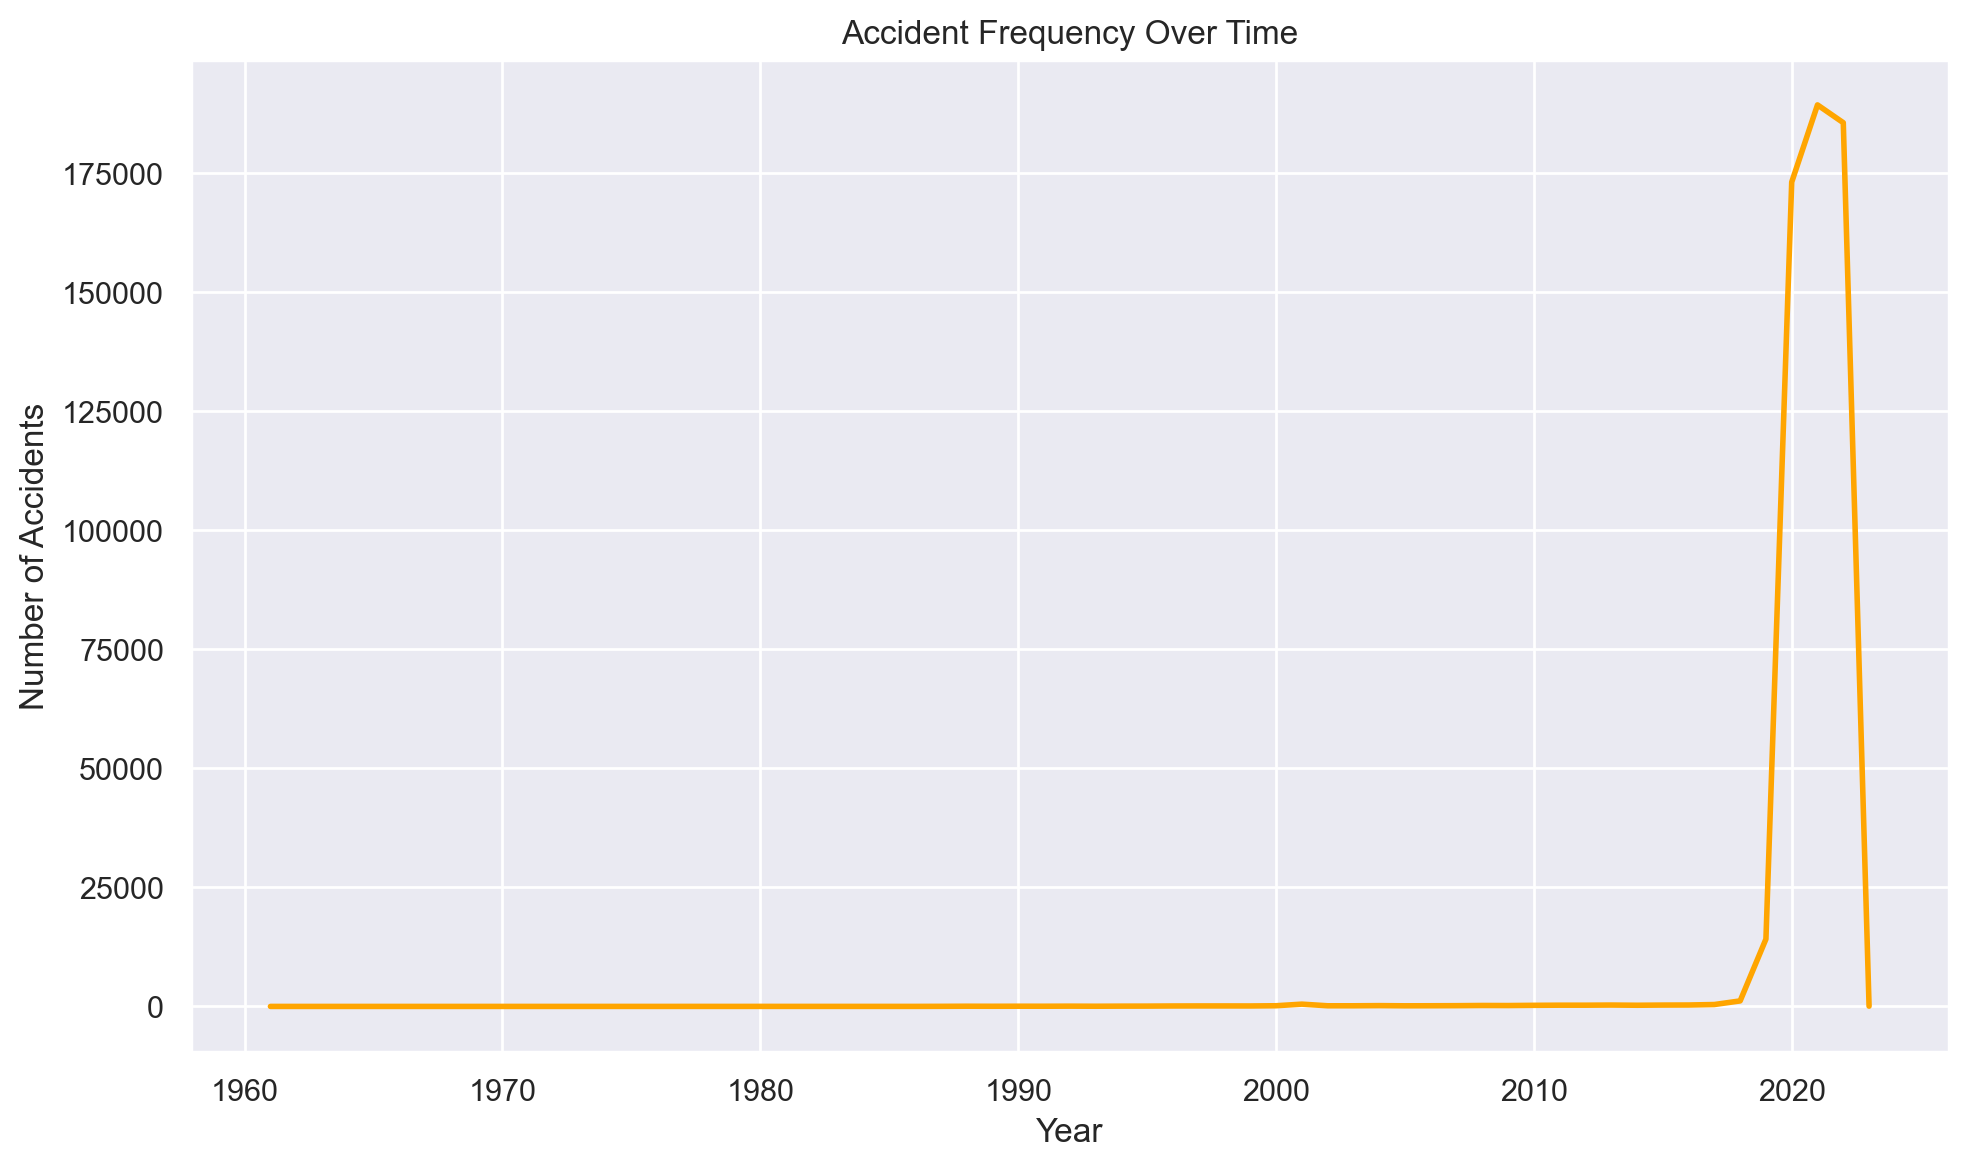

In [675]:
# Extracting year from 'Accident Date' and plotting accident frequency by year
plt.figure(figsize=(10, 6))
df['Accident Year'].value_counts().sort_index().plot(kind='line', color='orange', linewidth=2)
plt.title('Accident Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### Columns Targets

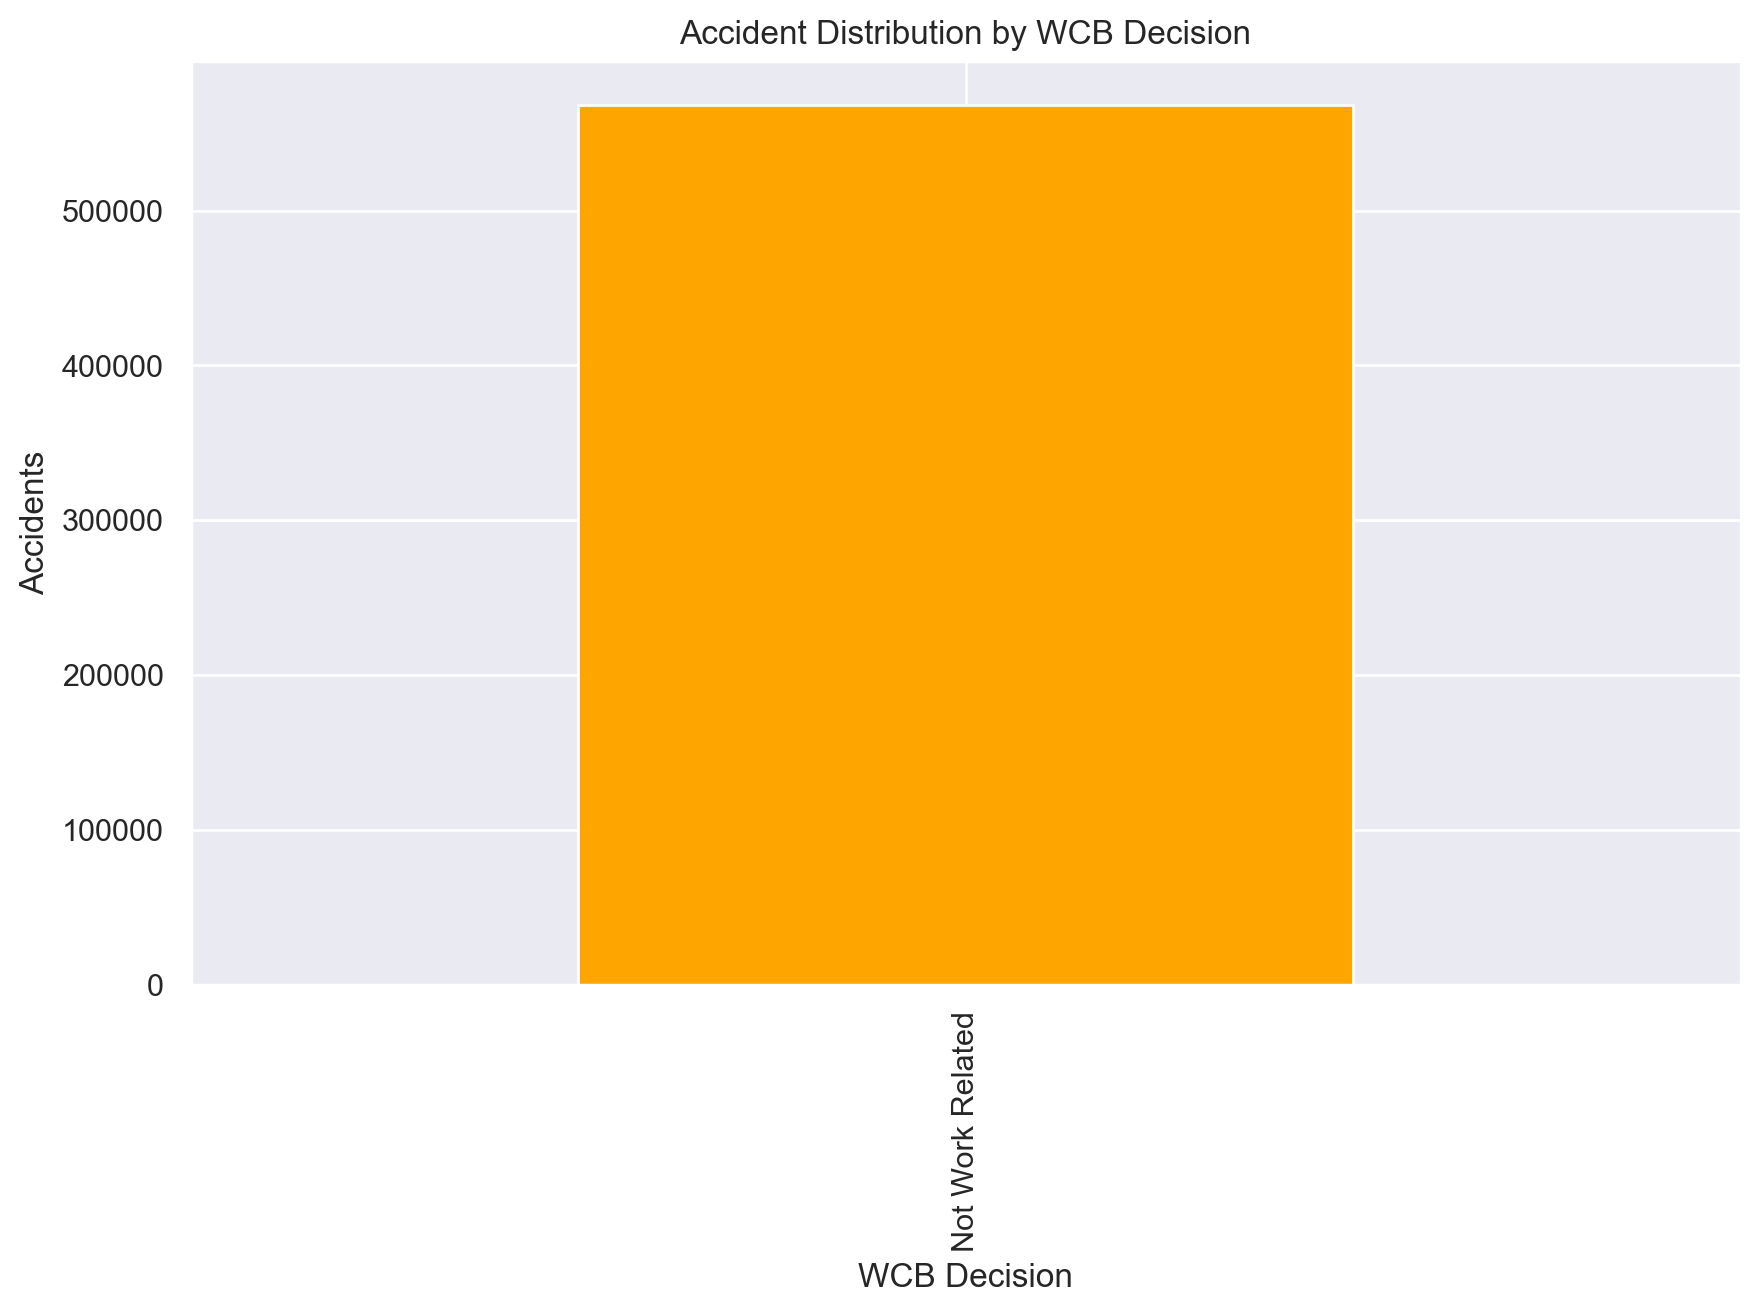

In [628]:
counts = df['WCB Decision'].value_counts() 
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by WCB Decision')
plt.xlabel('WCB Decision')
plt.ylabel('Accidents')
plt.show()

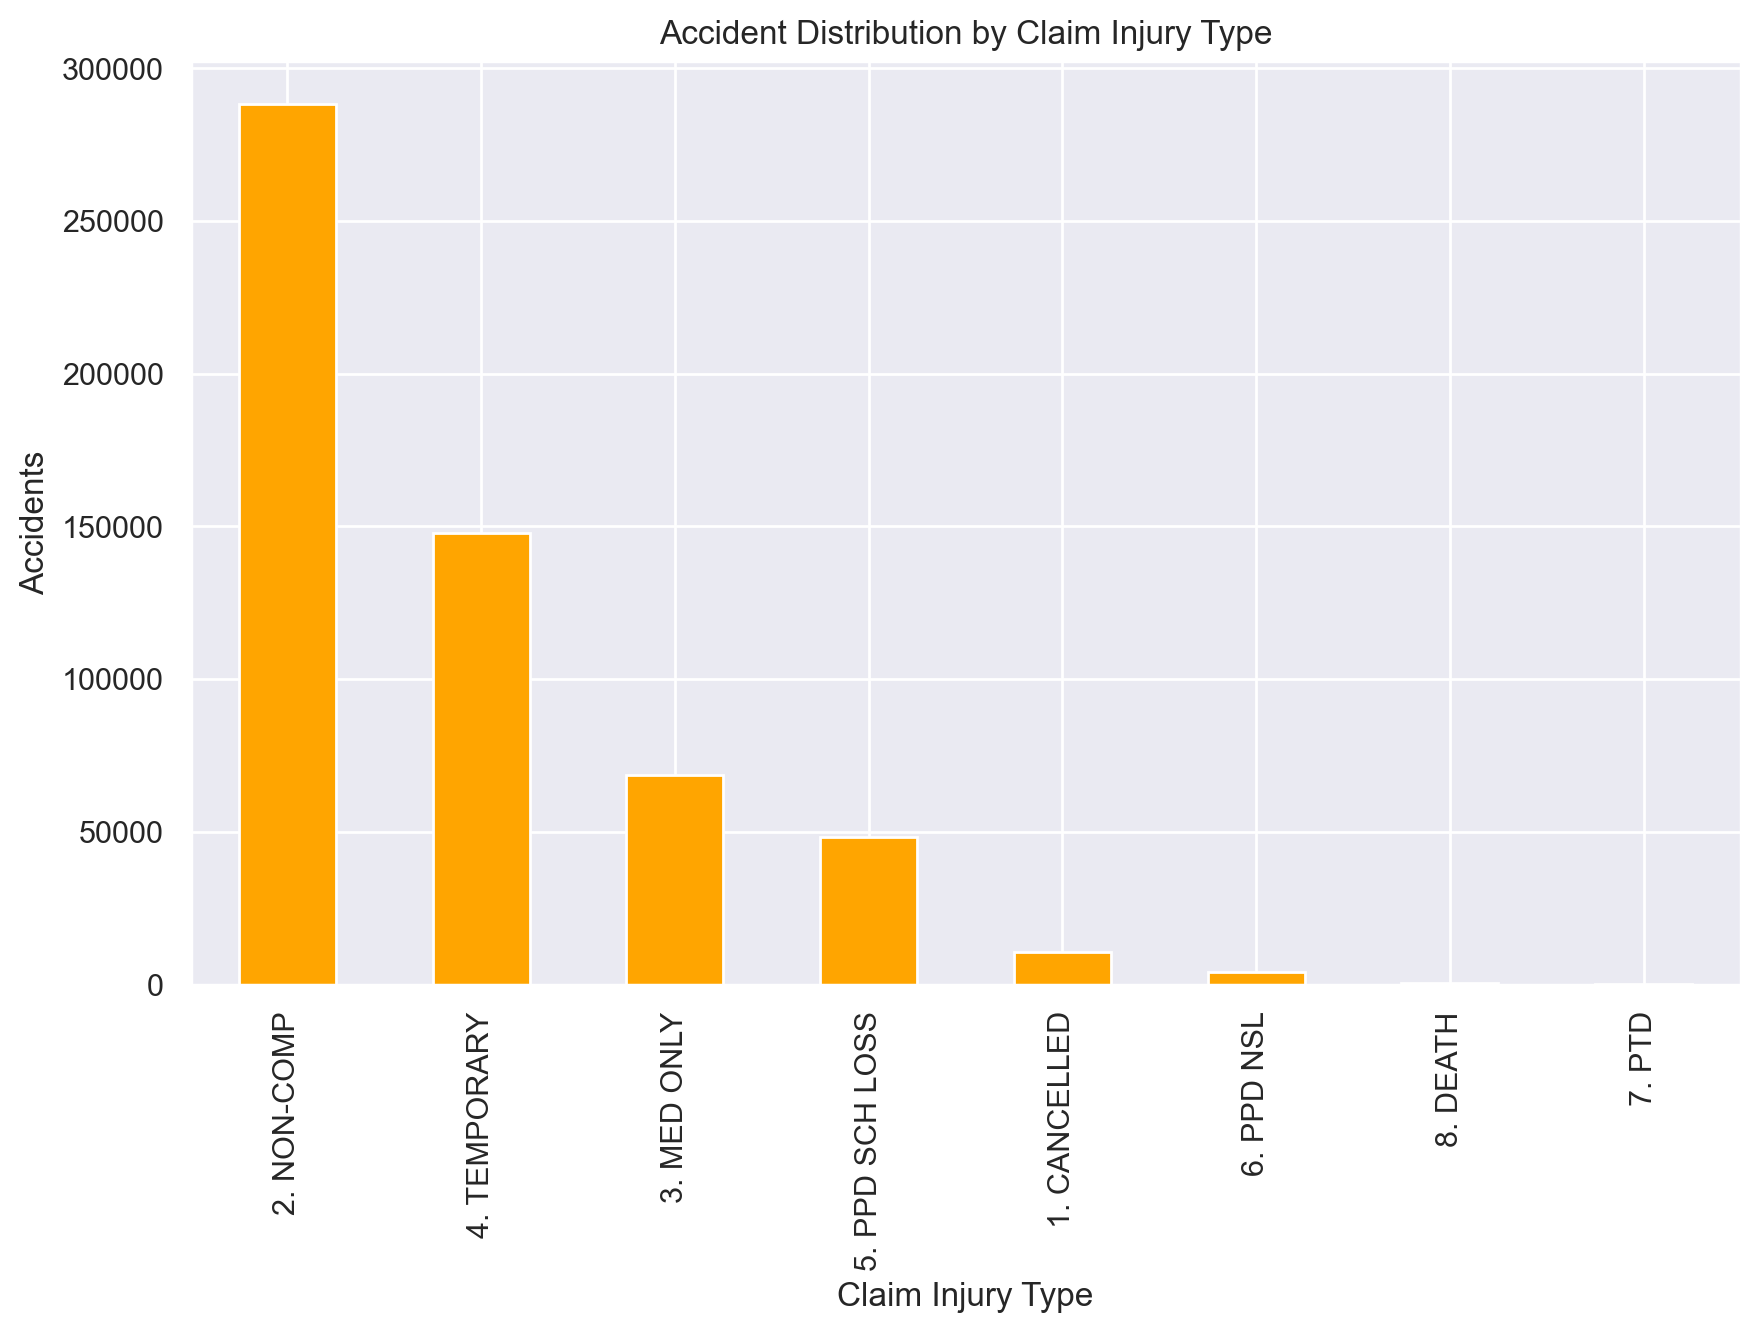

In [630]:
counts = df['Claim Injury Type'].value_counts() 
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='orange')
plt.title('Accident Distribution by Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Accidents')
plt.show()

### Other Visualizations

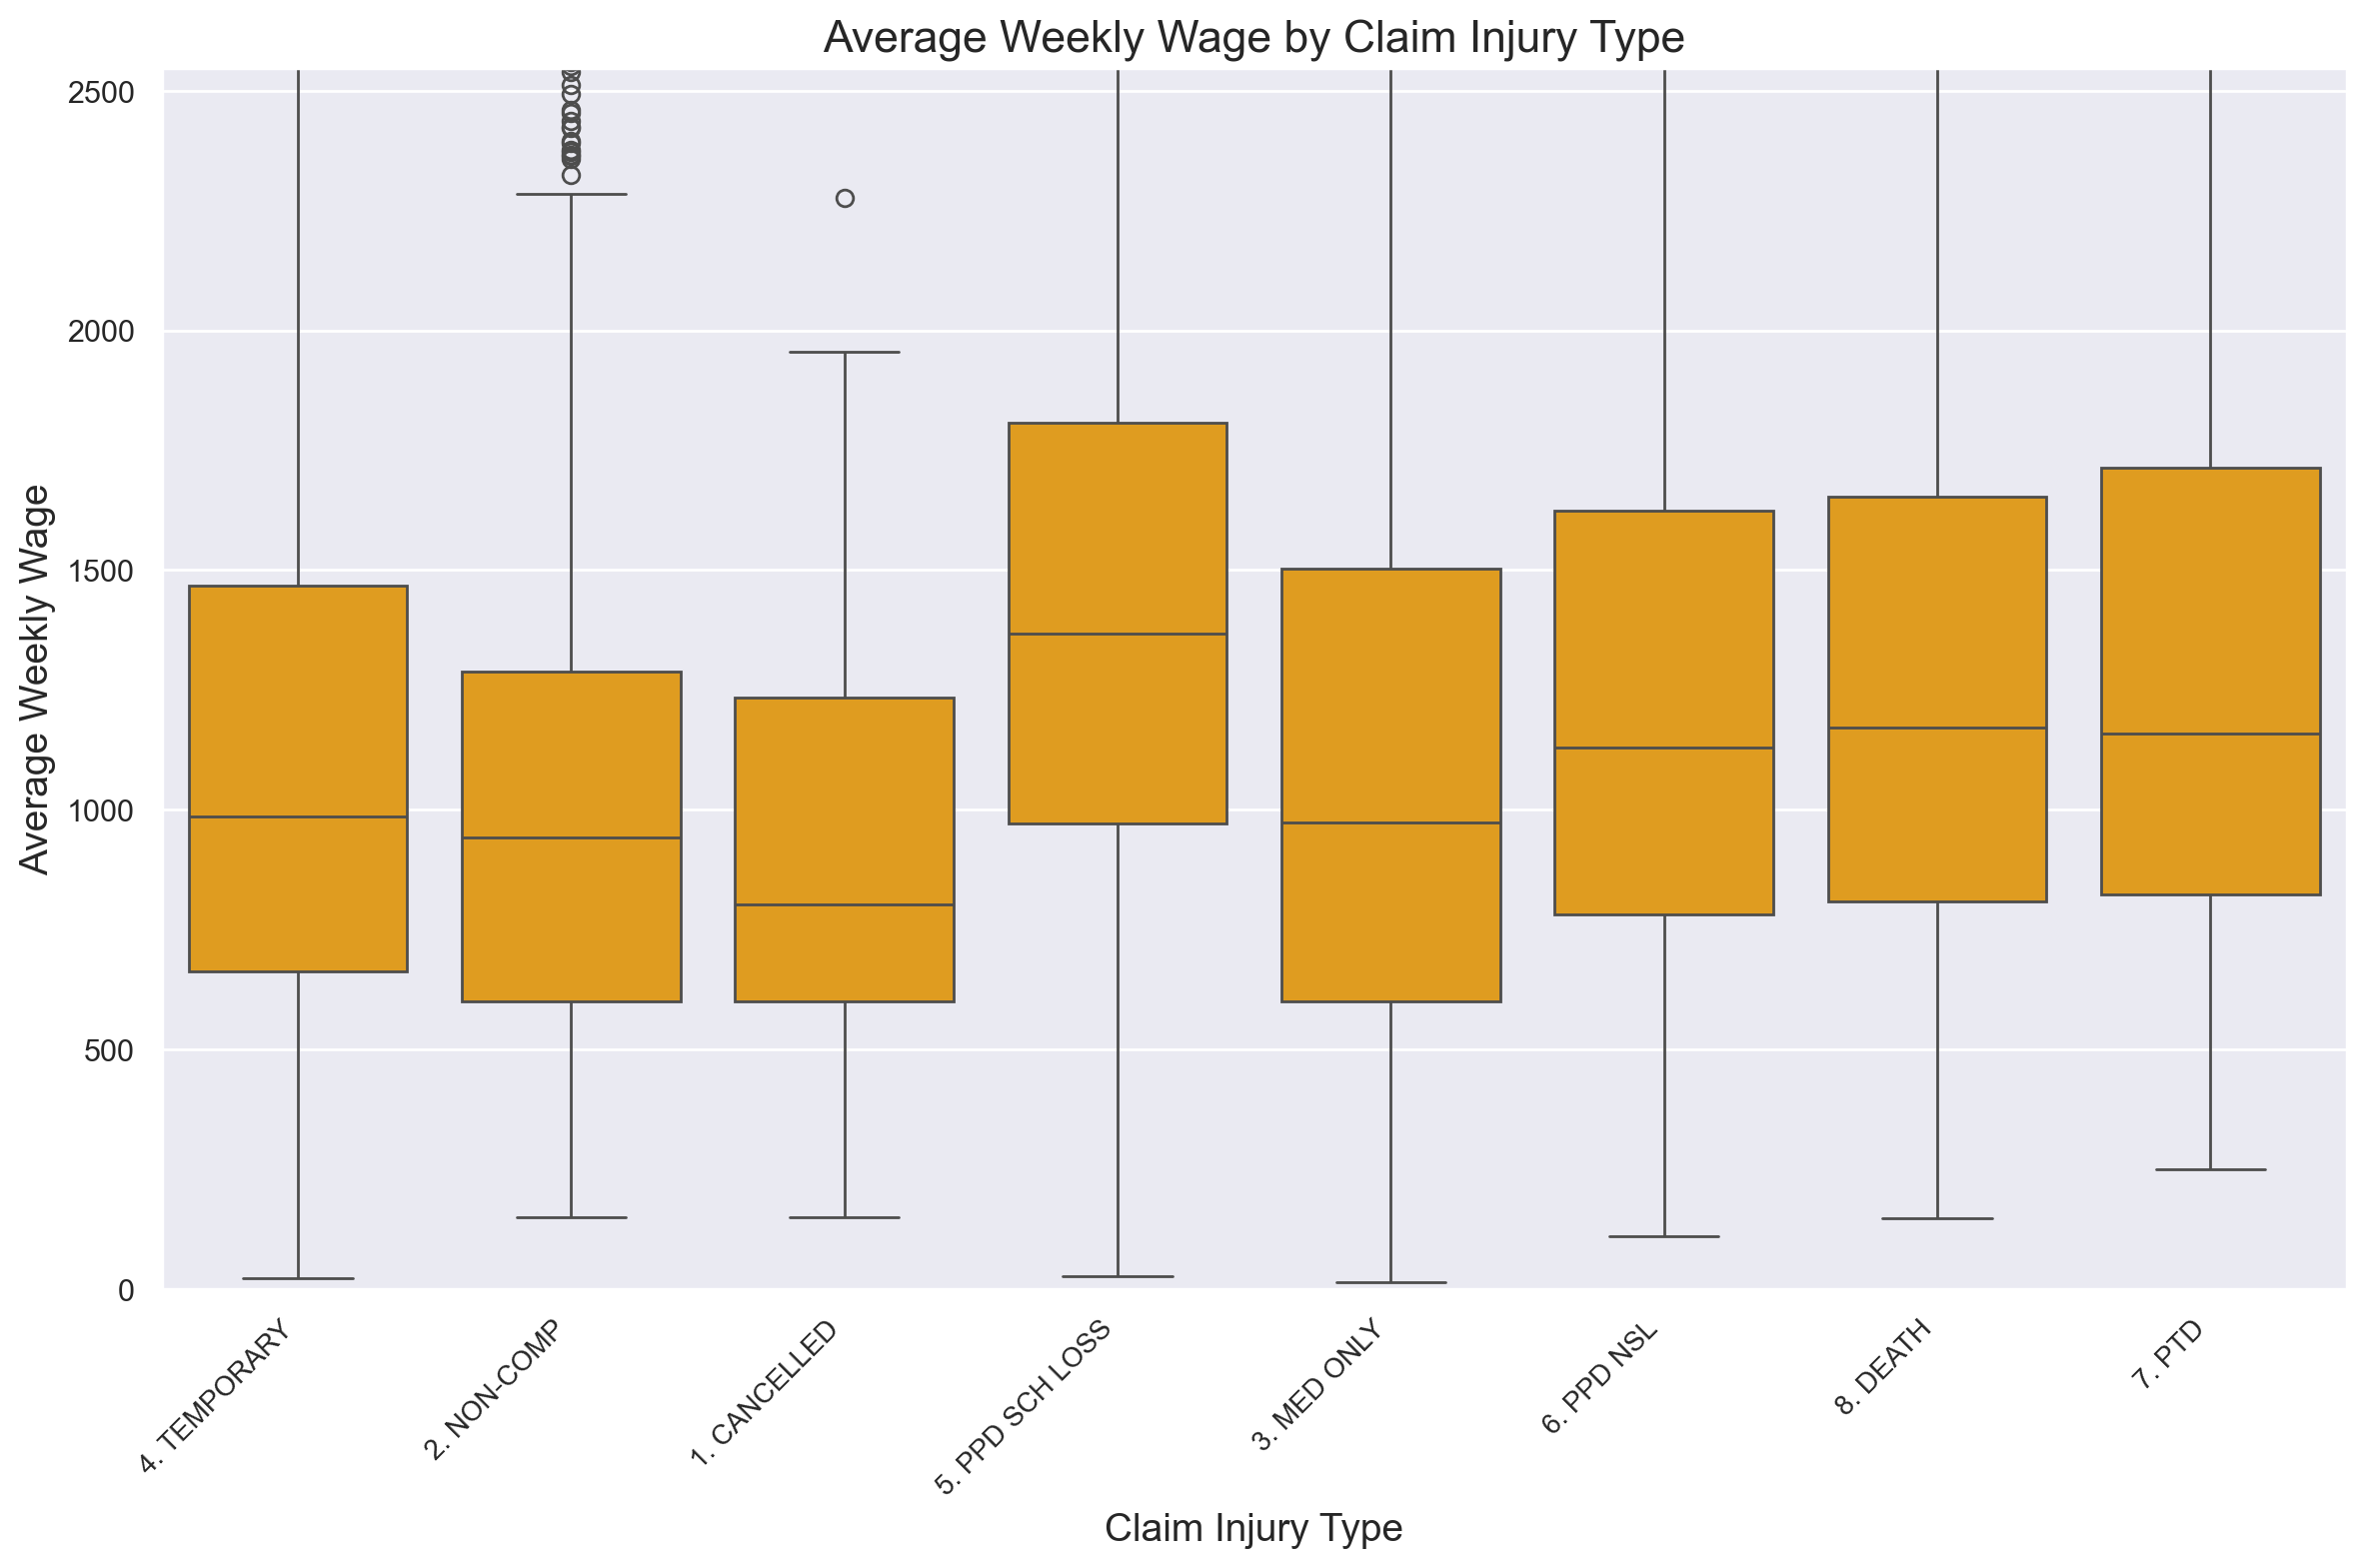

mean    median   count
Claim Injury Type                               
1. CANCELLED        933.077083   801.600      96
2. NON-COMP        1053.316054   941.800     740
3. MED ONLY        1212.347554   973.900   25852
4. TEMPORARY       1194.616292   986.220  132644
5. PPD SCH LOSS    1552.434552  1368.115   45850
6. PPD NSL         1261.354818  1130.430    3983
7. PTD             1384.602043  1158.800      93
8. DEATH           1325.023371  1171.835     350

In [700]:
# Wage variation by claim injury type using boxplot
# Increase figure size for better readability
plt.figure(figsize=(12, 8))

# Use Seaborn to create a boxplot, allowing for easier customization
sns.boxplot(data=df, x='Claim Injury Type', y='Average Weekly Wage', color='orange')

# Set title and labels with larger font sizes for readability
plt.title('Average Weekly Wage by Claim Injury Type', fontsize=16)
plt.xlabel('Claim Injury Type', fontsize=14)
plt.ylabel('Average Weekly Wage', fontsize=14)

# Set y-axis limits to avoid extreme outliers dominating the scale
plt.ylim(0, df['Average Weekly Wage'].quantile(0.95))

# Rotate x-axis labels for improved readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


# Also calculating summary statistics for wage by claim
wage_by_claim = df.groupby('Claim Injury Type')['Average Weekly Wage'].agg(['mean', 'median', 'count'])
wage_by_claim




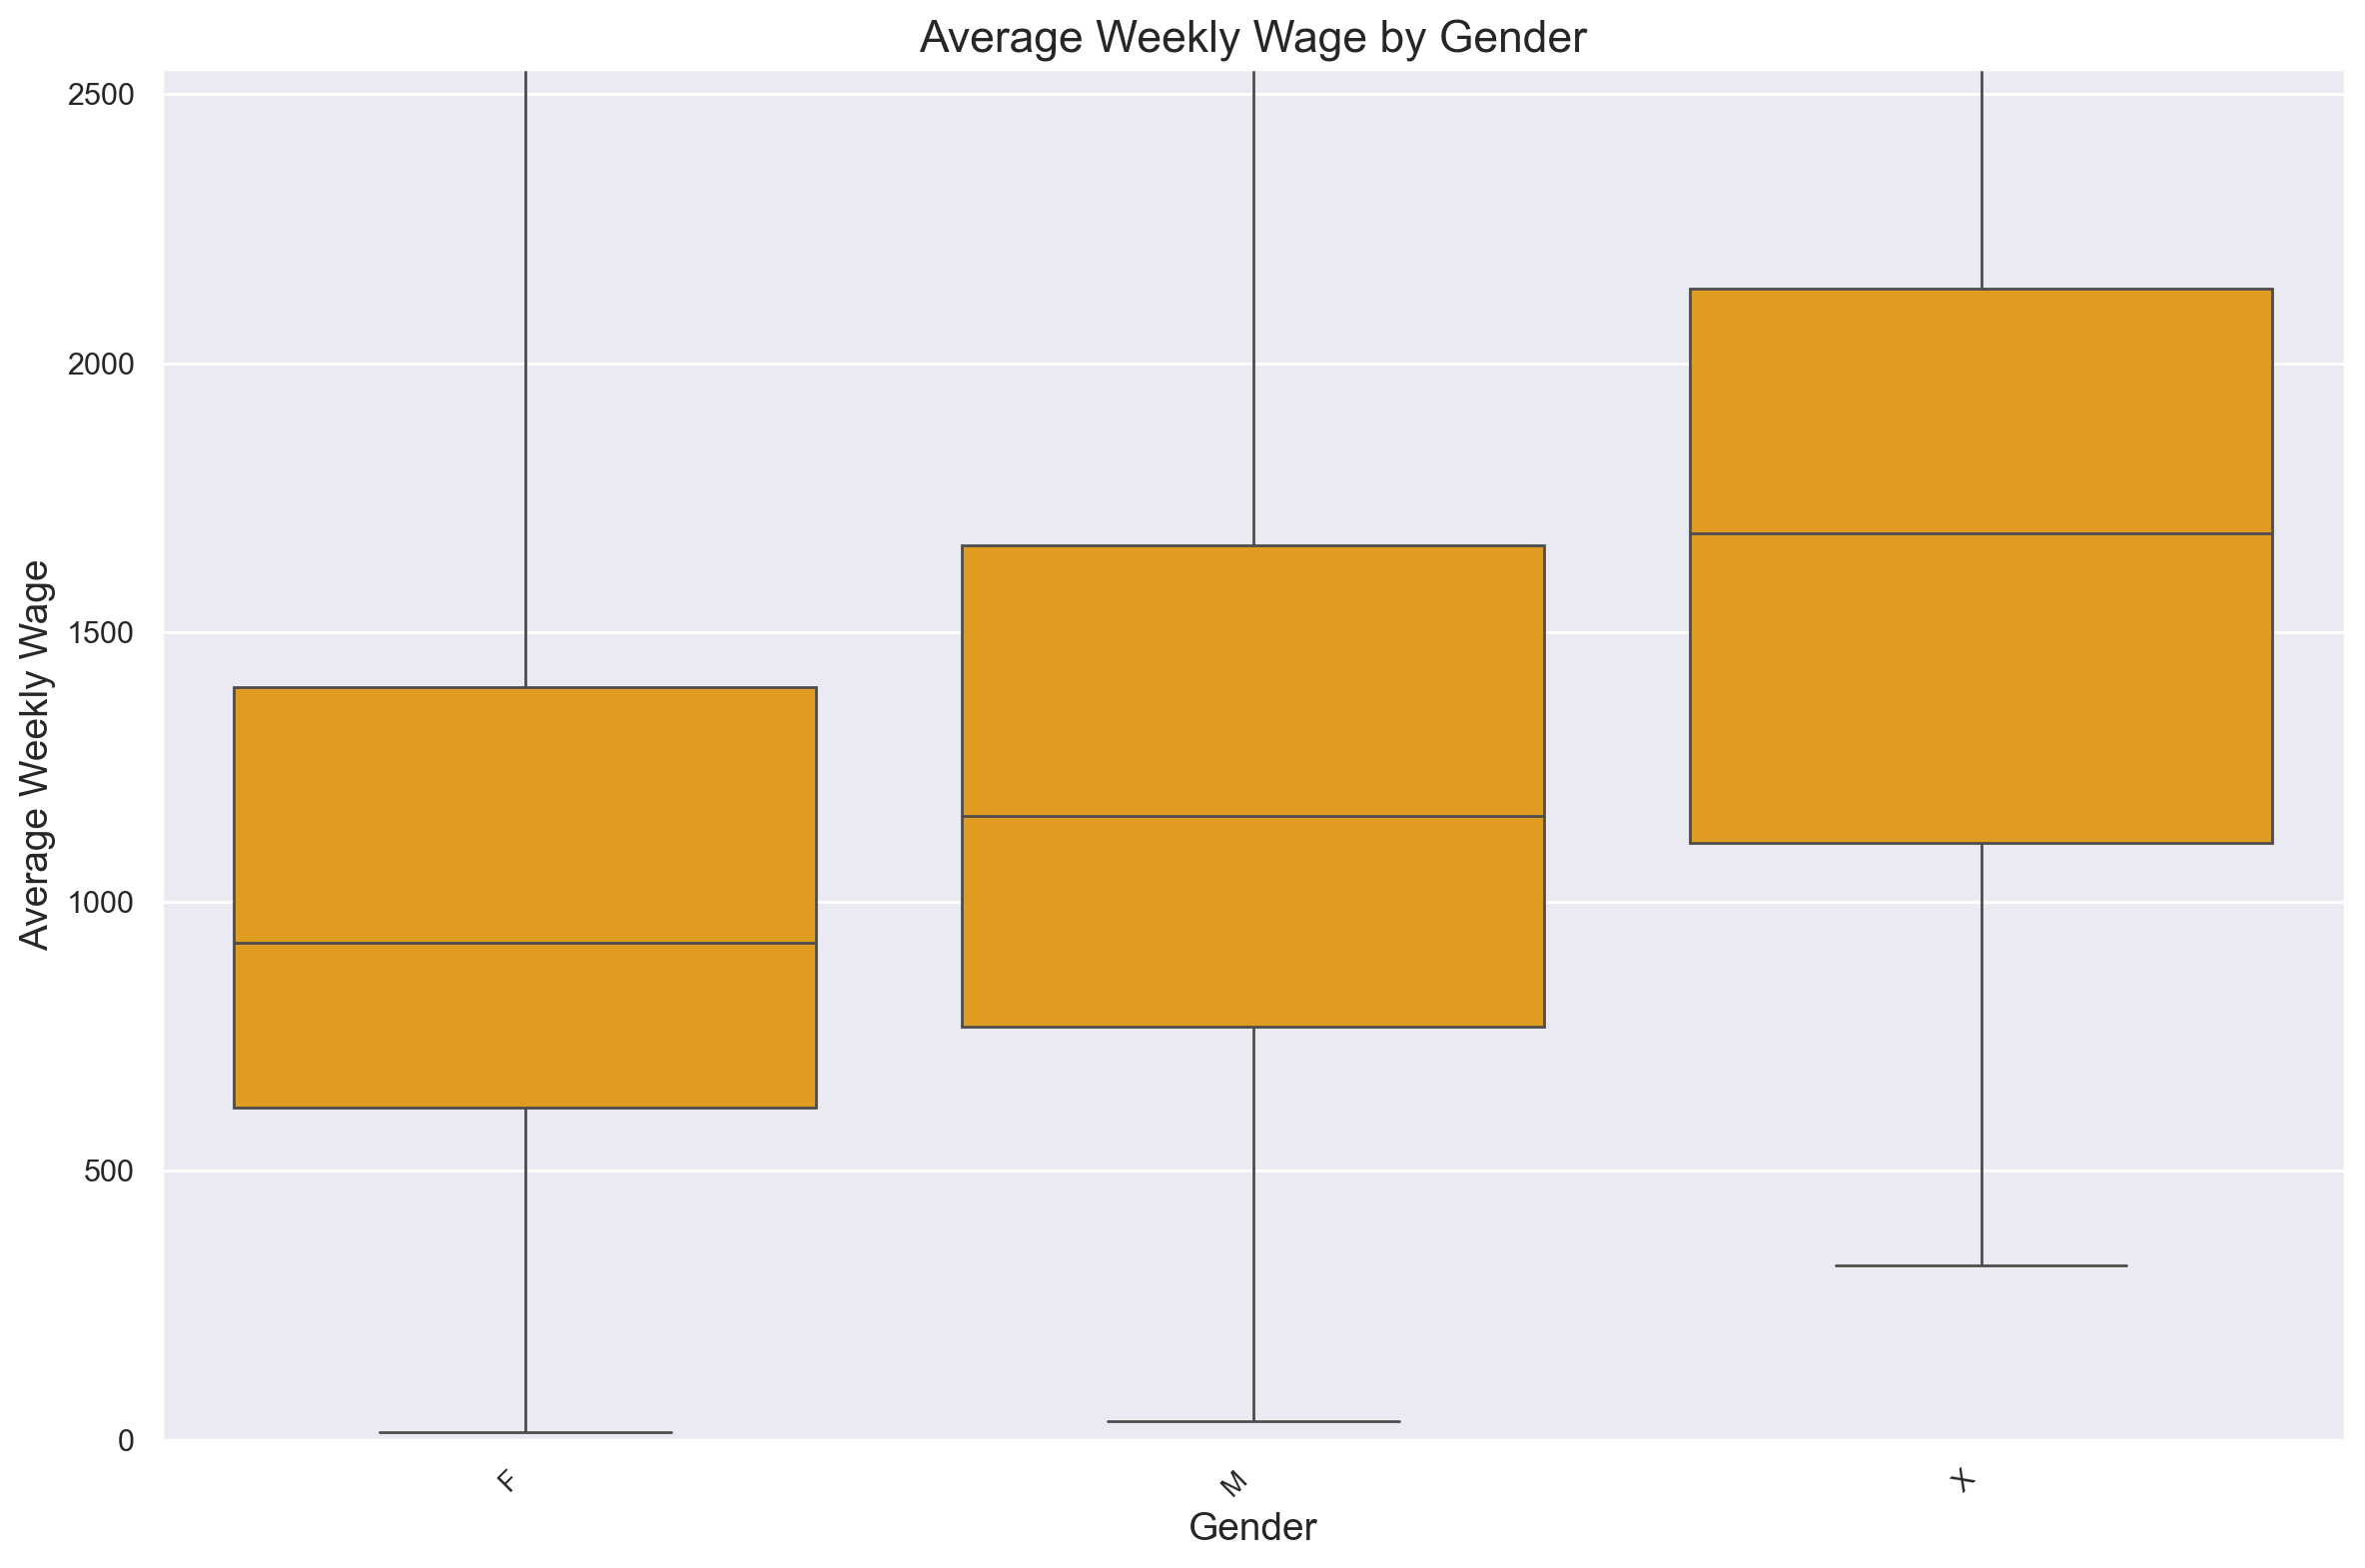

mean    median   count
Gender                               
F       1122.871843   923.040   76726
M       1366.080621  1160.000  131830
X       1719.957727  1684.005      22

In [698]:
# Wage variation by gender using boxplot
# Increase figure size for better readability
plt.figure(figsize=(12, 8))

# Use Seaborn to create a boxplot, allowing for easier customization
sns.boxplot(data=df, x='Gender', y='Average Weekly Wage', color='orange')

# Set title and labels with larger font sizes for readability
plt.title('Average Weekly Wage by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Weekly Wage', fontsize=14)

# Set y-axis limits to avoid extreme outliers dominating the scale
plt.ylim(0, df['Average Weekly Wage'].quantile(0.95))

# Rotate x-axis labels for improved readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

# Also calculating summary statistics for wage by gender
wage_by_gender = df.groupby('Gender')['Average Weekly Wage'].agg(['mean', 'median', 'count'])
wage_by_gender



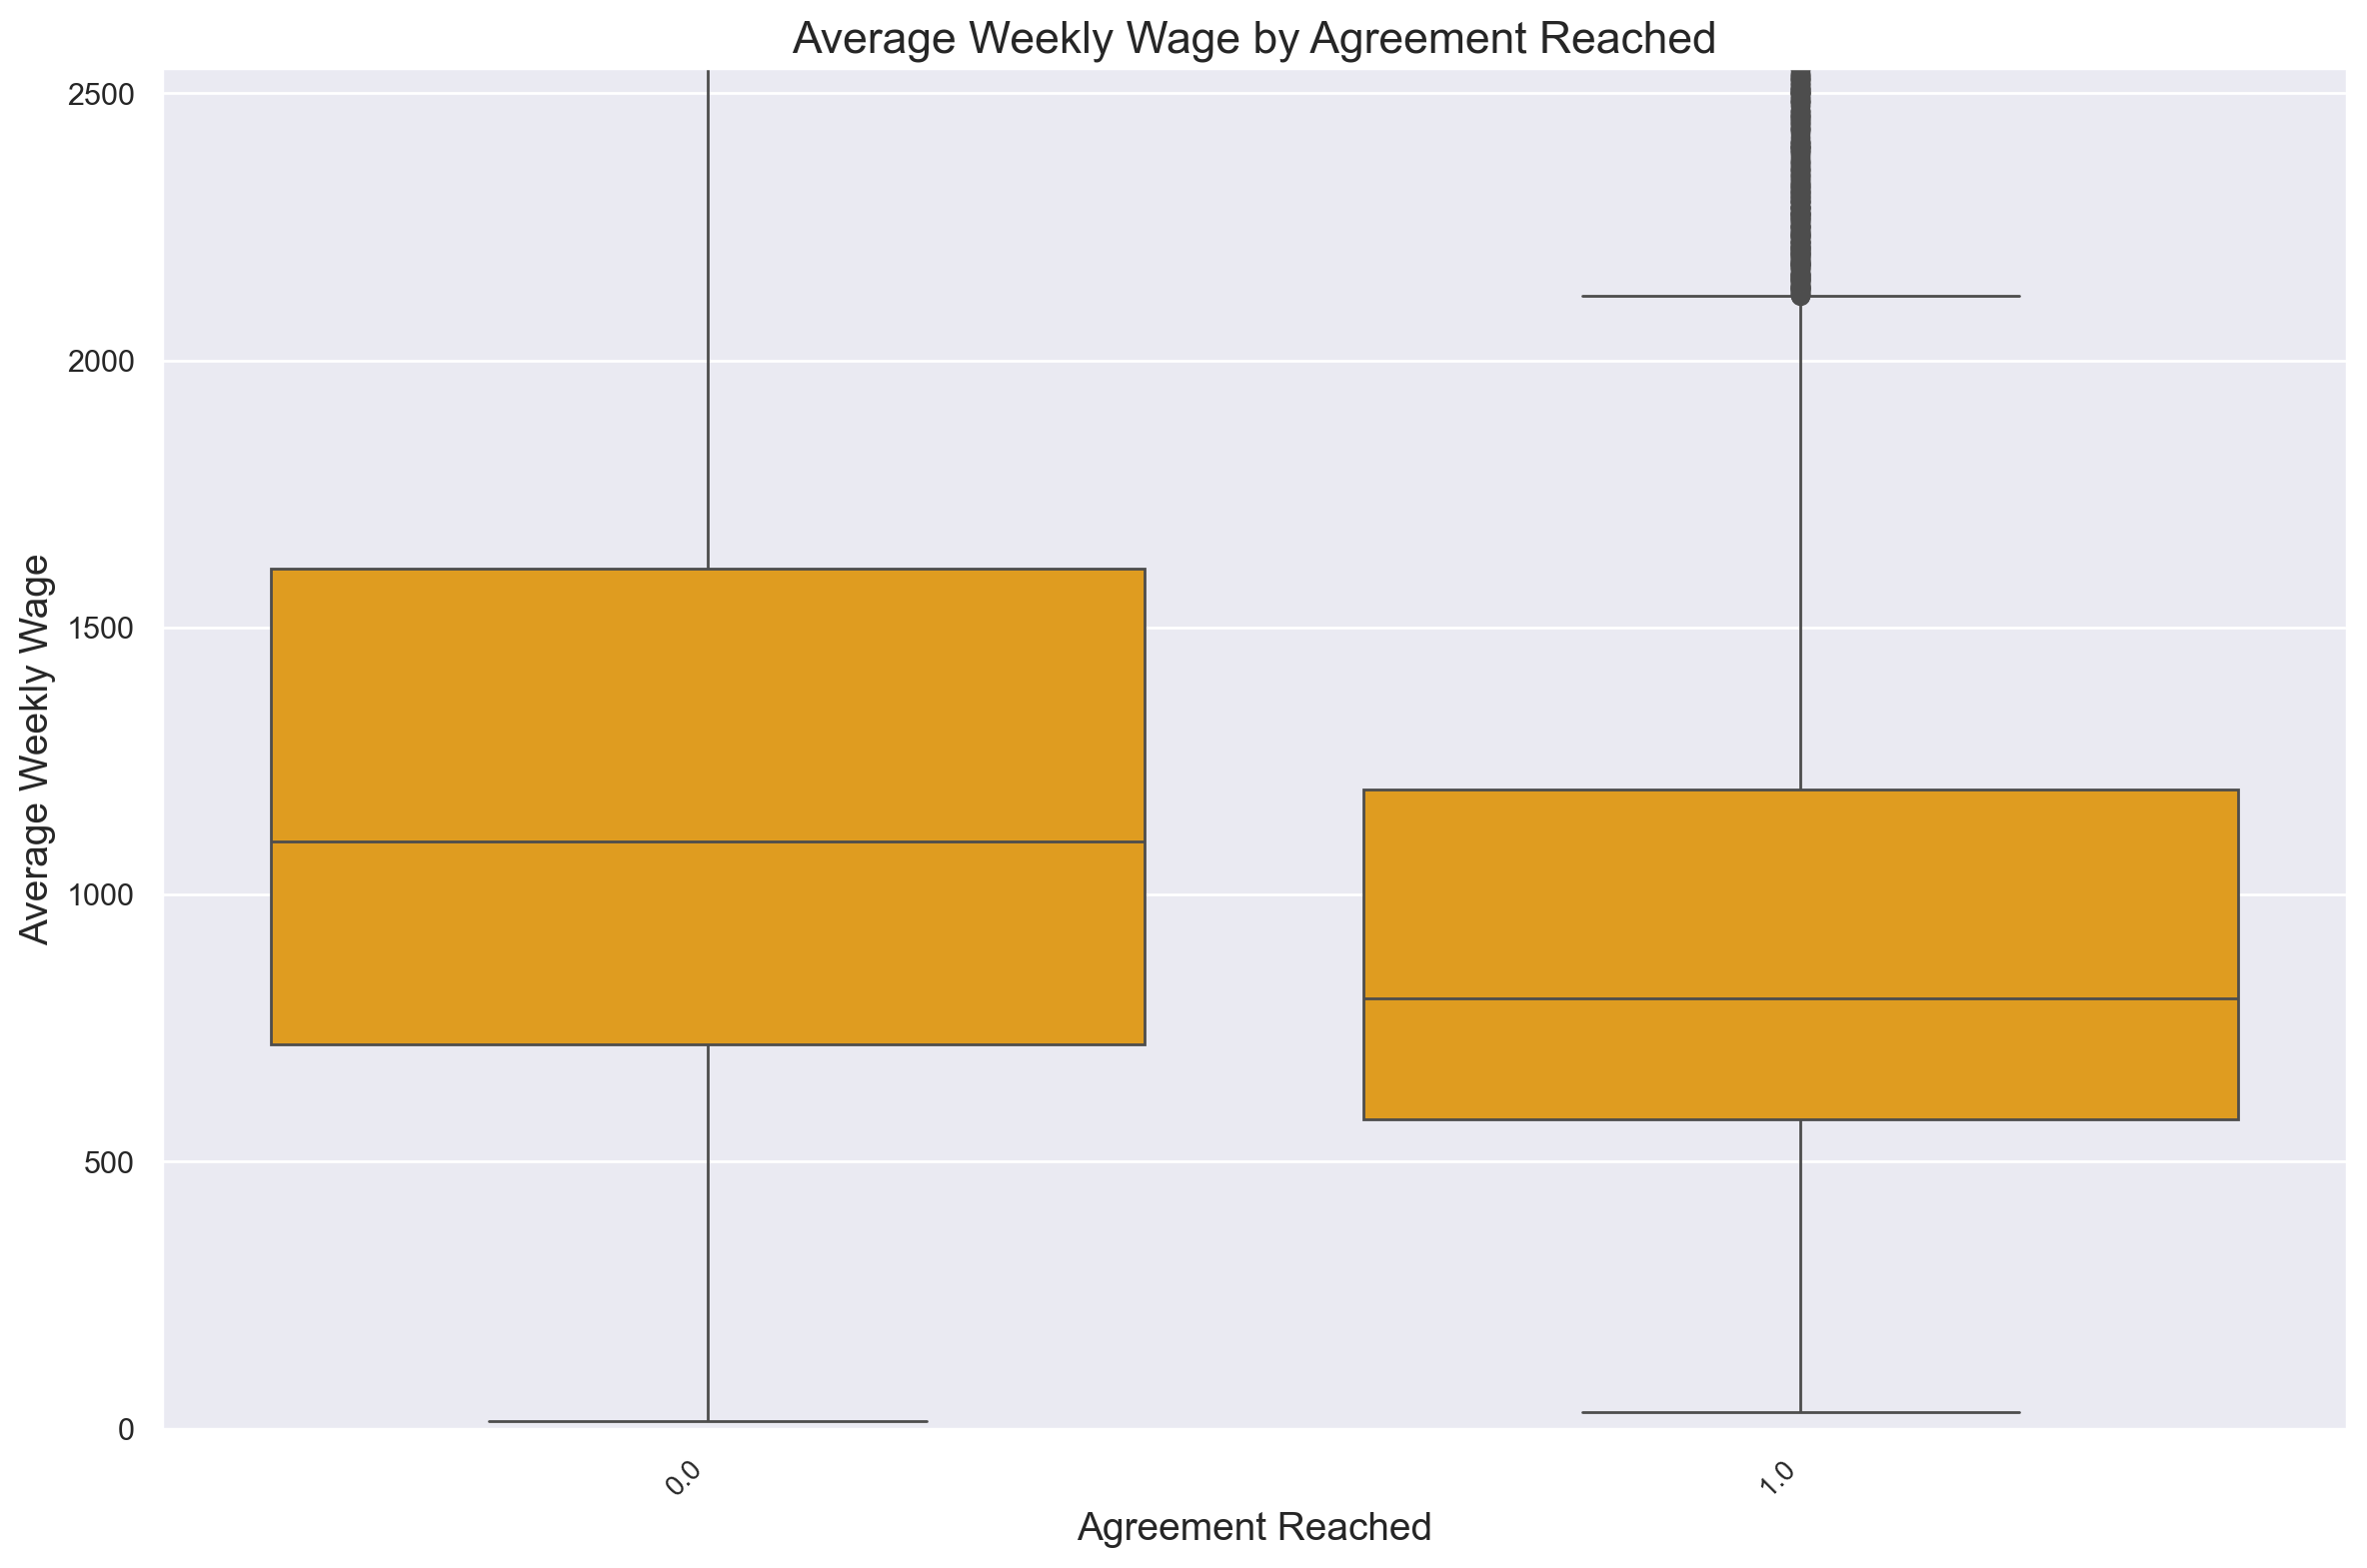

mean    median   count
Agreement Reached                               
0.0                1305.913196  1098.535  192258
1.0                 944.823576   806.255   17350

In [702]:
# Wage variation by claim injury type using boxplot
# Increase figure size for better readability
plt.figure(figsize=(12, 8))

# Use Seaborn to create a boxplot, allowing for easier customization
sns.boxplot(data=df, x='Agreement Reached', y='Average Weekly Wage', color='orange')

# Set title and labels with larger font sizes for readability
plt.title('Average Weekly Wage by Agreement Reached', fontsize=16)
plt.xlabel('Agreement Reached', fontsize=14)
plt.ylabel('Average Weekly Wage', fontsize=14)

# Set y-axis limits to avoid extreme outliers dominating the scale
plt.ylim(0, df['Average Weekly Wage'].quantile(0.95))

# Rotate x-axis labels for improved readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

wage_by_agreement = df.groupby('Agreement Reached')['Average Weekly Wage'].agg(['mean', 'median', 'count'])
wage_by_agreement


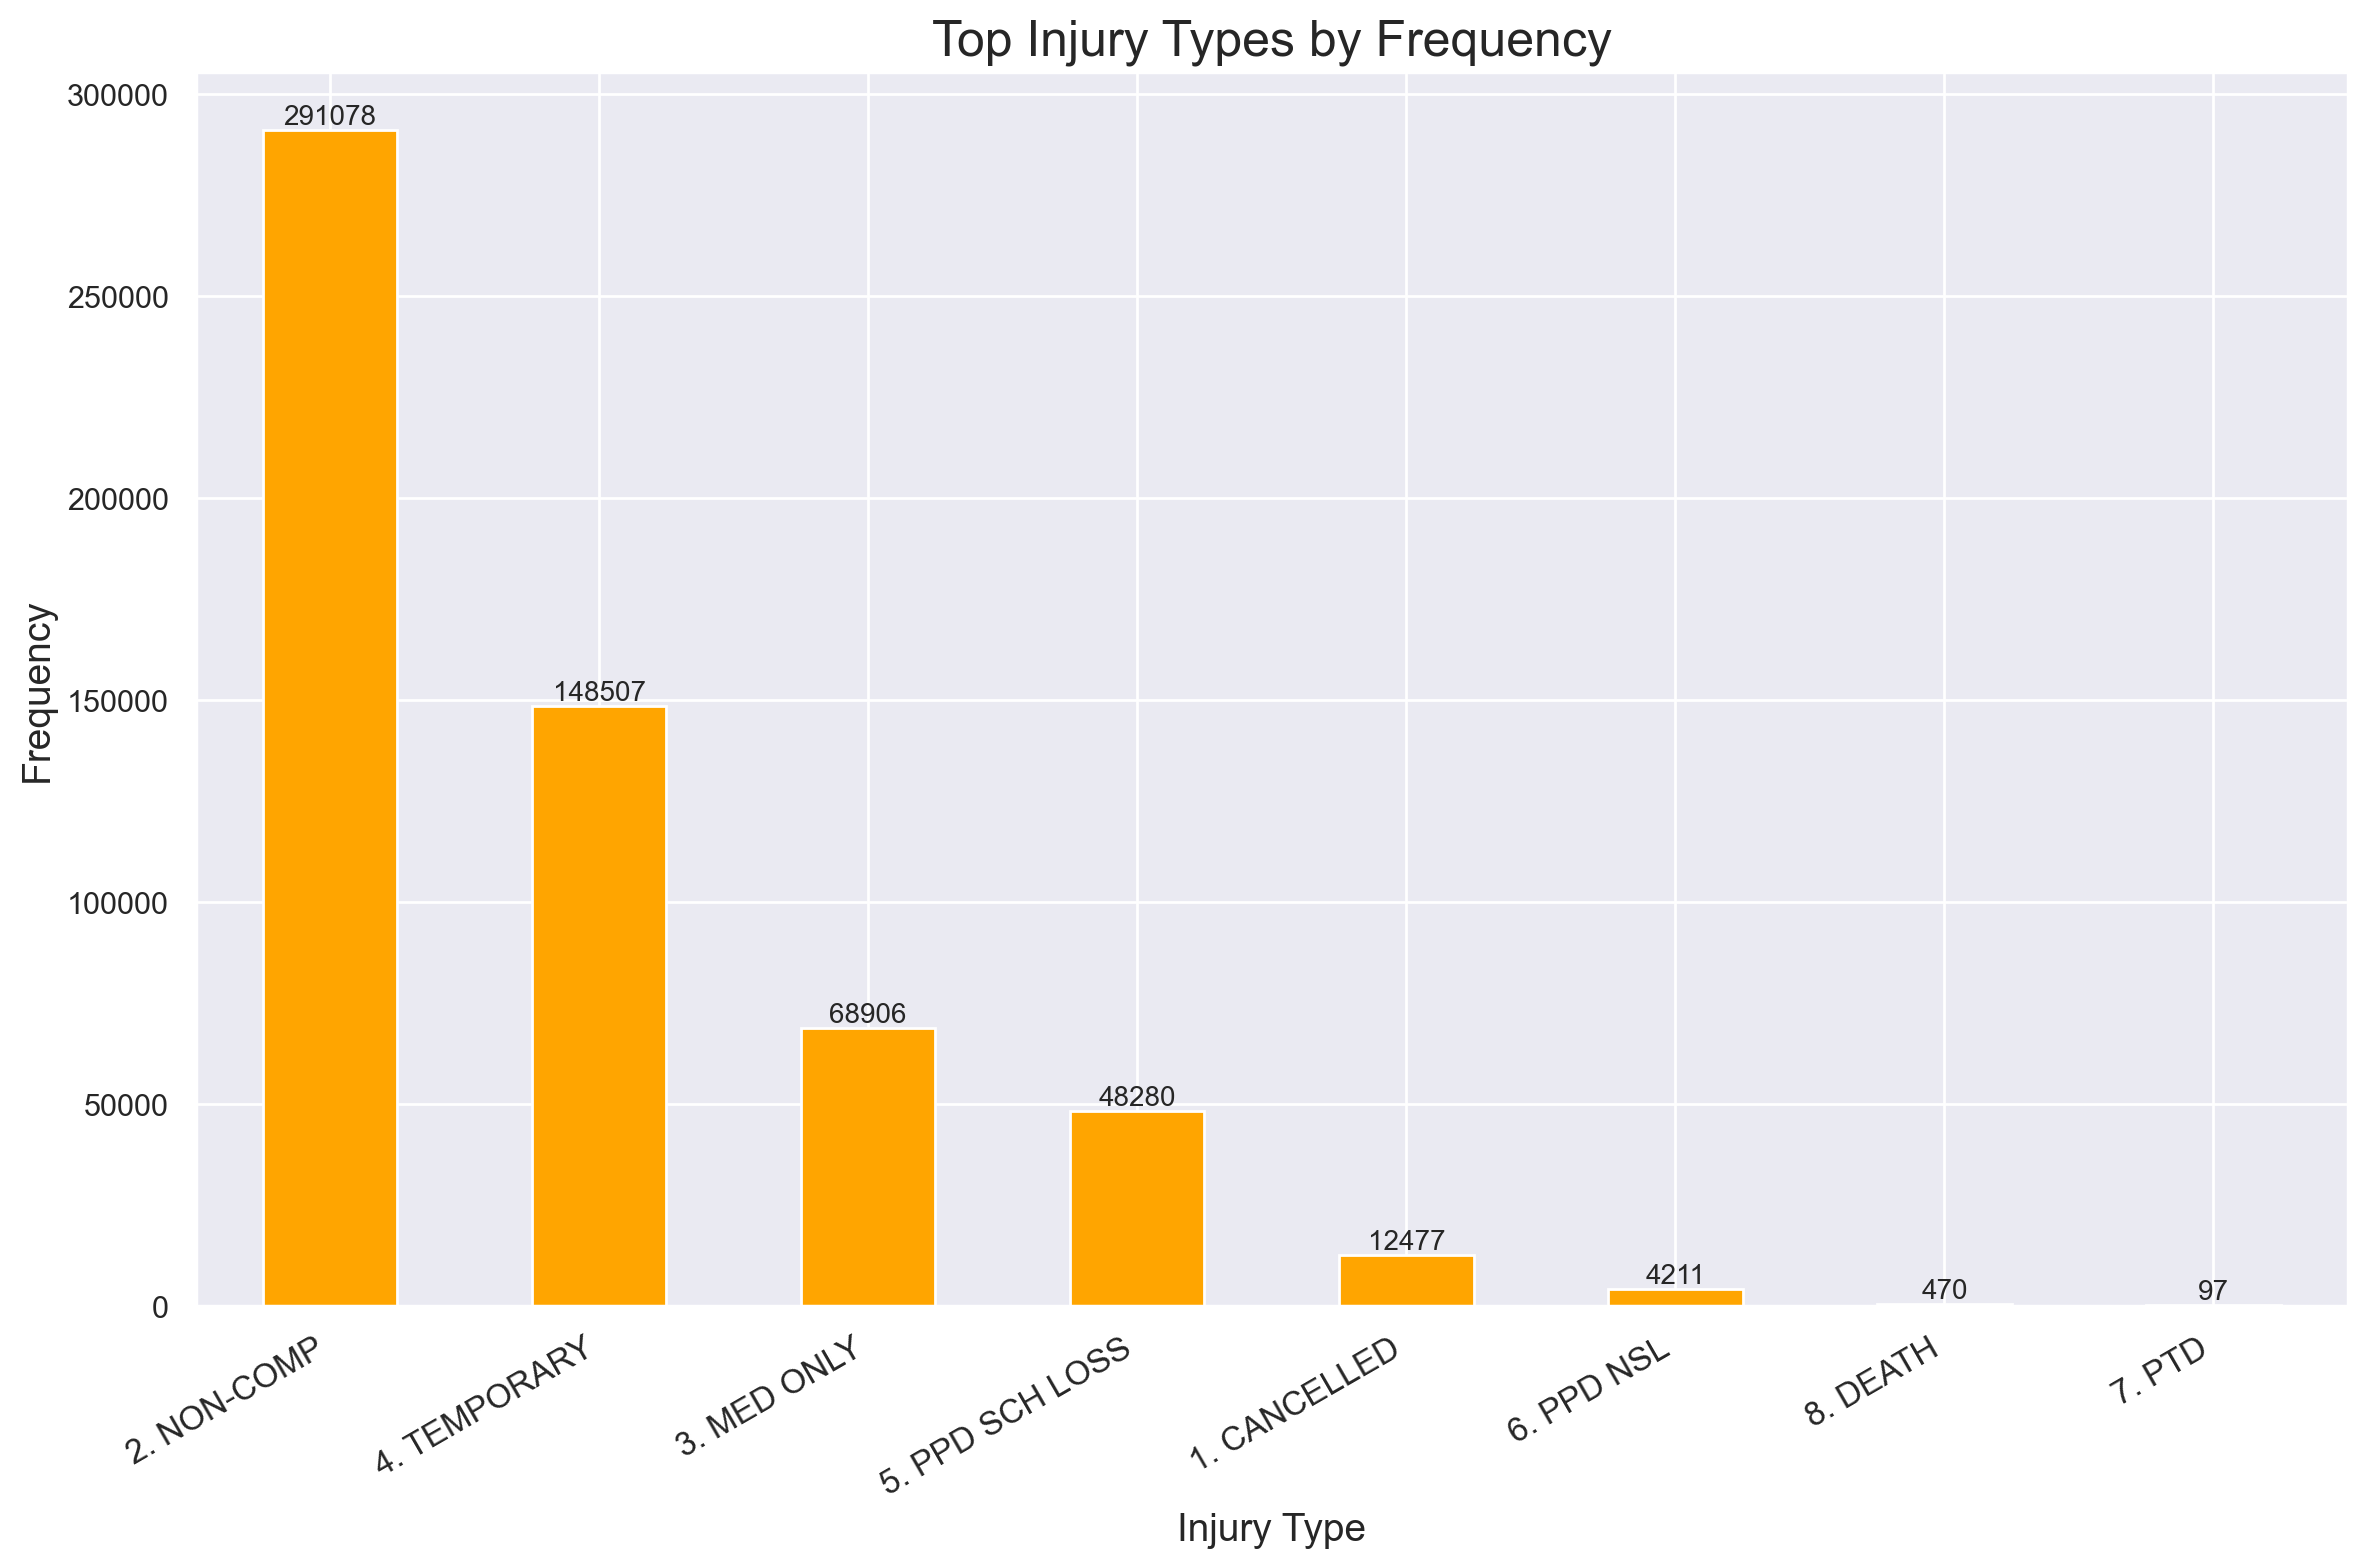

In [7]:
# Getting the top 10 types of injury by accident frequency
injuries_counts = df['Claim Injury Type'].value_counts()

# Top 10 most common industries
top_10_injuries = injuries_counts.head(10)

# Define a list of colors for the bars
colors = ['orange']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = top_10_injuries.plot(kind='bar', color=colors)

# Adding title and labels
plt.title('Top Injury Types by Frequency', fontsize=18)
plt.xlabel('Injury Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=12)

# Adding frequency labels above each bar
for bar in bars.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


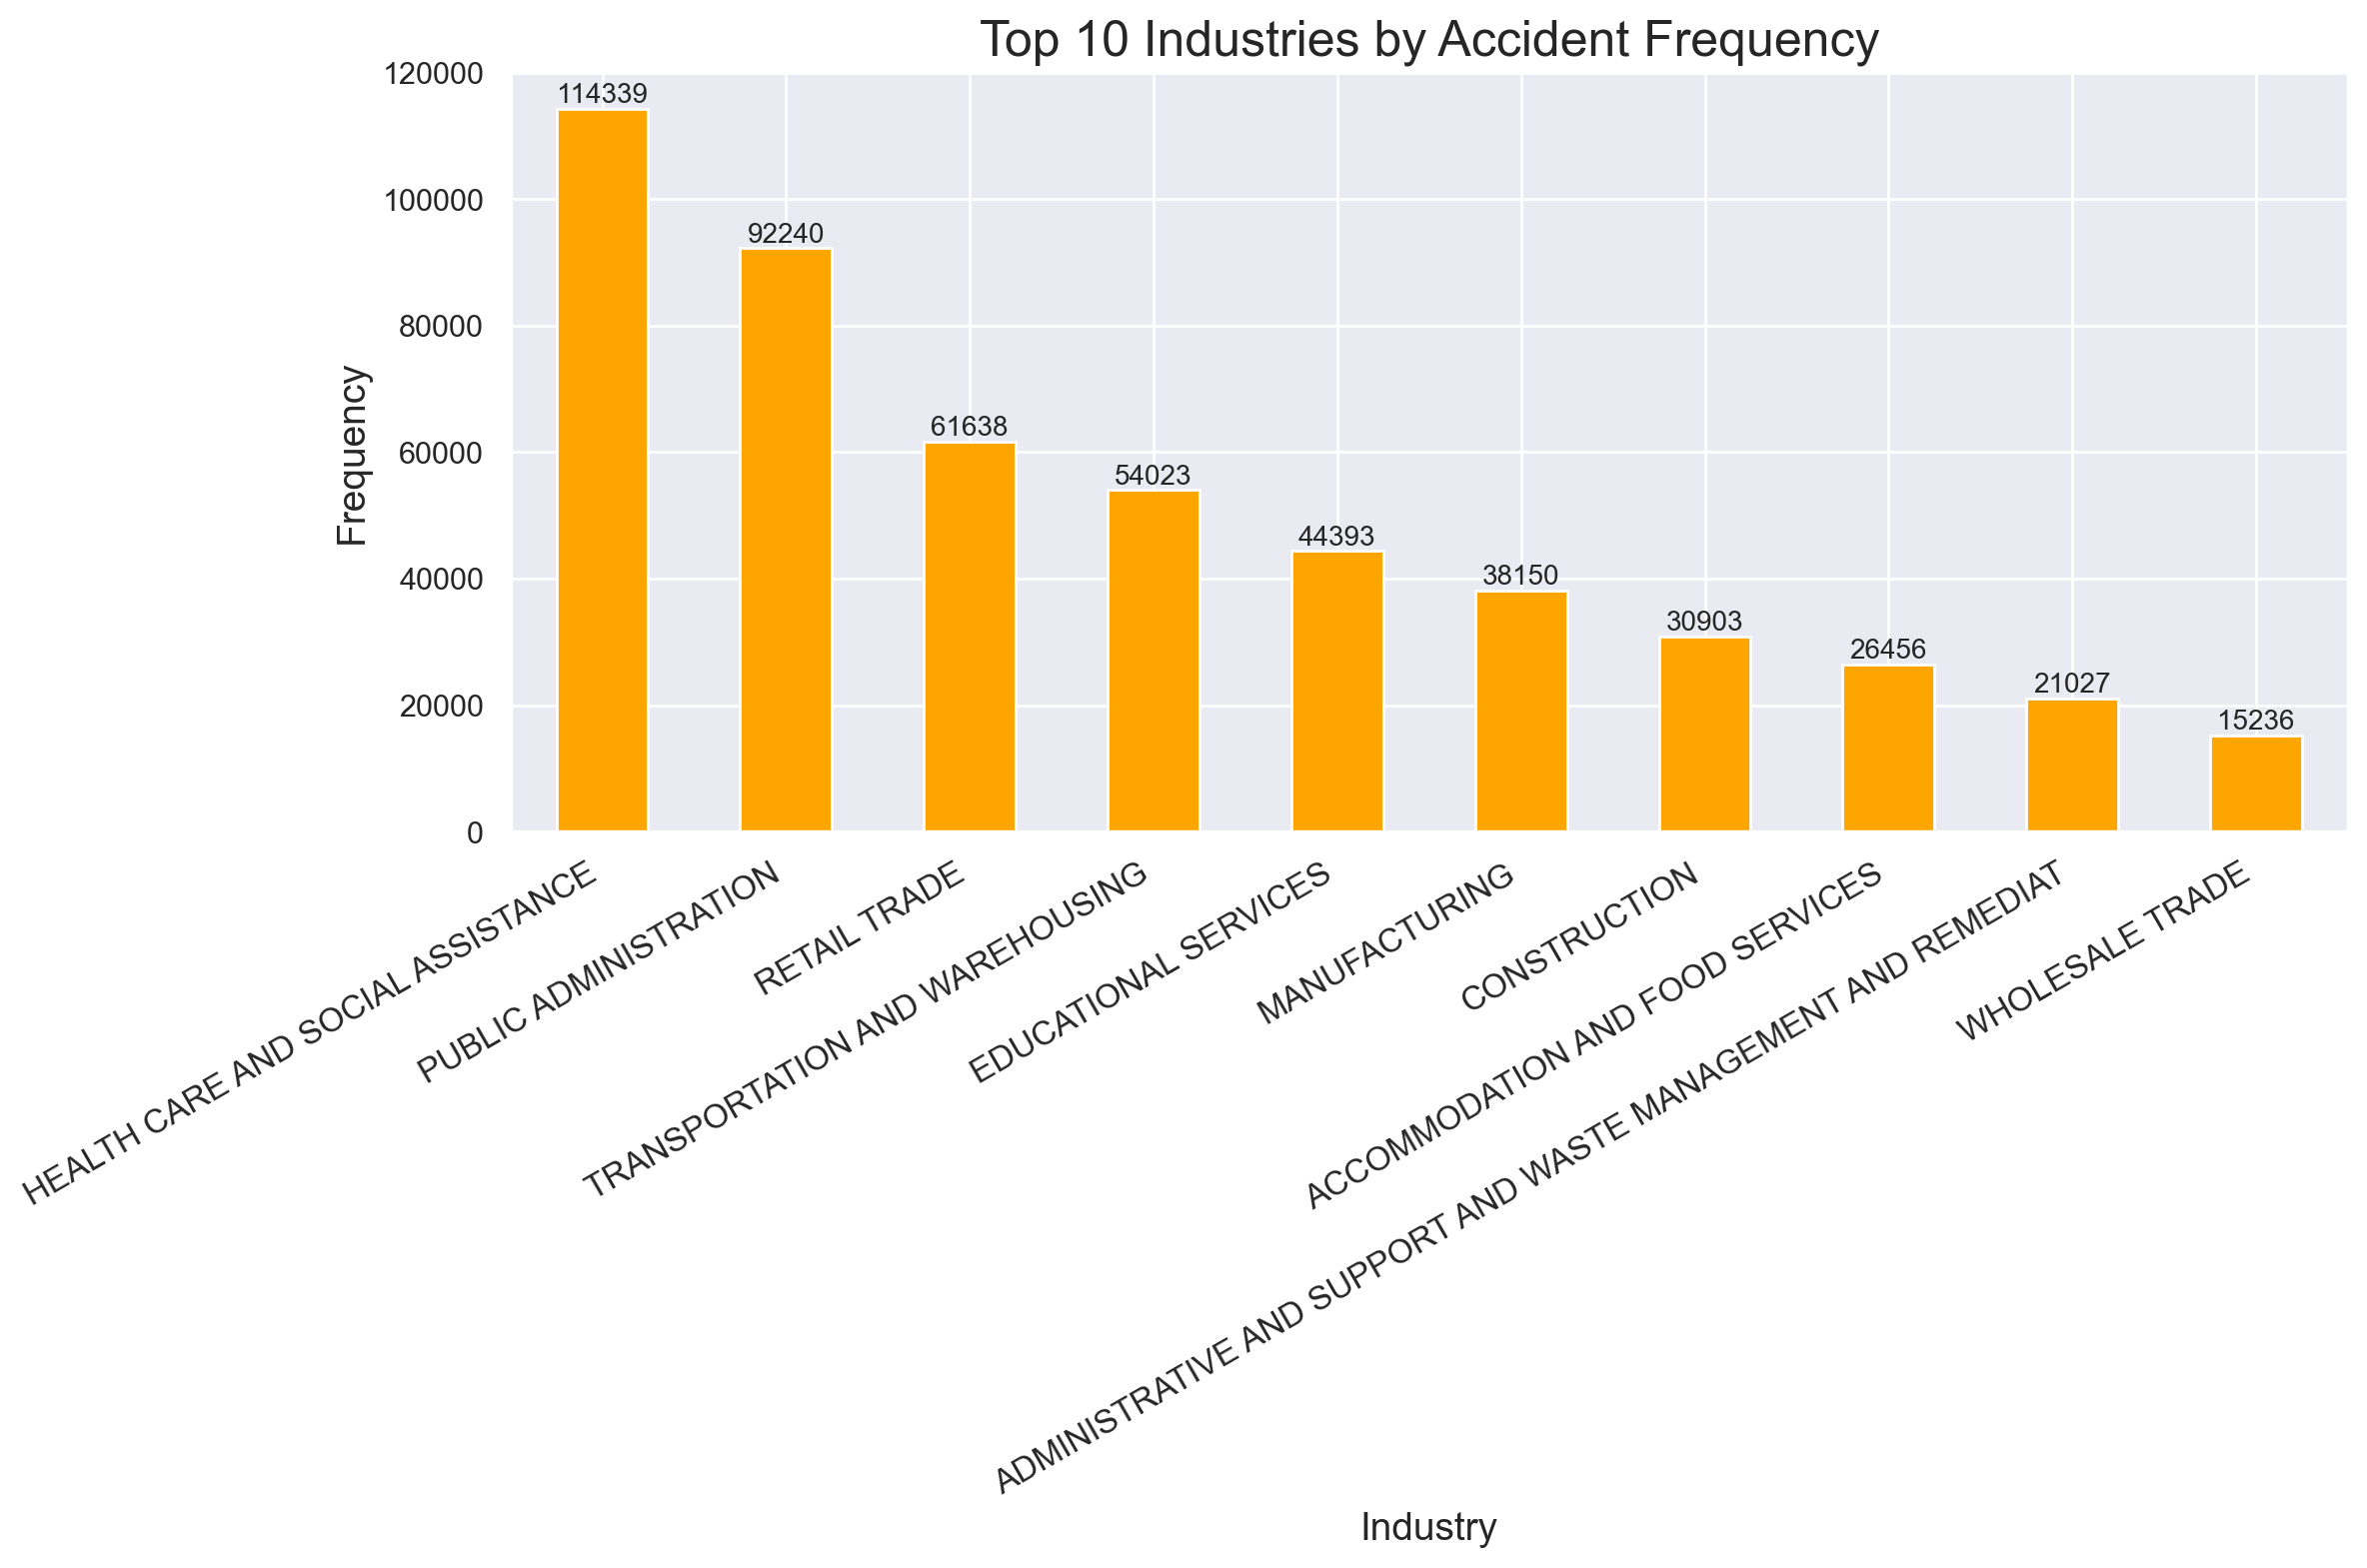

In [9]:
# Getting the top 10 industries by accident frequency
industry_counts = df['Industry Code Description'].value_counts()

# Top 10 most common industries
top_10_industries = industry_counts.head(10)

# Define a list of colors for the bars
colors = ['orange']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = top_10_industries.plot(kind='bar', color=colors)

# Adding title and labels
plt.title('Top 10 Industries by Accident Frequency', fontsize=18)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=12)

# Adding frequency labels above each bar
for bar in bars.containers[0]:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [704]:
# Exploring the relationship between injury type and county

# Creating a crosstab to show the correlation between Injury Type and County
injury_county_crosstab = pd.crosstab(df['WCIO Nature of Injury Description'], df['County of Injury'])

# Display the crosstab to explore the relationship
injury_county_crosstab

County of Injury                                    ALBANY  ALLEGANY  BRONX  \
WCIO Nature of Injury Description                                             
ADVERSE REACTION TO A VACCINATION OR INOCULATION         3         0      9   
AIDS                                                     2         0      3   
ALL OTHER CUMULATIVE INJURY, NOC                        67        12    125   
ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC              36         9     92   
ALL OTHER SPECIFIC INJURIES, NOC                       770       119   3009   
AMPUTATION                                              12         1     52   
ANGINA PECTORIS                                          4         1     10   
ASBESTOSIS                                               2         0      3   
ASPHYXIATION                                             3         1      4   
BLACK LUNG                                               0         0      2   
BURN                                                   162        23    560   
BYSSINOSIS                                               0         0      1   
CANCER                                                   4         0      7   
CARPAL TUNNEL SYNDROME                                 112         7     64   
CONCUSSION                                             149        14    224   
CONTAGIOUS DISEASE                                      16         0     25   
CONTUSION                                             2341       263   9592   
COVID-19                                               688        32   1367   
CRUSHING                                               118        17    309   
DERMATITIS                                              31         5     58   
DISLOCATION                                            119        19    433   
DUST DISEASE, NOC                                        1         0      4   
ELECTRIC SHOCK                                           9         0     30   
ENUCLEATION                                              0         0      1   
FOREIGN BODY                                           174        27    490   
FRACTURE                                               585       114   1231   
FREEZING                                                 4         0      3   
HEARING LOSS OR IMPAIRMENT                              19         3     50   
HEAT PROSTRATION                                        17         1     14   
HEPATITIS C                                              0         0      0   
HERNIA                                                  71         9    132   
INFECTION                                               37         4     53   
INFLAMMATION                                           413        52    687   
LACERATION                                            1078       151   2919   
LOSS OF HEARING                                          8        60      6   
MENTAL DISORDER                                          6         0     50   
MENTAL STRESS                                           36         0    165   
MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND P...       5         0     43   
MULTIPLE PHYSICAL INJURIES ONLY                        244        35   1030   
MYOCARDIAL INFARCTION                                   10         2     25   
NO PHYSICAL INJURY                                     112        18    453   
POISONING - CHEMICAL, (OTHER THAN METALS)                7         1      7   
POISONING - GENERAL (NOT OD OR CUMULATIVE                7         0     19   
POISONING - METAL                                        0         1      0   
PUNCTURE                                               477        54   1055   
RADIATION                                                0         0      2   
RESPIRATORY DISORDERS                                   44         6     51   
RUPTURE                                                 21         7     68   
SEVERANCE                                         

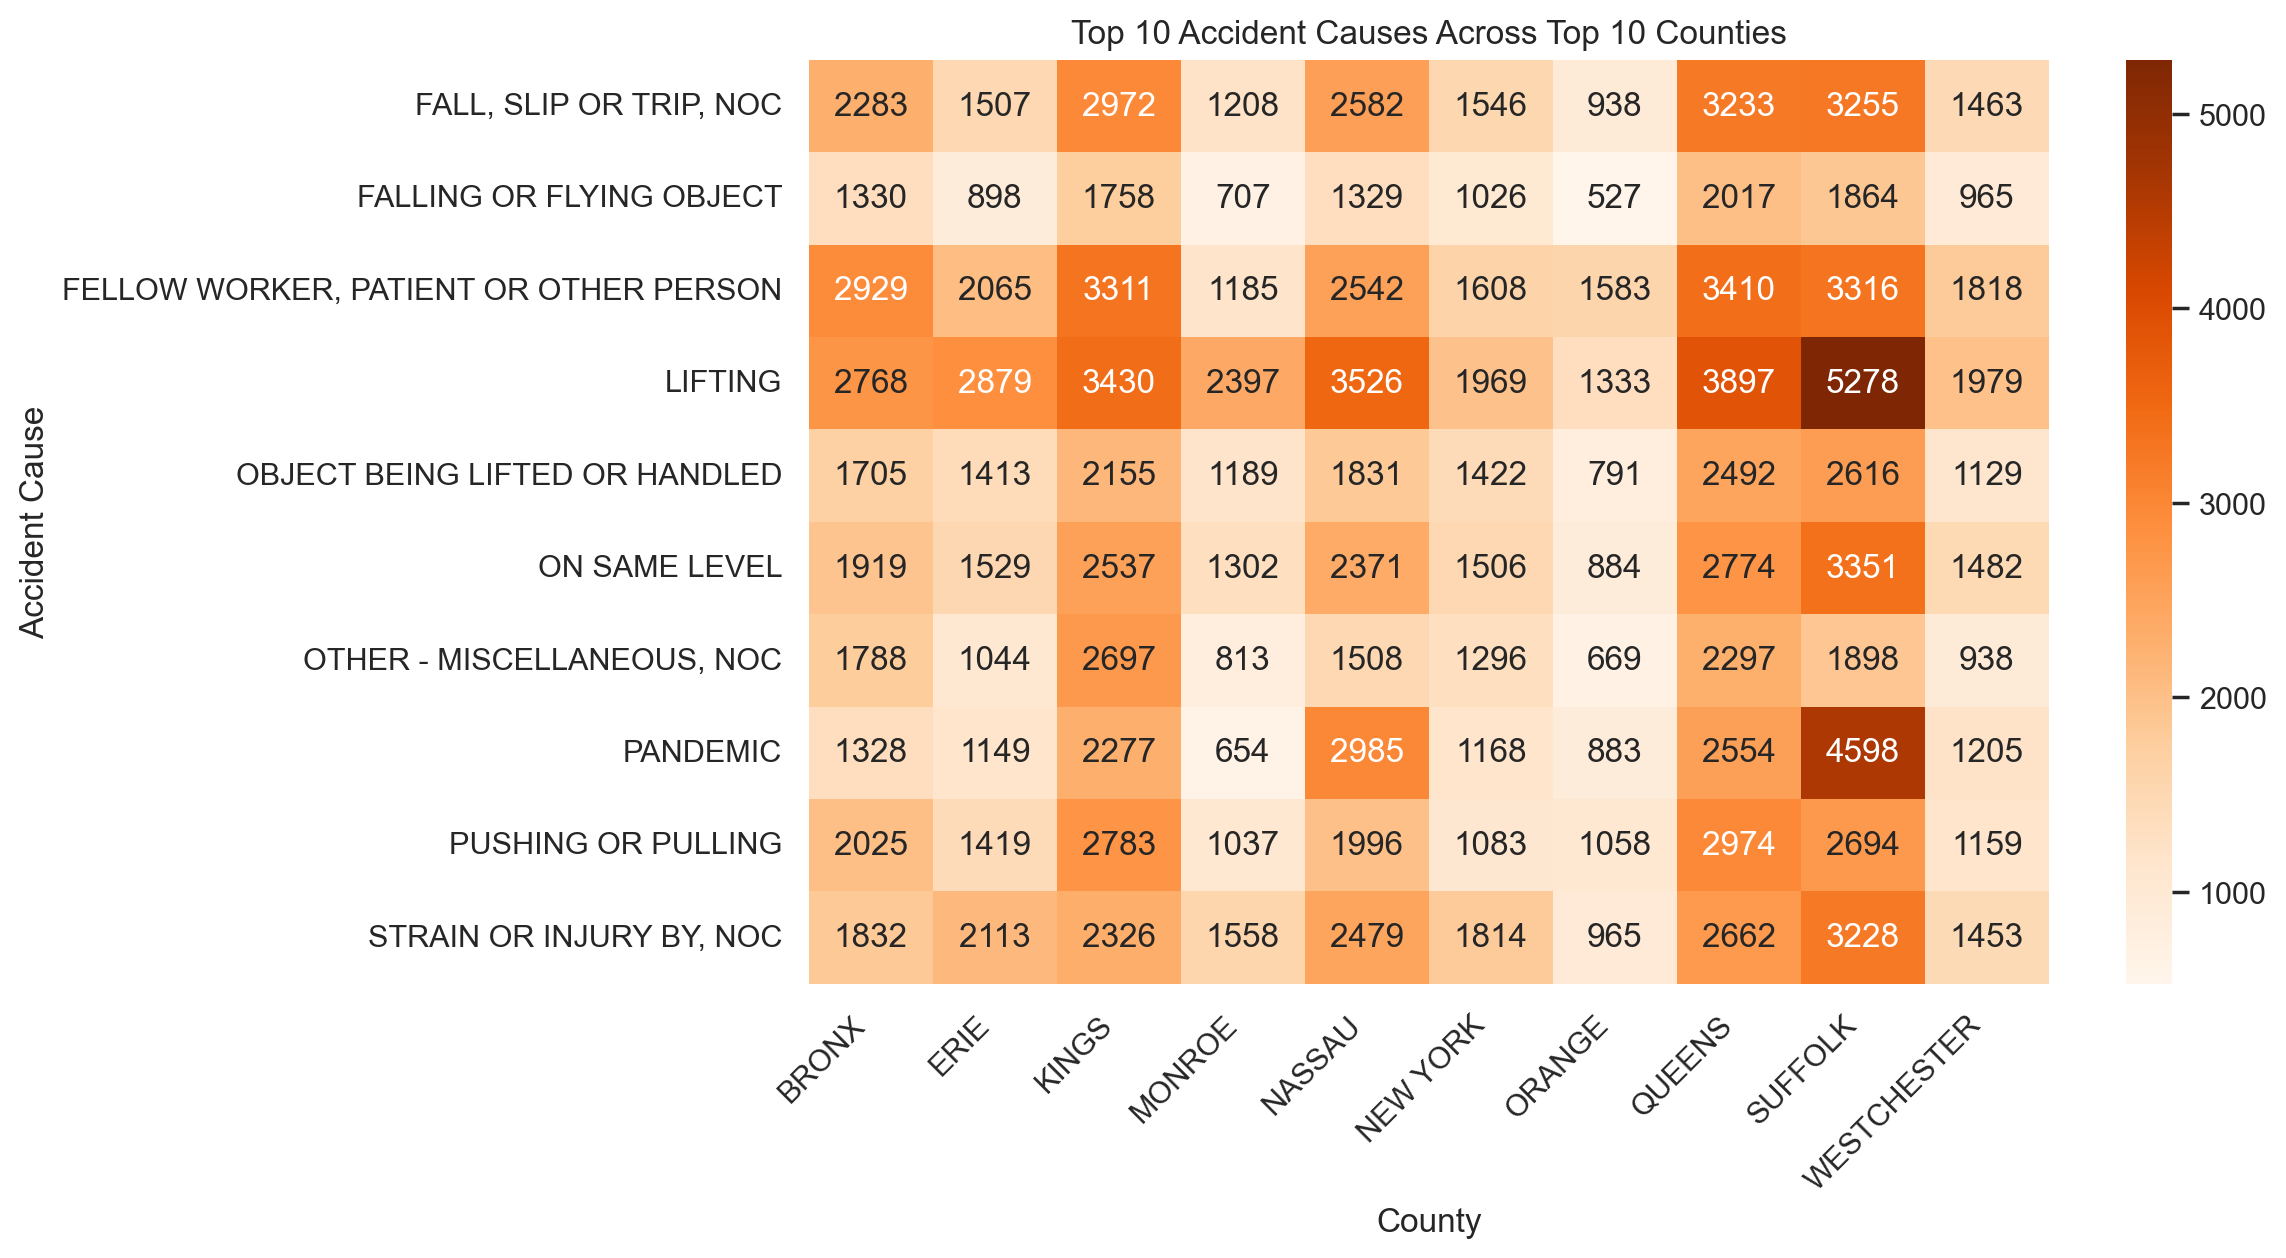

In [650]:
# Limit the data to top 10 causes and top 10 counties
top_10_causes = df['WCIO Cause of Injury Description'].value_counts().index[:10]
top_10_counties = df['County of Injury'].value_counts().index[:10]

# Filter the data for these top 10 causes and counties
filtered_df = df[df['WCIO Cause of Injury Description'].isin(top_10_causes) & df['County of Injury'].isin(top_10_counties)]

# Creating a crosstab for the filtered data
cause_county_crosstab_filtered = pd.crosstab(filtered_df['WCIO Cause of Injury Description'], filtered_df['County of Injury'])

# Plotting the heatmap with limited causes and counties
plt.figure(figsize=(10, 6))
sns.heatmap(cause_county_crosstab_filtered, annot=True, cmap='Oranges', fmt='d')
plt.title('Top 10 Accident Causes Across Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Accident Cause')
plt.xticks(rotation=45, ha='right')
plt.show()

## Data Preparation

### Missing Values

In [925]:
#'Industry Code' and 'Industry Code Description' we based on the description available 
data = {
    'Industry Code': [11.0, 21.0, 22.0, 23.0, 31.0, 32.0, 33.0, 42.0, 44.0, 45.0,
                      48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 61.0, 
                      62.0, 71.0, 72.0, 81.0, 92.0],
    'Industry Code Description': [
        'AGRICULTURE, FORESTRY, FISHING AND HUNTING', 'MINING', 'UTILITIES', 
        'CONSTRUCTION', 'MANUFACTURING', 'MANUFACTURING', 'MANUFACTURING', 
        'WHOLESALE TRADE', 'RETAIL TRADE', 'RETAIL TRADE', 
        'TRANSPORTATION AND WAREHOUSING', 'TRANSPORTATION AND WAREHOUSING', 
        'INFORMATION', 'FINANCE AND INSURANCE', 'REAL ESTATE AND RENTAL AND LEASING', 
        'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 
        'MANAGEMENT OF COMPANIES AND ENTERPRISES', 
        'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION', 
        'EDUCATIONAL SERVICES', 'HEALTH CARE AND SOCIAL ASSISTANCE', 
        'ARTS, ENTERTAINMENT, AND RECREATION', 
        'ACCOMMODATION AND FOOD SERVICES', 
        'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)', 
        'PUBLIC ADMINISTRATION'
    ]
}


df['Industry Code'] = df['Industry Code'].apply(pd.to_numeric, errors='coerce')

df['Industry Code Description'] = df['Industry Code Description'].astype(str)

aggregated_df = df.groupby('Industry Code').agg(
    {'Industry Code Description': lambda x: sorted(x.unique())}
).reset_index()

industry_dict = dict(zip(aggregated_df['Industry Code'], aggregated_df['Industry Code Description']))

industry_dict

mode_value = df['Industry Code'].mode()[0]  
df['Industry Code'] = df['Industry Code'].fillna(mode_value)


industry_dict = dict(zip(df['Industry Code'], df['Industry Code Description']))

df['Industry Code Description'] = df['Industry Code'].map(industry_dict)

df[['Industry Code', 'Industry Code Description']].head(10)

Industry Code          Industry Code Description
Claim Identifier                                                  
5393091                    23.0                       CONSTRUCTION
5393667                    44.0                       RETAIL TRADE
5393769                    44.0                       RETAIL TRADE
5393770                    61.0               EDUCATIONAL SERVICES
5393772                    92.0              PUBLIC ADMINISTRATION
5393773                    62.0  HEALTH CARE AND SOCIAL ASSISTANCE
5393774                    92.0              PUBLIC ADMINISTRATION
5393776                    42.0                    WHOLESALE TRADE
5393777                    62.0  HEALTH CARE AND SOCIAL ASSISTANCE
5393778                    61.0               EDUCATIONAL SERVICES

In [927]:
#We search to get the codes and theirs descriptions

# WCIO Cause of Injury Code and their Descriptions as per the provided order
cause_of_injury_dict = {
    1.0: 'Chemicals',
    2.0: 'Hot Objects or Substances',
    3.0: 'Temperature Extremes',
    4.0: 'Fire or Flame',
    5.0: 'Steam or Hot Fluids',
    6.0: 'Dust, Gases, Fumes or Vapors',
    7.0: 'Welding Operation',
    8.0: 'Radiation',
    9.0: 'Contact With, NOC',
    10.0: 'Machine or Machinery',
    11.0: 'Cold Objects or Substances',
    12.0: 'Object Handled',
    13.0: 'Caught In, Under or Between, NOC',
    14.0: 'Abnormal Air Pressure',
    15.0: 'Broken Glass',
    16.0: 'Hand Tool, Utensil; Not Powered',
    17.0: 'Object Being Lifted or Handled',
    18.0: 'Powered Hand Tool, Appliance',
    19.0: 'Cut, Puncture, Scrape, NOC',
    20.0: 'Collapsing Materials (Slides of Earth)',
    25.0: 'From Different Level (Elevation)',
    26.0: 'From Ladder or Scaffolding',
    27.0: 'From Liquid or Grease Spills',
    28.0: 'Into Openings',
    29.0: 'On Same Level',
    30.0: 'Slip, or Trip, Did Not Fall',
    31.0: 'Fall, Slip or Trip, NOC',
    32.0: 'On Ice or Snow',
    33.0: 'On Stairs',
    40.0: 'Crash of Water Vehicle',
    41.0: 'Crash of Rail Vehicle',
    45.0: 'Collision or Sideswipe With Another Vehicle',
    46.0: 'Collision with a Fixed Object',
    47.0: 'Crash of Airplane',
    48.0: 'Vehicle Upset',
    50.0: 'Motor Vehicle, NOC',
    52.0: 'Continual Noise',
    53.0: 'Twisting',
    54.0: 'Jumping or Leaping',
    55.0: 'Holding or Carrying',
    56.0: 'Lifting',
    57.0: 'Pushing or Pulling',
    58.0: 'Reaching',
    59.0: 'Using Tool or Machinery',
    60.0: 'Strain or Injury By, NOC',
    61.0: 'Wielding or Throwing',
    65.0: 'Moving Part of Machine',
    66.0: 'Object Being Lifted or Handled',
    67.0: 'Sanding, Scraping, Cleaning Operation',
    68.0: 'Stationary Object',
    69.0: 'Stepping on Sharp Object',
    70.0: 'Striking Against or Stepping On, NOC',
    74.0: 'Fellow Worker, Patient or Other Person',
    75.0: 'Falling or Flying Object',
    76.0: 'Hand Tool or Machine in Use',
    77.0: 'Motor Vehicle',
    78.0: 'Moving Parts of Machine',
    79.0: 'Object Being Lifted or Handled',
    80.0: 'Object Handled By Others',
    81.0: 'Struck or Injured, NOC',
    82.0: 'Absorption, Ingestion or Inhalation, NOC',
    83.0: 'Pandemic',
    84.0: 'Electrical Current',
    85.0: 'Animal or Insect',
    86.0: 'Explosion or Flare Back',
    87.0: 'Foreign Matter (Body) in Eye(s)',
    88.0: 'Natural Disasters',
    89.0: 'Person in Act of a Crime',
    90.0: 'Other Than Physical Cause of Injury',
    91.0: 'Mold',
    93.0: 'Gunshot',
    94.0: 'Repetitive Motion',
    95.0: 'Rubbed or Abraded, NOC',
    96.0: 'Terrorism',
    97.0: 'Repetitive Motion',
    98.0: 'Cumulative, NOC',
    99.0: 'Other - Miscellaneous, NOC'
}

mode_value = df['WCIO Cause of Injury Code'].mode()[0]  
df['WCIO Cause of Injury Code'] = df['WCIO Cause of Injury Code'].fillna(mode_value)

df['WCIO Cause of Injury Code'] = pd.to_numeric(df['WCIO Cause of Injury Code'], errors='coerce')

df['WCIO Cause of Injury Description'] = df['WCIO Cause of Injury Code'].map(cause_of_injury_dict)

df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].head(10)


WCIO Cause of Injury Code  WCIO Cause of Injury Description
Claim Identifier                                                             
5393091                                97.0                 Repetitive Motion
5393667                                30.0       Slip, or Trip, Did Not Fall
5393769                                56.0                           Lifting
5393770                                12.0                    Object Handled
5393772                                56.0                           Lifting
5393773                                56.0                           Lifting
5393774                                57.0                Pushing or Pulling
5393776                                56.0                           Lifting
5393777                                16.0   Hand Tool, Utensil; Not Powered
5393778                                25.0  From Different Level (Elevation)

In [929]:
# WCIO Nature of Injury Code and their Descriptions as per the provided order
nature_of_injury_dict = {
    1.0: 'No Physical Injury',
    2.0: 'Amputation',
    3.0: 'Angina Pectoris',
    4.0: 'Burn',
    7.0: 'Concussion',
    10.0: 'Contusion',
    13.0: 'Crushing',
    16.0: 'Dislocation',
    19.0: 'Electric Shock',
    22.0: 'Enucleation',
    25.0: 'Foreign Body',
    28.0: 'Fracture',
    30.0: 'Freezing',
    31.0: 'Hearing Loss or Impairment',
    32.0: 'Heat Prostration',
    34.0: 'Hernia',
    36.0: 'Infection',
    37.0: 'Inflammation',
    38.0: 'Adverse reaction to a vaccination orinoculation',
    40.0: 'Laceration',
    41.0: 'Myocardial Infarction',
    42.0: 'Poisoning - General (Not OD or Cumulative Injury)',
    43.0: 'Puncture',
    46.0: 'Rupture',
    47.0: 'Severance',
    49.0: 'Sprain or Tear',
    52.0: 'Strain or Tear',
    53.0: 'Syncope',
    54.0: 'Asphyxiation',
    55.0: 'Vascular',
    58.0: 'Vision Loss',
    59.0: 'All Other Specific Injuries, NOC',
    60.0: 'Dust Disease, NOC',
    61.0: 'Asbestosis',
    62.0: 'Black Lung',
    63.0: 'Byssinosis',
    64.0: 'Silicosis',
    65.0: 'Respiratory Disorders',
    66.0: 'Poisoning - Chemical, (Other Than Metals)',
    67.0: 'Poisoning - Metal',
    68.0: 'Dermatitis',
    69.0: 'Mental Disorder',
    70.0: 'Radiation',
    71.0: 'All Other Occupational Disease Injury, NOC',
    72.0: 'Loss of Hearing',
    73.0: 'Contagious Disease',
    74.0: 'Cancer',
    75.0: 'AIDS',
    76.0: 'VDT - Related Diseases',
    77.0: 'Mental Stress',
    78.0: 'Carpal Tunnel Syndrome',
    79.0: 'Hepatitis C',
    83.0: 'COVID-19',
    80.0: 'All Other Cumulative Injury, NOC',
    90.0: 'Multiple Physical Injuries Only',
    91.0: 'Multiple Injuries Including Both Physical and Psychological'
}

mode_value = df['WCIO Nature of Injury Code'].mode()[0]  
df['WCIO Nature of Injury Code'] = df['WCIO Nature of Injury Code'].fillna(mode_value)

df['WCIO Nature of Injury Code'] = pd.to_numeric(df['WCIO Nature of Injury Code'], errors='coerce')


df['WCIO Nature of Injury Description'] = df['WCIO Nature of Injury Code'].map(nature_of_injury_dict)

df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].head(60)

WCIO Nature of Injury Code  \
Claim Identifier                               
5393091                                 49.0   
5393667                                 10.0   
5393769                                 52.0   
5393770                                 10.0   
5393772                                 52.0   
5393773                                 52.0   
5393774                                 52.0   
5393776                                 52.0   
5393777                                 43.0   
5393778                                 49.0   
5393779                                 49.0   
5393780                                 10.0   
5393781                                 59.0   
5393782                                 16.0   
5393784                                 10.0   
5393785                                 10.0   
5393787                                 10.0   
5393788                                 49.0   
5393790                                 10.0   
5393791                                 25.0   
5393792                                 40.0   
5393794                                 52.0   
5393796                                 10.0   
5393802                                 16.0   
5393804                                 10.0   
5393805                                 59.0   
5393806                                 40.0   
5393808                                 52.0   
5393810                                 10.0   
5393811                                 49.0   
5393812                                 10.0   
5393814                                 52.0   
5393817                                 52.0   
5393819                                 52.0   
5393820                                 78.0   
5393821                                 49.0   
5393822                                 10.0   
5393823                                 52.0   
5393825                                 10.0   
5393826                                 49.0   
5393827                                 40.0   
5393829                                 52.0   
5393831                                 52.0   
5393832                                 10.0   
5393833                                 25.0   
5393834                                 71.0   
5393836                                 49.0   
5393838                                 52.0   
5393839                                 49.0   
5393840                                  1.0   
5393841                                 52.0   
5393842                                 28.0   
5393843                                 40.0   
5393845                                 52.0   
5393846                                 49.0   
5393848                                 40.0   
5393849                                 40.0   
5393850                                 43.0   
5393851                                 52.0   
5393852                                 37.0   

                           WCIO Nature of Injury Description  
Claim Identifier                                              
5393091                                       Sprain or Tear  
5393667                                            Contusion  
5393769                                       Strain or Tear  
5393770                                            Contusion  
5393772                                       Strain or Tear  
5393773                                       Strain or Tear  
5393774                                       Strain or Tear  
5393776                                       Strain or Tear  
5393777                                             Puncture  
5393778                                       Sprain or Tear  
5393779                                       Sprain or Tear  
5393780                                            Contusion  
5393781                     All Other Specific Injuries, NOC  
5393782                                          Dislocation  
5393784                          

In [943]:
#here we only select the values with the codes and the right descriptions
# Part of Body Dictionary
part_body_dict = {
    10.0: 'Multiple Head Injury',
    11.0: 'Skull',
    12.0: 'Brain',
    13.0: 'Ear(s)',
    14.0: 'Eye(s)',
    15.0: 'Nose',
    16.0: 'Teeth',
    17.0: 'Mouth',
    18.0: 'Soft Tissue',
    19.0: 'Facial Bones',
    20.0: 'Multiple Neck Injury',
    21.0: 'Vertebrae',
    22.0: 'Disc',
    23.0: 'Spinal Cord',
    24.0: 'Larynx',
    25.0: 'Soft Tissue',
    26.0: 'Trachea',
    30.0: 'Multiple Upper Extremities',
    31.0: 'Upper Arm',
    32.0: 'Elbow',
    33.0: 'Lower Arm',
    34.0: 'Wrist',
    35.0: 'Hand',
    36.0: 'Finger(s)',
    37.0: 'Thumb',
    38.0: 'Shoulder(s)',
    39.0: 'Wrist (s) & Hand(s)',
    40.0: 'Multiple Trunk',
    41.0: 'Upper Back Area',
    42.0: 'Lower Back Area',
    43.0: 'Disc',
    44.0: 'Chest',
    45.0: 'Sacrum and Coccyx',
    46.0: 'Pelvis',
    47.0: 'Spinal Cord',
    48.0: 'Internal Organs',
    49.0: 'Heart',
    60.0: 'Lungs',
    61.0: 'Abdomen Including Groin',
    62.0: 'Buttocks',
    63.0: 'Lumbar & or Sacral Vertebrae(Vertebra NOC Trunk)',
    50.0: 'Multiple Lower Extremities',
    51.0: 'Hip',
    52.0: 'Upper Leg',
    53.0: 'Knee',
    54.0: 'Lower Leg',
    55.0: 'Ankle',
    56.0: 'Foot',
    57.0: 'Toes'
}

mode_value = df['WCIO Part Of Body Code'].mode()[0]
df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].fillna(mode_value)

df['WCIO Part Of Body Code'] = pd.to_numeric(df['WCIO Part Of Body Code'], errors='coerce')


df['WCIO Part Of Body Code Description'] = df['WCIO Part Of Body Code'].map(part_body_dict)

df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].head(40)


WCIO Part Of Body Code        WCIO Part Of Body Description
Claim Identifier                                                             
5393091                             38.0                          SHOULDER(S)
5393667                             55.0                                ANKLE
5393769                             42.0                                  NaN
5393770                             36.0                            FINGER(S)
5393772                             38.0                          SHOULDER(S)
5393773                             42.0                                  NaN
5393774                             38.0                          SHOULDER(S)
5393776                             38.0                          SHOULDER(S)
5393777                             36.0                            FINGER(S)
5393778                             53.0                                 KNEE
5393779                             37.0                                THUMB
5393780                             10.0                 MULTIPLE HEAD INJURY
5393781                             43.0                                 DISC
5393782                             42.0                      LOWER BACK AREA
5393784                             10.0                 MULTIPLE HEAD INJURY
5393785                             42.0                             MULTIPLE
5393787                             10.0                 MULTIPLE HEAD INJURY
5393788                             30.0           MULTIPLE UPPER EXTREMITIES
5393790                             10.0                 MULTIPLE HEAD INJURY
5393791                             14.0                               EYE(S)
5393792                             35.0                                 HAND
5393794                             42.0                                  NaN
5393796                             36.0                            FINGER(S)
5393802                             38.0                          SHOULDER(S)
5393804                             42.0  MULTIPLE BODY PARTS (INCLUDING BODY
5393805                             36.0                            FINGER(S)
5393806                             17.0                                MOUTH
5393808                             61.0              ABDOMEN INCLUDING GROIN
5393810                             42.0  MULTIPLE BODY PARTS (INCLUDING BODY
5393811                             54.0                            LOWER LEG
5393812                             56.0                                 FOOT
5393814                             38.0                          SHOULDER(S)
5393817                             54.0                            LOWER LEG
5393819                             42.0                      LOWER BACK AREA
5393820                             39.0                  WRIST (S) & HAND(S)
5393821                             36.0                            FINGER(S)
5393822                             37.0                                THUMB
5393823                             42.0                      LOWER BACK AREA
5393825                             53.0                                 KNEE
5393826                             38.0                          SHOULDER(S)

In [947]:
part_body_dict = {
    10.0: 'Multiple Head Injury',
    11.0: 'Skull',
    12.0: 'Brain',
    13.0: 'Ear(s)',
    14.0: 'Eye(s)',
    15.0: 'Nose',
    16.0: 'Teeth',
    17.0: 'Mouth',
    18.0: 'Soft Tissue',
    19.0: 'Facial Bones',
    20.0: 'Multiple Neck Injury',
    21.0: 'Vertebrae',
    22.0: 'Disc',
    23.0: 'Spinal Cord',
    24.0: 'Larynx',
    25.0: 'Soft Tissue',
    26.0: 'Trachea',
    30.0: 'Multiple Upper Extremities',
    31.0: 'Upper Arm',
    32.0: 'Elbow',
    33.0: 'Lower Arm',
    34.0: 'Wrist',
    35.0: 'Hand',
    36.0: 'Finger(s)',
    37.0: 'Thumb',
    38.0: 'Shoulder(s)',
    39.0: 'Wrist (s) & Hand(s)',
    40.0: 'Multiple Trunk',
    41.0: 'Upper Back Area',
    42.0: 'Lower Back Area',
    43.0: 'Disc',
    44.0: 'Chest',
    45.0: 'Sacrum and Coccyx',
    46.0: 'Pelvis',
    47.0: 'Spinal Cord',
    48.0: 'Internal Organs',
    49.0: 'Heart',
    60.0: 'Lungs',
    61.0: 'Abdomen Including Groin',
    62.0: 'Buttocks',
    63.0: 'Lumbar & or Sacral Vertebrae(Vertebra NOC Trunk)',
    50.0: 'Multiple Lower Extremities',
    51.0: 'Hip',
    52.0: 'Upper Leg',
    53.0: 'Knee',
    54.0: 'Lower Leg',
    55.0: 'Ankle',
    56.0: 'Foot',
    57.0: 'Toes'
}


mode_value = df['WCIO Part Of Body Code'].mode()[0]
df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].fillna(mode_value)

df['WCIO Part Of Body Code'] = pd.to_numeric(df['WCIO Part Of Body Code'], errors='coerce')

df['WCIO Part Of Body Code Description'] = df['WCIO Part Of Body Code'].map(part_body_dict)

df[['WCIO Part Of Body Code', 'WCIO Part Of Body Code Description']].head(40)


WCIO Part Of Body Code WCIO Part Of Body Code Description
Claim Identifier                                                           
5393091                             38.0                        Shoulder(s)
5393667                             55.0                              Ankle
5393769                             42.0                    Lower Back Area
5393770                             36.0                          Finger(s)
5393772                             38.0                        Shoulder(s)
5393773                             42.0                    Lower Back Area
5393774                             38.0                        Shoulder(s)
5393776                             38.0                        Shoulder(s)
5393777                             36.0                          Finger(s)
5393778                             53.0                               Knee
5393779                             37.0                              Thumb
5393780                             10.0               Multiple Head Injury
5393781                             43.0                               Disc
5393782                             42.0                    Lower Back Area
5393784                             10.0               Multiple Head Injury
5393785                             42.0                    Lower Back Area
5393787                             10.0               Multiple Head Injury
5393788                             30.0         Multiple Upper Extremities
5393790                             10.0               Multiple Head Injury
5393791                             14.0                             Eye(s)
5393792                             35.0                               Hand
5393794                             42.0                    Lower Back Area
5393796                             36.0                          Finger(s)
5393802                             38.0                        Shoulder(s)
5393804                             42.0                    Lower Back Area
5393805                             36.0                          Finger(s)
5393806                             17.0                              Mouth
5393808                             61.0            Abdomen Including Groin
5393810                             42.0                    Lower Back Area
5393811                             54.0                          Lower Leg
5393812                             56.0                               Foot
5393814                             38.0                        Shoulder(s)
5393817                             54.0                          Lower Leg
5393819                             42.0                    Lower Back Area
5393820                             39.0                Wrist (s) & Hand(s)
5393821                             36.0                          Finger(s)
5393822                             37.0                              Thumb
5393823                             42.0                    Lower Back Area
5393825                             53.0                               Knee
5393826                             38.0                        Shoulder(s)

In [931]:
df = df[df['Zip Code'].notna()]

df = df[df['Zip Code'].astype(str).str.isnumeric()]

df['Zip Code'] = df['Zip Code'].astype(int)

zips = [
    (10001, 10282, 'NYC'), (11722, 11788, 'Hauppage'), 
    (12201, 12288, 'Albany'), (13120, 13290, 'Syracuse'), 
    (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

# Função para atribuir rótulos de intervalo com base no código postal
def input_zip(zip_code):
    matched_labels = [label for lower, upper, label in zips if lower <= zip_code <= upper]
    return matched_labels[0] if matched_labels else 'Statewide'

df['Group Zip'] = df['Zip Code'].apply(input_zip)

df[['Group Zip']]


Group Zip
Claim Identifier           
5393091           Statewide
5393667           Statewide
5393769           Statewide
5393770            Syracuse
5393772           Statewide
...                     ...
6165680           Statewide
6165681                 NYC
6165683           Statewide
6165684           Statewide
6165685           Statewide

[530016 rows x 1 columns]

In [935]:
#Drop the variables with high missing values
#We also decided to drop the WBC Decision because it's a constant
#We decided to drop 'Birth Year' because it's 99% related with 'Age at Injury'
df.drop(['IME-4 Count', 'OIICS Nature of Injury Description','WCB Decision', 'Birth Year'], axis=1,  inplace=True)

KeyError: "['IME-4 Count', 'OIICS Nature of Injury Description', 'WCB Decision', 'Birth Year'] not found in axis"

In [933]:
# We chose this approach because these variables represent dates, and they may be blank if
#no values were assigned.Handling blank dates ensures that we account for cases where no hearing or event has occurred yet.
def impute_missing_values(df):    
    df['C-2 Date'] = df['C-2 Date'].fillna('Awaiting Response')
    df['C-3 Date'] = df['C-3 Date'].fillna('Awaiting Response')
    df['First Hearing Date']=df['First Hearing Date'].fillna('Awaiting Response')
    df['Carrier Type']=df['Carrier Type'].fillna('No insurance')
    
    return df
    
impute_missing_values(df)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393091             2019-08-30           46.0                              N   
5393667             2019-12-23           54.0                              N   
5393769             2019-11-14           56.0                              N   
5393770             2019-12-31           26.0                              N   
5393772             2019-12-13           59.0                              N   
...                        ...            ...                            ...   
6165680             2022-12-19           23.0                              N   
6165681             2022-11-14           45.0                              N   
6165683             2022-11-19           26.0                              N   
6165684             2022-12-21           58.0                              N   
6165685             2022-12-24           34.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393091             2020-01-01                       Y              1745.93   
5393667             2020-01-01                       N                 0.00   
5393769             2020-01-02                       N                 0.00   
5393770             2020-01-02                       N                 0.00   
5393772             2020-01-02                       N                 0.00   
...                        ...                     ...                  ...   
6165680             2022-12-30                       Y               679.55   
6165681             2022-12-30                       N                 0.00   
6165683             2022-12-30                       N                 0.00   
6165684             2022-12-30                       Y               607.30   
6165685             2022-12-30                       Y               554.16   

                           C-2 Date           C-3 Date  \
Claim Identifier                                         
5393091                  2020-01-01         2020-01-14   
5393667                  2020-01-01  Awaiting Response   
5393769           Awaiting Response  Awaiting Response   
5393770                  2020-01-02         2019-12-31   
5393772                  2020-01-02         2020-05-12   
...                             ...                ...   
6165680                  2022-12-30         2023-03-06   
6165681                  2022-12-30  Awaiting Response   
6165683                  2022-12-30  Awaiting Response   
6165684                  2022-12-30  Awaiting Response   
6165685                  2022-12-30         2023-01-05   

                                   Carrier Name      Carrier Type  ...  \
Claim Identifier                                                   ...   
5393091            ZURICH AMERICAN INSURANCE CO       1A. PRIVATE  ...   
5393667                   DELHAIZE AMERICA, LLC  4A. SELF PRIVATE  ...   
5393769           SAFETY NATIONAL CASUALTY CORP       1A. PRIVATE  ...   
5393770                    STATE INSURANCE FUND           2A. SIF  ...   
5393772                       TOWN OF LANCASTER   3A. SELF PUBLIC  ...   
...                                         ...               ...  ...   
6165680           ZURICH AMERICAN INSURANCE CO.       1A. PRIVATE  ...   
6165681                  BOARD OF EDUCATION CNY   3A. SELF PUBLIC  ...   
6165683                POLICE, FIRE, SANITATION   3A. SELF PUBLIC  ...   
6165684             INDEMNITY INS. OF N AMERICA       1A. PRIVATE  ...   
6165685            SOMPO AMERICA  FIRE & MARINE       1A. PRIVATE  ...   

                 WCIO Part Of Body Code WCIO Part Of Body Description  \
Claim Identifier                                                        
5393091                            38.0                   SHOULDER(S)   
5393667    

In [915]:
#fill with the average
df['Average Weekly Wage'].fillna(df['Average Weekly Wage'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


### Deal with Categorical Variables

In [917]:
#Atraves da nossa pesquisa percebemos que iamos dividir as nossas variaveis da seguinte forma
cause_of_injury_by_category = {
    'I.Burn or Scald – Heat or ColdExposures– Contact With': [
    'Chemicals',
    'Hot Objects or Substances',
    'Temperature Extremes',
    'Fire or Flame',
    'Steam or Hot Fluids',
    'Dust, Gases, Fumes or Vapors',
    'Welding Operation',
    'Radiation',
    'Contact With, NOC',
    'Cold Objects or Substances',
    'Abnormal Air Pressure',
    'Electrical Current'], 
    'II.Caught In, Under or Between':[
    'Machine or Machinery',
    'Object Handled',
    'Caught In, Under or Between, NOC',
    'Collapsing Materials (Slides of Earth)'],
    'III.Cut, Puncture, Scrape Injured By': [
    'Broken Glass',
    'Hand Tool, Utensil; Not Powered',
    'Object Being Lifted or Handled',
    'Powered Hand Tool, Appliance',
    'Cut, Puncture, Scrape, NOC'],
    'IV.Fall, Slip or Trip Injury': [
    'From Different Level (Elevation)',
    'From Ladder or Scaffolding',
    'From Liquid or Grease Spills',
    'Into Openings',
    'On Same Level',
    'Slip, or Trip, Did Not Fall',
    'Fall, Slip or Trip, NOC',
    'On Ice or Snow',
    'On Stairs'],
    'V.Motor Vehicle' : [
    'Crash of Water Vehicle',
    'Crash of Rail Vehicle',
    'Collision or Sideswipe With Another Vehicle',
    'Collision with a Fixed Object',
    'Crash of Airplane',
    'Vehicle Upset',
    'Motor Vehicle, NOC'],
    'VI.Strain or Injury By': [
    'Continual Noise',
    'Twisting',
    'Jumping or Leaping',
    'Holding or Carrying',
    'Lifting',
    'Pushing or Pulling',
    'Reaching',
    'Using Tool or Machinery',
    'Strain or Injury By, NOC',
    'Wielding or Throwing',
    'Repetitive Motion'],
    'VII. Striking Against or Stepping On':[
    'Moving Part of Machine',
    'Object Being Lifted or Handled',
    'Sanding, Scraping, Cleaning Operation',
    'Stationary Object',
    'Stepping on Sharp Object',
    'Striking Against or Stepping On, NOC'],
    'VIII.Struck or Injured By':[
    'Fellow Worker, Patient or Other Person',
    'Falling or Flying Object',
    'Hand Tool or Machine in Use',
    'Motor Vehicle',
    'Moving Parts of Machine',
    'Object Being Lifted or Handled',
    'Object Handled By Others',
    'Struck or Injured, NOC',
    'Animal or Insect',
    'Explosion or Flare Back'],
    'IX.Rubbed or Abraded By':[
    'Repetitive Motion',
    'Rubbed or Abraded, NOC'],
    'X.Miscellaneous Causes':[ 
    'Absorption, Ingestion or Inhalation, NOC',
    'Pandemic',
    'Foreign Matter (Body) in Eye(s)',
    'Natural Disasters',
    'Person in Act of a Crime',
    'Other Than Physical Cause of Injury',
    'Mold',
    'Gunshot',
    'Terrorism',
    'Cumulative, NOC',
    'Other - Miscellaneous, NOC']
}
def map_category(cause):
    if isinstance(cause, str):  
        cause = cause.strip().lower() 
        for category, causes in cause_of_injury_by_category.items():
            for cause_item in causes:
                if cause_item.lower() in cause:  
                    return category

df['cause_of_injury_by_category'] = df['WCIO Cause of Injury Description'].apply(map_category)

df[['cause_of_injury_by_category']].head(30)


df[['cause_of_injury_by_category', 'WCIO Cause of Injury Description']].head(30)

cause_of_injury_by_category  \
Claim Identifier                                         
5393091                         VI.Strain or Injury By   
5393667                   IV.Fall, Slip or Trip Injury   
5393769                         VI.Strain or Injury By   
5393770                 II.Caught In, Under or Between   
5393772                         VI.Strain or Injury By   
5393773                         VI.Strain or Injury By   
5393774                         VI.Strain or Injury By   
5393776                         VI.Strain or Injury By   
5393777           III.Cut, Puncture, Scrape Injured By   
5393778                   IV.Fall, Slip or Trip Injury   
5393779                         VI.Strain or Injury By   
5393780                         VI.Strain or Injury By   
5393781                   IV.Fall, Slip or Trip Injury   
5393782                   IV.Fall, Slip or Trip Injury   
5393784                   IV.Fall, Slip or Trip Injury   
5393785                      VIII.Struck or Injured By   
5393787           VII. Striking Against or Stepping On   
5393788                         VI.Strain or Injury By   
5393790                   IV.Fall, Slip or Trip Injury   
5393791                         X.Miscellaneous Causes   
5393792           III.Cut, Puncture, Scrape Injured By   
5393794                         VI.Strain or Injury By   
5393796                 II.Caught In, Under or Between   
5393802                   IV.Fall, Slip or Trip Injury   
5393804                   IV.Fall, Slip or Trip Injury   
5393805           III.Cut, Puncture, Scrape Injured By   
5393806                   IV.Fall, Slip or Trip Injury   
5393808                         VI.Strain or Injury By   
5393810                   IV.Fall, Slip or Trip Injury   
5393811                         X.Miscellaneous Causes   

                  WCIO Cause of Injury Description  
Claim Identifier                                    
5393091                          Repetitive Motion  
5393667                Slip, or Trip, Did Not Fall  
5393769                                    Lifting  
5393770                             Object Handled  
5393772                                    Lifting  
5393773                                    Lifting  
5393774                         Pushing or Pulling  
5393776                                    Lifting  
5393777            Hand Tool, Utensil; Not Powered  
5393778           From Different Level (Elevation)  
5393779                         Pushing or Pulling  
5393780                                    Lifting  
5393781                             On Ice or Snow  
5393782               From Liquid or Grease Spills  
5393784                             On Ice or Snow  
5393785                     Struck or Injured, NOC  
5393787                          Stationary Object  
5393788                    Using Tool or Machinery  
5393790                              On Same Level  
5393791            Foreign Matter (Body) in Eye(s)  
5393792             Object Being Lifted or Handled  
5393794                                    Lifting  
5393796           Caught In, Under or Between, NOC  
5393802                             On Ice or Snow  
5393804                             On Ice or Snow  
5393805            Hand Tool, Utensil; Not Powered  
5393806                    Fall, Slip or Trip, NOC  
5393808                   Strain or Injury By, NOC  
5393810                             On Ice or Snow  
5393811                 Other - Miscellaneous, NOC

In [807]:
nature_injury_by_category = {
    'I.Specific Injury': [
        'No Physical Injury', 'Amputation', 'Angina Pectoris', 'Burn', 'Concussion',
        'Contusion', 'Crushing', 'Dislocation', 'Electric Shock', 'Enucleation', 
        'Foreign Body', 'Fracture', 'Freezing', 'Hearing Loss or Impairment', 
        'Heat Prostration', 'Hernia', 'Infection', 'Inflammation', 
        'Adverse reaction to a vaccination or inoculation', 'Laceration', 
        'Myocardial Infarction', 'Poisoning - General (Not OD or Cumulative Injury)', 
        'Puncture', 'Rupture', 'Severance', 'Sprain or Tear', 'Strain or Tear', 
        'Syncope', 'Asphyxiation', 'Vascular', 'Vision Loss', 
        'All Other Specific Injuries, NOC'
    ],
    'II.Occupational Disease or Cumulative Injury': [
        'Dust Disease, NOC', 'Asbestosis', 'Black Lung', 'Byssinosis', 'Silicosis',
        'Respiratory Disorders', 'Poisoning - Chemical, (Other Than Metals)', 
        'Poisoning - Metal', 'Dermatitis', 'Mental Disorder', 'Radiation', 
        'All Other Occupational Disease Injury, NOC', 'Loss of Hearing', 
        'Contagious Disease', 'Cancer', 'AIDS', 'VDT - Related Diseases', 
        'Mental Stress', 'Carpal Tunnel Syndrome', 'Hepatitis C', 'COVID-19'
    ],
    'III.Multiple Injuries': [
        'Multiple Physical Injuries Only', 'Multiple Injuries Including Both Physical and Psychological'
    ]
}

def map_category(cause):
    if isinstance(cause, str):
        cause = cause.strip().lower() 
        for category, natures in nature_injury_by_category.items():
            for nature in natures:
                if nature.lower() in cause: 
                    return category

df['nature_injury_by_category'] = df['WCIO Nature of Injury Description'].apply(map_category)

df[['nature_injury_by_category', 'WCIO Nature of Injury Description']].head(60)


nature_injury_by_category  \
Claim Identifier                                                 
5393066                                      I.Specific Injury   
5393091                                      I.Specific Injury   
5393667                                      I.Specific Injury   
5393769                                      I.Specific Injury   
5393770                                      I.Specific Injury   
5393772                                      I.Specific Injury   
5393773                                      I.Specific Injury   
5393774                                      I.Specific Injury   
5393776                                      I.Specific Injury   
5393777                                      I.Specific Injury   
5393778                                      I.Specific Injury   
5393779                                      I.Specific Injury   
5393780                                      I.Specific Injury   
5393781                                      I.Specific Injury   
5393782                                      I.Specific Injury   
5393784                                      I.Specific Injury   
5393785                                      I.Specific Injury   
5393787                                      I.Specific Injury   
5393788                                      I.Specific Injury   
5393790                                      I.Specific Injury   
5393791                                      I.Specific Injury   
5393792                                      I.Specific Injury   
5393794                                      I.Specific Injury   
5393796                                      I.Specific Injury   
5393802                                      I.Specific Injury   
5393804                                      I.Specific Injury   
5393805                                      I.Specific Injury   
5393806                                      I.Specific Injury   
5393808                                      I.Specific Injury   
5393810                                      I.Specific Injury   
5393811                                      I.Specific Injury   
5393812                                      I.Specific Injury   
5393814                                      I.Specific Injury   
5393817                                      I.Specific Injury   
5393818                                      I.Specific Injury   
5393819                                      I.Specific Injury   
5393820           II.Occupational Disease or Cumulative Injury   
5393821                                      I.Specific Injury   
5393822                                      I.Specific Injury   
5393823                                      I.Specific Injury   
5393825                                      I.Specific Injury   
5393826                                      I.Specific Injury   
5393827                                      I.Specific Injury   
5393828                                      I.Specific Injury   
5393829                                      I.Specific Injury   
5393830                                      I.Specific Injury   
5393831                                      I.Specific Injury   
5393832                                      I.Specific Injury   
5393833                                      I.Specific Injury   
5393834           II.Occupational Disease or Cumulative Injury   
5393836                                      I.Specific Injury   
5393838                                      I.Specific Injury   
5393839                                      I.Specific Injury   
5393840                                      I.Specific Injury   
5393841                                      I.Specific Injury   
5393842                                      I.Specific Injury   
5393843                                      I.Specific Injury   
5393845                                      I.Specific Injury   
5393846                                      I.Specific Injury   
5393848    

In [918]:
# Define the part_body_category dictionary
part_body_category = {
    'I. Head':[
        'Multiple Head Injury',
        'Skull',
        'Brain',
        'Ear(s)',
        'Eye(s)',
        'Nose',
        'Teeth',
        'Mouth',
        'Soft Tissue',
        'Facial Bones'],
    'II. Neck': [
        'Multiple Neck Injury',
        'Vertebrae',
        'Disc',
        'Spinal Cord',
        'Larynx',
        'Soft Tissue',
        'Trachea'],
    'III. Upper Extremities': [
        'Multiple Upper Extremities',
        'Upper Arm',
        'Elbow',
        'Lower Arm',
        'Wrist',
        'Hand',
        'Finger(s)',
        'Thumb',
        'Shoulder(s)',
        'Wrist (s) & Hand(s)'],
    'IV. Trunk': [
        'Multiple Trunk',
        'Upper Back Area',
        'Lower Back Area',
        'Disc',
        'Chest',
        'Sacrum and Coccyx',
        'Pelvis',
        'Spinal Cord',
        'Internal Organs',
        'Heart',
        'Lungs',
        'Abdomen Including Groin',
        'Buttocks',
        'Lumbar & or Sacral Vertebrae(Vertebra NOC Trunk)'],
    'V. Lower Extremities' : [
        'Multiple Lower Extremities',
        'Hip',
        'Upper Leg',
        'Knee',
        'Lower Leg',
        'Ankle',
        'Foot',
        'Toes']
}

def map_part_body_category(part_body):
    if isinstance(part_body, str):  
        part_body = part_body.strip().lower()  
        for category, body_parts in part_body_category.items():
            for body_part in body_parts: 
                if body_part.lower() in part_body:  
                    return category  

df['part_body_category'] = df['WCIO Part Of Body Description'].apply(map_part_body_category)

df[['part_body_category', 'WCIO Part Of Body Description']].head(30)


part_body_category WCIO Part Of Body Code Description
Claim Identifier                                                           
5393091           III. Upper Extremities                        Shoulder(s)
5393667             V. Lower Extremities                              Ankle
5393769                        IV. Trunk                    Lower Back Area
5393770           III. Upper Extremities                          Finger(s)
5393772           III. Upper Extremities                        Shoulder(s)
5393773                        IV. Trunk                    Lower Back Area
5393774           III. Upper Extremities                        Shoulder(s)
5393776           III. Upper Extremities                        Shoulder(s)
5393777           III. Upper Extremities                          Finger(s)
5393778             V. Lower Extremities                               Knee
5393779           III. Upper Extremities                              Thumb
5393780                          I. Head               Multiple Head Injury
5393781                         II. Neck                               Disc
5393782                        IV. Trunk                    Lower Back Area
5393784                          I. Head               Multiple Head Injury
5393785                        IV. Trunk                    Lower Back Area
5393787                          I. Head               Multiple Head Injury
5393788           III. Upper Extremities         Multiple Upper Extremities
5393790                          I. Head               Multiple Head Injury
5393791                          I. Head                             Eye(s)
5393792           III. Upper Extremities                               Hand
5393794                        IV. Trunk                    Lower Back Area
5393796           III. Upper Extremities                          Finger(s)
5393802           III. Upper Extremities                        Shoulder(s)
5393804                        IV. Trunk                    Lower Back Area
5393805           III. Upper Extremities                          Finger(s)
5393806                          I. Head                              Mouth
5393808                        IV. Trunk            Abdomen Including Groin
5393810                        IV. Trunk                    Lower Back Area
5393811             V. Lower Extremities                          Lower Leg

In [966]:
#We decided to mantain the '0' in 'Average Weekly Wage' because a value of 0 in 'Average Weekly Wage' represents 
#a worker temporarily unable to work due to injury/illness. 
#Including this category ensures accurate calculation of wage replacement benefits during adjudication.

bins = (-float('inf'), 0, 400, 800, 2000, 5000, 10000, float('inf'))

labels = ['0', '0-400', '400-800', '800-2000', '2000-5000', '5000-10000', '10000+']

df['wage_weekly_group'] = pd.cut(df['Average Weekly Wage'], bins=bins, labels=labels, right=True)

wage_weekly_group_counts = df['wage_weekly_group'].value_counts().sort_index()

wage_weekly_group_percentage = wage_weekly_group_counts / wage_weekly_group_counts.sum() * 100

wage_weekly_group_table = pd.DataFrame({
    'wage_weekly_group': wage_weekly_group_counts.index,
    'Count': wage_weekly_group_counts.values,
    'Percentage': wage_weekly_group_percentage.values
})
wage_weekly_group_table


wage_weekly_group   Count  Percentage
0                 0  335450   61.508137
1             0-400   15697    2.878203
2           400-800   52209    9.573046
3          800-2000  116013   21.272152
4         2000-5000   25617    4.697135
5        5000-10000     328    0.060142
6            10000+      61    0.011185

- we can conclude more than 50% of the workers are unable to work due to injury

# Data Preparation

### Drop Columns

In [937]:
#check the % of missing values of each variable
missing_values= df.isna().sum()
missing_values
#the missing values in the body descriptions is because of the -9 and 90 

Accident Date                          3430
Age at Injury                             0
Alternative Dispute Resolution            5
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
C-2 Date                                  0
C-3 Date                                  0
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                       1113
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                        0
Gender                                    0
Industry Code                             0
Industry Code Description                 0
Medical Fee Region                    30603
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description          0
WCIO Nature of Injury Code                0
WCIO Nature of Injury Descriptio

## Outliers

In [958]:

outlier_counts = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    outlier_count = outliers[column].value_counts()

    outlier_counts[column] = outlier_count

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Outliers na coluna '{column}':")
    if column in outlier_counts and not outlier_counts[column].empty:
        print(outlier_counts[column])
    else:
        print("There aren't outliers")
    print()  

Outliers na coluna 'Age at Injury':
Age at Injury
97.0     43
112.0    23
89.0     20
92.0     13
96.0     11
95.0     10
111.0     8
90.0      7
109.0     6
94.0      6
110.0     6
91.0      6
93.0      4
99.0      4
100.0     3
98.0      3
117.0     2
101.0     2
102.0     2
115.0     1
104.0     1
114.0     1
Name: count, dtype: int64

Outliers na coluna 'Average Weekly Wage':
Average Weekly Wage
2000.00    271
2500.00     94
2264.00     71
2200.00     55
2400.00     43
          ... 
2348.33      1
2314.10      1
2597.18      1
2961.56      1
2010.79      1
Name: count, Length: 21327, dtype: int64

Outliers na coluna 'Industry Code':
Industry Code
92.0    84869
11.0     2190
Name: count, dtype: int64

Outliers na coluna 'WCIO Cause of Injury Code':
There aren't outliers

Outliers na coluna 'WCIO Nature of Injury Code':
There aren't outliers

Outliers na coluna 'WCIO Part Of Body Code':
There aren't outliers

Outliers na coluna 'Agreement Reached':
Agreement Reached
1.0    24648
Nam

In [956]:

outlier_counts = {}

for column in df_filtered.select_dtypes(include=['float64', 'int64']).columns:
    z_scores = zscore(df[column].dropna())
    
    outlier_mask = (z_scores > 3) | (z_scores < -3)
    
    outlier_values = df_filtered[column].dropna()[outlier_mask]
    
    outlier_count = outlier_values.value_counts()

    outlier_counts[column] = outlier_count

for column, counts in outlier_counts.items():
    print(f"Outliers na coluna '{column}':")
    print(counts)
    print()  


#is this outliers?
# Replace 0.0 in the 'Birth Year' column with NaN
# ver se a idade da injury nao é superior ai aniversario
#df['Birth Year'] = df['Birth Year'].replace([0.0], np.nan)
#df['Age at Injury'] = df['Age at Injury'].replace([0.0], np.nan)(podem ser meses)
#df['Average Weekly Wage'] = df['Average Weekly Wage'].replace([0.0], np.nan)

NameError: name 'zscore' is not defined

In [964]:
df_filtered = df[(df['Average Weekly Wage'] <= 50000 )]

In [11]:
#If the weeklye wage is 0 it means that was not prove the injury was during the work
def check_wage(wage):
    if wage == 0:
        return 'No Benefit'  # No wage replacement benefit if AWW is 0
    else:
        return 'Eligible for Benefit'  # Wage replacement benefit eligible if AWW > 0

# Apply the function to the Average Weekly Wage column
df['Wage Replacement Eligibility'] = df['Average Weekly Wage'].apply(check_wage)
df



Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393066             2019-09-17           64.0                              N   
5393091             2019-08-30           46.0                              N   
5393667             2019-12-23           54.0                              N   
5393769             2019-11-14           56.0                              N   
5393770             2019-12-31           26.0                              N   
...                        ...            ...                            ...   
999733109                  NaN            NaN                            NaN   
999745021                  NaN            NaN                            NaN   
999832651                  NaN            NaN                            NaN   
999872345                  NaN            NaN                            NaN   
999891667                  NaN            NaN                            NaN   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393066             2020-01-01                       N              1345.97   
5393091             2020-01-01                       Y              1745.93   
5393667             2020-01-01                       N                 0.00   
5393769             2020-01-02                       N                 0.00   
5393770             2020-01-02                       N                 0.00   
...                        ...                     ...                  ...   
999733109           2020-06-13                     NaN                  NaN   
999745021           2022-10-12                     NaN                  NaN   
999832651           2022-09-24                     NaN                  NaN   
999872345           2022-03-22                     NaN                  NaN   
999891667           2020-03-25                     NaN                  NaN   

                  Birth Year    C-2 Date    C-3 Date  \
Claim Identifier                                       
5393066               1954.0  2020-01-01         NaN   
5393091               1973.0  2020-01-01  2020-01-14   
5393667               1965.0  2020-01-01         NaN   
5393769                  0.0         NaN         NaN   
5393770               1993.0  2020-01-02  2019-12-31   
...                      ...         ...         ...   
999733109                NaN         NaN         NaN   
999745021                NaN         NaN         NaN   
999832651                NaN         NaN         NaN   
999872345                NaN         NaN         NaN   
999891667                NaN         NaN         NaN   

                                   Carrier Name  ...  \
Claim Identifier                                 ...   
5393066              HARTFORD FIRE INSURANCE CO  ...   
5393091            ZURICH AMERICAN INSURANCE CO  ...   
5393667                   DELHAIZE AMERICA, LLC  ...   
5393769           SAFETY NATIONAL CASUALTY CORP  ...   
5393770                    STATE INSURANCE FUND  ...   
...                                         ...  ...   
999733109                                   NaN  ...   
999745021                                   NaN  ...   
999832651                                   NaN  ...   
999872345                                   NaN  ...   
999891667                                   NaN  ...   

                 WCIO Cause of Injury Description WCIO Nature of Injury Code  \
Claim Identifier                                                               
5393066                         REPETITIVE MOTION                       46.0   
5393091                         REPETITIVE MOTION                       49.0   
5393667               SLIP, OR TRIP, DID NOT FALL                       10.0   
5393769                                       NaN                        NaN   
5393770   